## Dataset: House prices

## Time-series
## Goal: 
A property managing company wants to create a tool that would forecast the price of their managed properties for the next year.
## Description: 
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
## Technologies: 
linear regression, Random forest regressor, NN, ARIMA, SARIMA

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

In [2]:
# Read the data from the csv file
df_train=pd.read_csv("train.csv")

In [3]:
# Show the train df
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Show descriptive statistics
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Get information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Show only saleprice column
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### Missing values

In [7]:
# Print the number of null values in columns
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Display a list of missing values
def find_na():
    train_na = df_train.isnull().sum()
    train_na = train_na[train_na>0]
    print(train_na.sort_values(ascending=False))
find_na()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


Since there are lots of missing values we will check all the features separately. There are some features where NAs mean absence of something (pool, misc, alley access etc): PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrArea . Since they all are categorical, we are going to replace them with "None"

In [9]:
# Fill the columns with missing values that can be replaced with zero
columns_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", 
                "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
               "BsmtFinType2", "MasVnrArea"]
for i in columns_none:
    df_train[i] = df_train[i].fillna("None")

In [10]:
# Look for the rest of the missing values
find_na()

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
Electrical       1
dtype: int64


LotFrontage: Linear feet of street connected to property
GarageYrBlt: Year garage was built
MasVnrType: Masonry veneer type
Electrical: Electrical system
Because for GarageYrBlt, MasVnrType NA means absence, and they are int data types, we are going to fill them with 0.


In [11]:
# Replace int columns with zero
columns_none_int = ["GarageYrBlt", "MasVnrType"]
for i in columns_none_int:
    df_train[i] = df_train[i].fillna(0)

Electrical has 1 na value. We are going to replace it with most popular value

In [12]:
# Replace Electrical with mode
df_train['Electrical'].mode()[0]

'SBrkr'

In [13]:
# Fill electrical column with most popular value
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [14]:
# Fill LotFrontage with median
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

In [15]:
# Check if there is any missing values
find_na()

Series([], dtype: int64)


In [16]:
# Drop the customer ID
df_train.drop("Id", axis=1, inplace=True)

In [17]:
# Show the train df
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


### Data visualization

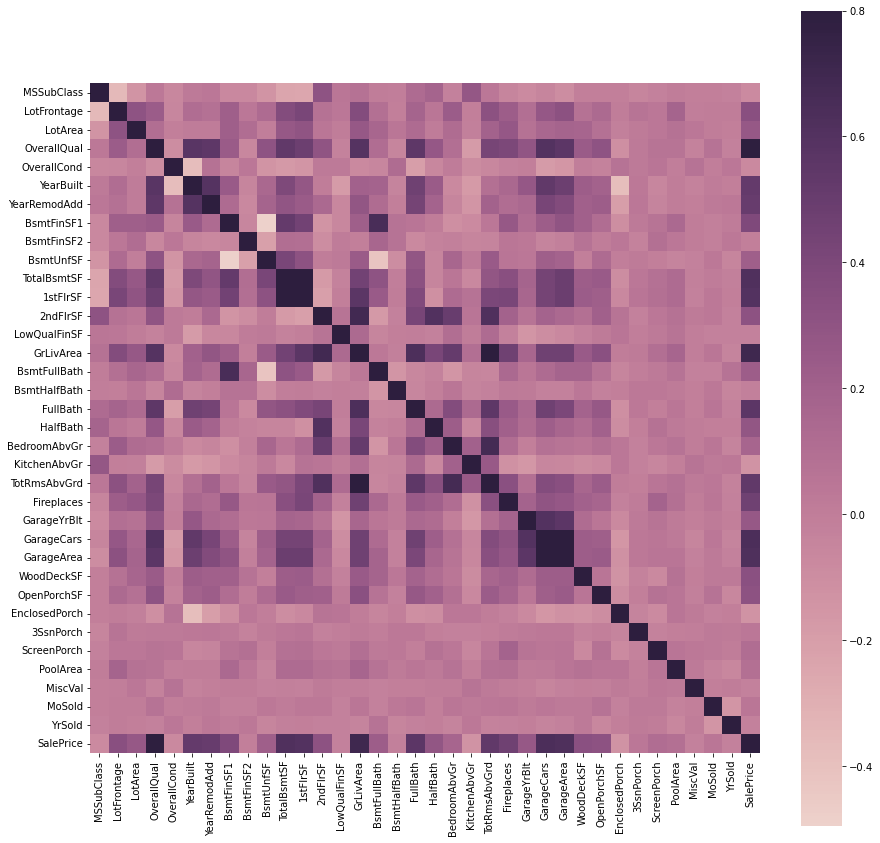

In [18]:
# Plot the correlation matrix
corr = df_train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, square=True, cmap=sns.cubehelix_palette(as_cmap=True));

In [19]:
# Print most important features relative to target
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


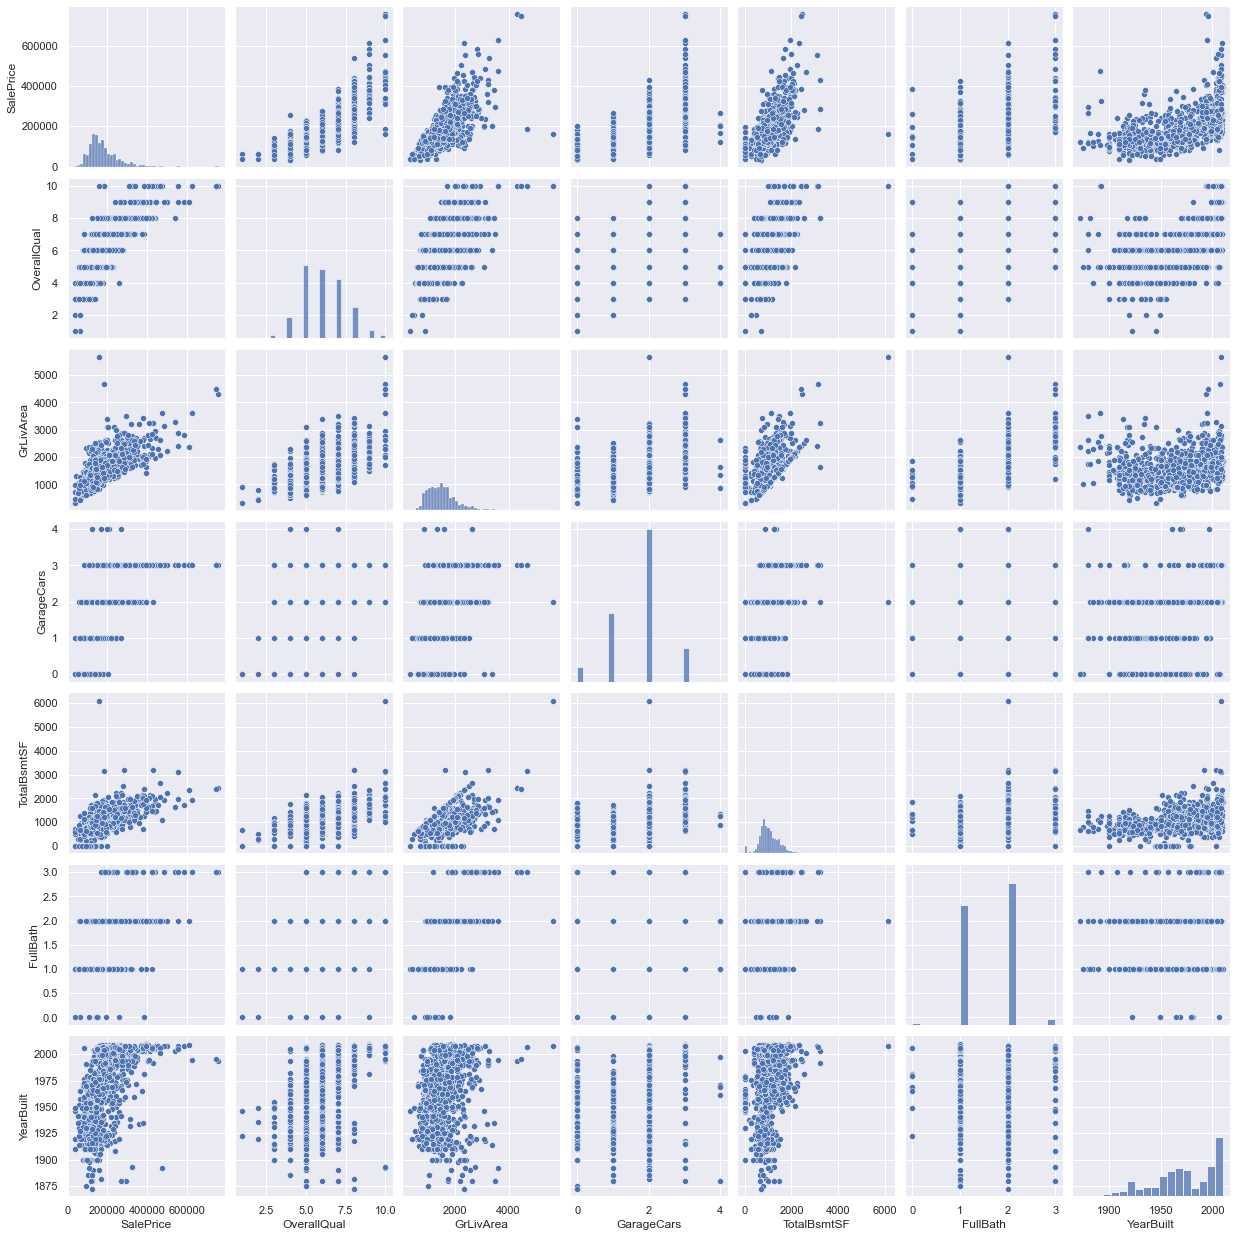

In [20]:
# Plot scatterplot for sale price and correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [21]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns

train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 36
Categorical features : 44


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

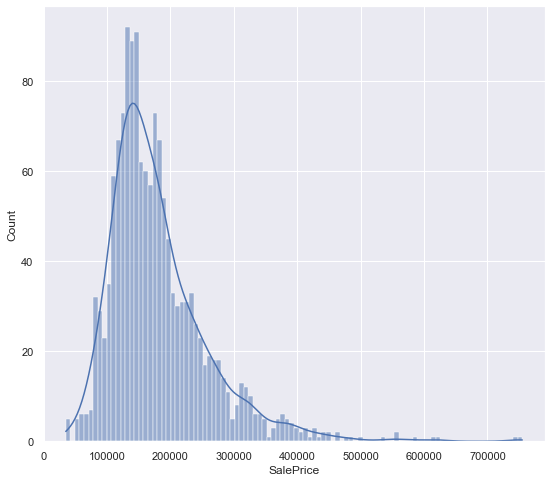

In [22]:
# Plot histogram for SalePrice
plt.figure(figsize=(9, 8))
sns.histplot(df_train['SalePrice'], bins=100, kde=True)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfB

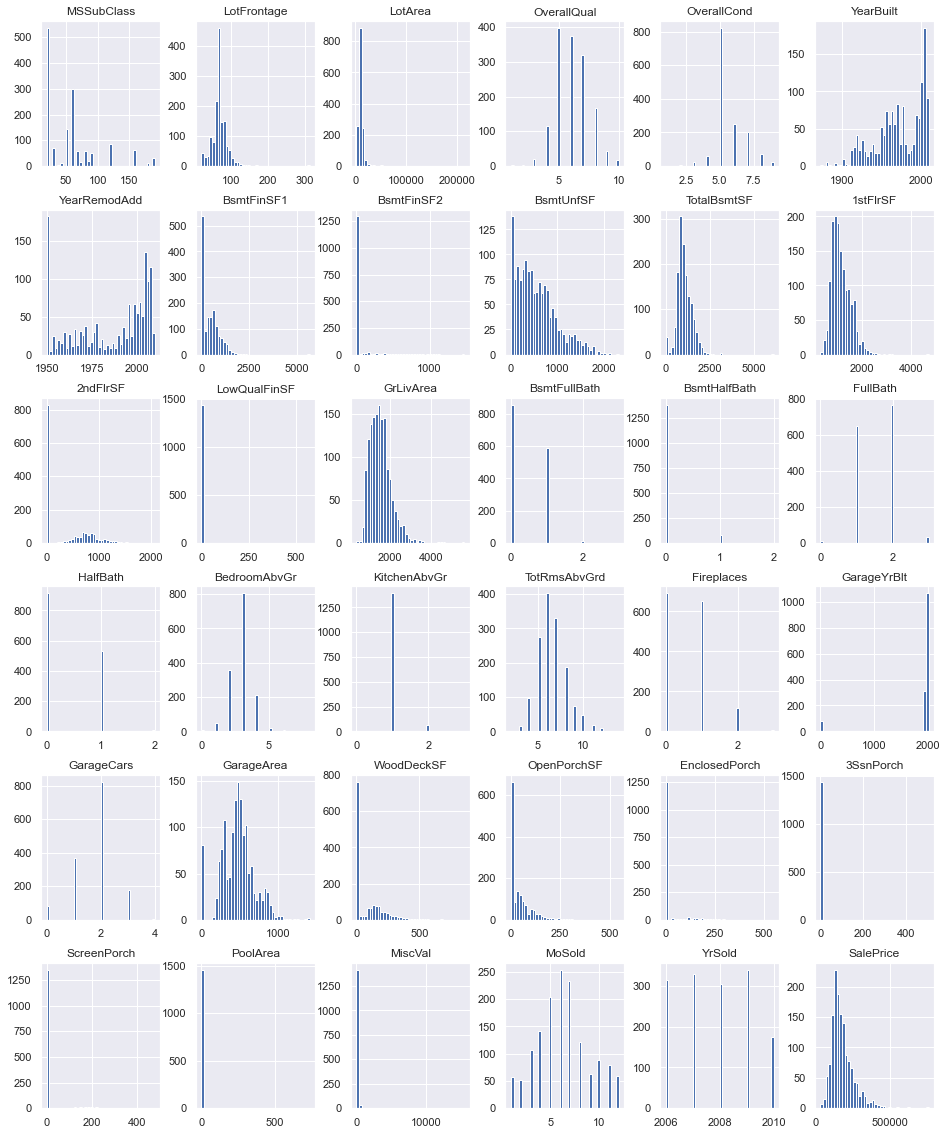

In [23]:
#1stFlrSF, TotalBsmtSF, LotFrontage, GrLiveArea distribution looks to similar to Sale price
# Plot histogram for numerical values
train_num.hist(figsize=(16, 20), bins=40)

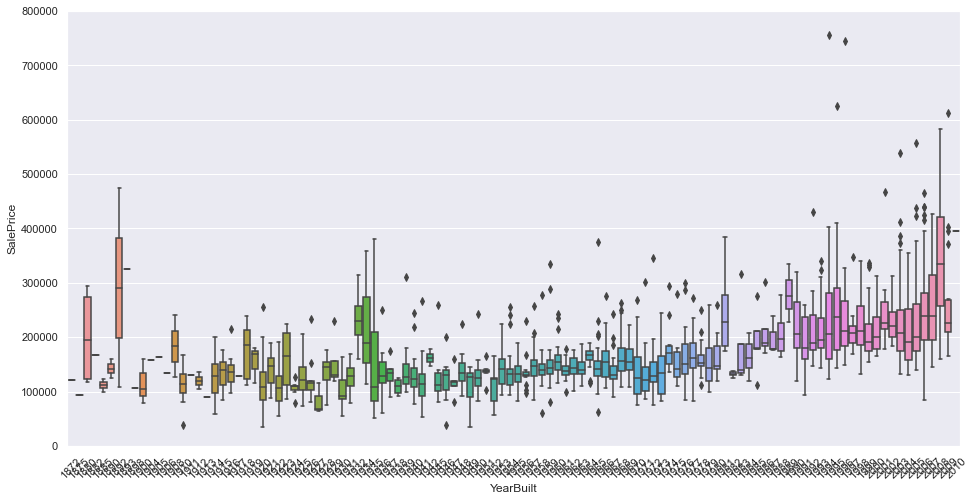

In [24]:
# Plot a boxplot for SalePrice and YearBuilt
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df_train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

Data preprocessing

In [25]:
# Show all train columns
df_columns = df_train.columns
df_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Cyclical encoding

In [26]:
# Show month sold column to encode it
df_train["MoSold"]

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64

In [27]:
# Cycle encode month sold column
df_train['month_sold_sin'] = np.sin(2*np.pi*df_train["MoSold"]/12)
df_train['month_sold_cos'] = np.cos(2*np.pi*df_train["MoSold"]/12)

### Splitting the data

In [28]:
# Split train and validation
X_y_train = df_train[df_train["YrSold"]< 2010]
X_y_valid = df_train[df_train["YrSold"]== 2010]

x_train = X_y_train.drop("SalePrice", axis=1)
y_train = X_y_train["SalePrice"]
x_valid =  X_y_valid.drop("SalePrice", axis=1)
y_valid = X_y_valid["SalePrice"]

### Scaling

In [29]:
# Select numerical features
train_features = x_train.select_dtypes(exclude = ["object"])
valid_features = x_valid.select_dtypes(exclude = ["object"])

In [30]:
# Show the train features
train_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,month_sold_sin,month_sold_cos
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,61,0,0,0,0,0,2,2008,8.660254e-01,5.000000e-01
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,0,5,2007,5.000000e-01,-8.660254e-01
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,42,0,0,0,0,0,9,2008,-1.000000e+00,-1.836970e-16
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,35,272,0,0,0,0,2,2006,8.660254e-01,5.000000e-01
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,84,0,0,0,0,0,12,2008,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,35.0,3675,5,5,2005,2005,547,0,0,...,28,0,0,0,0,0,5,2006,5.000000e-01,-8.660254e-01
1453,20,90.0,17217,5,5,2006,2006,0,0,1140,...,56,0,0,0,0,0,7,2006,-5.000000e-01,-8.660254e-01
1454,20,62.0,7500,7,5,2004,2005,410,0,811,...,113,0,0,0,0,0,10,2009,-8.660254e-01,5.000000e-01
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,40,0,0,0,0,0,8,2007,-8.660254e-01,-5.000000e-01


In [31]:
# Scale with MinMaxscaler
scaler = MinMaxScaler()

train_num_mm = scaler.fit_transform(train_features)
train_num_mm = pd.DataFrame(train_num_mm, columns=train_features.columns)

valid_num_mm = scaler.transform(valid_features)
valid_num_mm = pd.DataFrame(valid_num_mm, columns=valid_features.columns)

In [32]:
# Select only cateorical data
train_features_cat = x_train.select_dtypes(include = ["object"])
valid_features_cat = x_valid.select_dtypes(include = ["object"])

In [33]:
# Encode the data with label encoding
le = LabelEncoder()
for feat in train_features_cat.columns:
    train_features_cat[feat] = le.fit_transform(train_features_cat[feat].astype(str))
print (train_features_cat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1285 non-null   int32
 1   Street         1285 non-null   int32
 2   Alley          1285 non-null   int32
 3   LotShape       1285 non-null   int32
 4   LandContour    1285 non-null   int32
 5   Utilities      1285 non-null   int32
 6   LotConfig      1285 non-null   int32
 7   LandSlope      1285 non-null   int32
 8   Neighborhood   1285 non-null   int32
 9   Condition1     1285 non-null   int32
 10  Condition2     1285 non-null   int32
 11  BldgType       1285 non-null   int32
 12  HouseStyle     1285 non-null   int32
 13  RoofStyle      1285 non-null   int32
 14  RoofMatl       1285 non-null   int32
 15  Exterior1st    1285 non-null   int32
 16  Exterior2nd    1285 non-null   int32
 17  MasVnrType     1285 non-null   int32
 18  MasVnrArea     1285 non-null   int32
 19  ExterQ

In [34]:
# Encode the valid features
for feat in valid_features_cat.columns:
    valid_features_cat[feat] = le.fit_transform(valid_features_cat[feat].astype(str))
print (valid_features_cat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 16 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       175 non-null    int32
 1   Street         175 non-null    int32
 2   Alley          175 non-null    int32
 3   LotShape       175 non-null    int32
 4   LandContour    175 non-null    int32
 5   Utilities      175 non-null    int32
 6   LotConfig      175 non-null    int32
 7   LandSlope      175 non-null    int32
 8   Neighborhood   175 non-null    int32
 9   Condition1     175 non-null    int32
 10  Condition2     175 non-null    int32
 11  BldgType       175 non-null    int32
 12  HouseStyle     175 non-null    int32
 13  RoofStyle      175 non-null    int32
 14  RoofMatl       175 non-null    int32
 15  Exterior1st    175 non-null    int32
 16  Exterior2nd    175 non-null    int32
 17  MasVnrType     175 non-null    int32
 18  MasVnrArea     175 non-null    int32
 19  ExterQ

In [35]:
# Combine numerical and categorical data
train_features_concat = pd.concat([train_num_mm.reset_index(drop = True),
                                   train_features_cat.reset_index(drop = True)], axis=1)
valid_features_concat = pd.concat([valid_num_mm.reset_index(drop = True), 
                                   valid_features_cat.reset_index(drop = True)], axis=1)


### PCA

In [36]:
# Run pca with 65 components
pca = PCA(n_components=65)

train_features_concat_pca = pca.fit_transform(train_features_concat)
valid_features_concat_pca = pca.transform(valid_features_concat)

In [37]:
# Create and show a dataFrame from train PCA
train_features_concat_pca = pd.DataFrame(train_features_concat_pca)
train_features_concat_pca

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,21.595412,7.601076,-2.421223,-2.599261,0.271547,0.653094,-1.466177,0.795666,-0.480104,-1.303537,...,0.052914,0.023280,-0.059122,0.026994,0.002948,-0.000259,-0.026018,-0.024309,0.026540,0.000485
1,-58.273198,-12.743775,0.785978,-2.821067,-1.583905,-1.295478,-0.169444,-0.950467,-0.729305,-2.080224,...,-0.099533,-0.125085,0.019203,0.007633,-0.174490,0.088453,-0.114140,0.080629,0.002515,-0.055844
2,-2.397713,7.404221,-2.519132,-3.644661,0.533201,1.179692,-0.196639,0.265734,-0.731464,0.731877,...,0.088120,-0.014905,-0.059269,-0.011687,0.035433,0.027768,-0.050188,-0.065218,0.002251,-0.088590
3,-58.432302,6.384953,-4.158377,-0.944378,-3.682179,3.470022,1.814794,-2.875652,2.276644,-0.042713,...,0.347062,-0.119627,-0.100177,-0.110865,0.083425,-0.299138,-0.014979,-0.204518,-0.048494,-0.006901
4,113.673834,-1.538349,-3.662586,-2.763298,-0.070507,1.750075,0.968267,-1.037393,-0.482594,0.342967,...,-0.139956,-0.195586,0.084946,-0.067399,-0.077077,0.029867,0.063141,-0.090402,-0.007661,-0.014214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,221.595773,7.294444,-1.571840,-1.244090,-0.670042,3.358054,-2.473075,1.192518,0.690017,-0.507757,...,0.032753,-0.029839,0.063471,0.049400,0.071233,0.017954,0.121754,-0.006151,-0.001082,0.006762
1281,-58.409511,1.349536,-3.819077,3.526747,1.574069,0.221984,-1.960544,-1.507629,1.147395,-0.146012,...,0.053192,-0.002646,0.033099,0.000157,0.033964,0.014276,0.055849,-0.121253,-0.051926,0.115772
1282,-58.283134,-8.826830,-5.274679,-1.672724,-0.488438,-1.754330,-1.226347,0.510241,-0.782812,-1.083821,...,0.029032,0.065426,-0.063016,0.076777,0.022418,0.017638,-0.069151,-0.028424,-0.022230,-0.056244
1283,-58.386203,4.132203,-3.459100,-0.786807,3.199412,1.249220,-0.362080,1.934591,-1.577666,-1.497975,...,0.094821,0.009856,-0.032158,0.000490,0.029574,0.037297,-0.017404,0.029157,0.005894,-0.041348


### Linear Regression

In [38]:
# Fit linear regression model
regr = linear_model.LinearRegression()
regr.fit(train_features_concat_pca, y_train)
y_pred = regr.predict(valid_features_concat_pca)

# Evaluate the model
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % (mean_squared_error(y_valid, y_pred)**0.5))
print("Coefficient of determination: %.2f" % r2_score(y_valid, y_pred))

Coefficients: 
 [   292.79148028  -2350.29410835  -2849.32536707 -14611.55528511
  10847.04284802  -5533.95314528    102.57885063  -5609.28553403
   3225.30635255   7907.19850619    212.80427572  -3746.92316287
  -8306.15886386   6125.17797956   4727.88085811  -7630.46821587
   5941.79562116  -1221.74478511   1383.10959823  11853.46077766
  -3709.31852331   1843.91924108   5029.61571493 -12027.32895821
   4534.87342325   9001.81869414  17800.51744446  -9629.1746902
  12502.60374058   -807.34247763  -1409.17811378  -2730.97227768
  -1258.58405053  12612.35629678   -694.25782536 -10315.46732836
 -12182.64124209   1954.61507843 -15249.75634563  14282.17933968
 -82907.49600608  18355.32590433  -7986.34979412  15819.34175134
  -8611.92637363  56003.72241743 -12178.71382388 -11500.99586213
  31027.64017483  13927.80228402  15531.04183229 -18132.94277382
   3188.00928604   3113.74422921  49962.69215179   -397.97261905
  -6693.3141962   -7515.59855777 -15366.04386507 -56093.24038634
  -4370.05

### Random Forest Regression

In [39]:
# Fit random forest regression model
regressor = RandomForestRegressor(n_estimators = 200)
regressor.fit(train_features_concat_pca, y_train) 

RandomForestRegressor(n_estimators=200)

In [40]:
# Predict using random forest model
Y_pred = regressor.predict(valid_features_concat_pca)

In [41]:
# Evaluate the model
print("Mean squared error: %.2f" % (mean_squared_error(y_valid, Y_pred)**0.5))
print("Coefficient of determination: %.2f" % r2_score(y_valid, Y_pred))

Mean squared error: 75148.91
Coefficient of determination: 0.12


### MLPRegressor

In [42]:
# Fit MLP regression model
regr = MLPRegressor(max_iter=400).fit(train_features_concat_pca, y_train)
y_pred = regr.predict(valid_features_concat_pca)

# Evaluate the MLP regression model
print("Mean squared error: %.2f" % (mean_squared_error(y_valid, y_pred)**0.5))
print("Coefficient of determination: %.2f" % r2_score(y_valid, y_pred))

Mean squared error: 169983.31
Coefficient of determination: -3.49


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


### Catboost

In [43]:
# Fit catboost model
train_dataset = cb.Pool(train_features_concat_pca, y_train) 
test_dataset = cb.Pool(valid_features_concat_pca, y_valid)
model = cb.CatBoostRegressor(loss_function='RMSE')

In [44]:
# Use grid search to find best parameters
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 194771.2497851	test: 185466.7476576	best: 185466.7476576 (0)	total: 155ms	remaining: 15.3s
1:	learn: 189915.3606143	test: 180579.6307804	best: 180579.6307804 (1)	total: 158ms	remaining: 7.74s
2:	learn: 185219.4192401	test: 175893.3418969	best: 175893.3418969 (2)	total: 161ms	remaining: 5.2s
3:	learn: 180661.1378395	test: 171302.3109140	best: 171302.3109140 (3)	total: 164ms	remaining: 3.93s
4:	learn: 176331.9165706	test: 166875.0618141	best: 166875.0618141 (4)	total: 167ms	remaining: 3.17s
5:	learn: 172155.9202100	test: 162612.7892817	best: 162612.7892817 (5)	total: 171ms	remaining: 2.68s
6:	learn: 168088.4359469	test: 158472.0635092	best: 158472.0635092 (6)	total: 174ms	remaining: 2.31s
7:	learn: 164020.9820309	test: 154340.5803203	best: 154340.5803203 (7)	total: 177ms	remaining: 2.03s
8:	learn: 160285.8357869	test: 150541.6125860	best: 150541.6125860 (8)	total: 179ms	remaining: 1.81s
9:	learn: 156673.8729580	test: 146887.9618817	best: 146887.9618817 (9)	total: 182ms	remainin

16:	learn: 74200.6454852	test: 64845.0565407	best: 64845.0565407 (16)	total: 17.7ms	remaining: 86.5ms
17:	learn: 72135.6475958	test: 63013.2641127	best: 63013.2641127 (17)	total: 18.7ms	remaining: 85.3ms
18:	learn: 70243.6133816	test: 61413.4760491	best: 61413.4760491 (18)	total: 19.7ms	remaining: 84.1ms
19:	learn: 68705.6770367	test: 60178.9784670	best: 60178.9784670 (19)	total: 20.8ms	remaining: 83.1ms
20:	learn: 66945.5784133	test: 58724.0297609	best: 58724.0297609 (20)	total: 21.8ms	remaining: 81.9ms
21:	learn: 65292.7457563	test: 57739.5254656	best: 57739.5254656 (21)	total: 22.7ms	remaining: 80.6ms
22:	learn: 64089.7353851	test: 56858.0123304	best: 56858.0123304 (22)	total: 23.7ms	remaining: 79.4ms
23:	learn: 63024.4632865	test: 55938.4105711	best: 55938.4105711 (23)	total: 24.7ms	remaining: 78.3ms
24:	learn: 62188.6210465	test: 55635.1155172	best: 55635.1155172 (24)	total: 25.7ms	remaining: 77.1ms
25:	learn: 61592.2312372	test: 55438.2949671	best: 55438.2949671 (25)	total: 26.7m

79:	learn: 65642.3154890	test: 58198.7533438	best: 58198.7533438 (79)	total: 86.2ms	remaining: 21.5ms
80:	learn: 65326.2579854	test: 57977.8542701	best: 57977.8542701 (80)	total: 87.3ms	remaining: 20.5ms
81:	learn: 65001.7760378	test: 57738.5020788	best: 57738.5020788 (81)	total: 88.4ms	remaining: 19.4ms
82:	learn: 64748.0125337	test: 57608.0466262	best: 57608.0466262 (82)	total: 89.4ms	remaining: 18.3ms
83:	learn: 64449.1161542	test: 57386.3914341	best: 57386.3914341 (83)	total: 90.5ms	remaining: 17.2ms
84:	learn: 64073.1606953	test: 57141.2522751	best: 57141.2522751 (84)	total: 91.5ms	remaining: 16.1ms
85:	learn: 63746.1905121	test: 56959.8811524	best: 56959.8811524 (85)	total: 92.6ms	remaining: 15.1ms
86:	learn: 63456.8644474	test: 56803.9172862	best: 56803.9172862 (86)	total: 93.7ms	remaining: 14ms
87:	learn: 63187.9503010	test: 56629.4419808	best: 56629.4419808 (87)	total: 94.8ms	remaining: 12.9ms
88:	learn: 62960.8063529	test: 56576.8067666	best: 56576.8067666 (88)	total: 96.1ms	

37:	learn: 93623.6022094	test: 83324.1451210	best: 83324.1451210 (37)	total: 40.4ms	remaining: 65.9ms
38:	learn: 92183.3959583	test: 81946.9998694	best: 81946.9998694 (38)	total: 41.5ms	remaining: 64.9ms
39:	learn: 90803.5660888	test: 80659.2507829	best: 80659.2507829 (39)	total: 42.5ms	remaining: 63.7ms
40:	learn: 89633.1138912	test: 79513.7515918	best: 79513.7515918 (40)	total: 43.6ms	remaining: 62.8ms
41:	learn: 88708.4248778	test: 78587.6456612	best: 78587.6456612 (41)	total: 44.7ms	remaining: 61.7ms
42:	learn: 87608.0989878	test: 77506.3975936	best: 77506.3975936 (42)	total: 45.7ms	remaining: 60.5ms
43:	learn: 86483.6673716	test: 76409.2382151	best: 76409.2382151 (43)	total: 46.7ms	remaining: 59.4ms
44:	learn: 85433.6361762	test: 75385.0938714	best: 75385.0938714 (44)	total: 47.7ms	remaining: 58.3ms
45:	learn: 84648.3841733	test: 74580.0728089	best: 74580.0728089 (45)	total: 48.7ms	remaining: 57.2ms
46:	learn: 83840.5447712	test: 73814.0215798	best: 73814.0215798 (46)	total: 49.8m

94:	learn: 39281.9922196	test: 41101.9931203	best: 41101.9931203 (94)	total: 104ms	remaining: 5.49ms
95:	learn: 39114.6134035	test: 40987.4115309	best: 40987.4115309 (95)	total: 106ms	remaining: 4.4ms
96:	learn: 38999.6042702	test: 40855.7829219	best: 40855.7829219 (96)	total: 107ms	remaining: 3.3ms
97:	learn: 38774.4280169	test: 40713.4878406	best: 40713.4878406 (97)	total: 108ms	remaining: 2.2ms
98:	learn: 38610.1376320	test: 40543.9382439	best: 40543.9382439 (98)	total: 109ms	remaining: 1.1ms
99:	learn: 38472.7072373	test: 40423.5495463	best: 40423.5495463 (99)	total: 110ms	remaining: 0us

bestTest = 40423.54955
bestIteration = 99

5:	loss: 40423.5495463	best: 40247.7278223 (3)	total: 945ms	remaining: 14.2s
0:	learn: 194818.3805771	test: 185518.5925954	best: 185518.5925954 (0)	total: 1.17ms	remaining: 115ms
1:	learn: 190019.5643163	test: 180689.0386789	best: 180689.0386789 (1)	total: 2.27ms	remaining: 111ms
2:	learn: 185369.8608872	test: 176048.5298380	best: 176048.5298380 (2)	total

55:	learn: 48494.7640312	test: 46226.3333163	best: 46226.3333163 (55)	total: 56.7ms	remaining: 44.5ms
56:	learn: 48166.5304766	test: 46027.2264370	best: 46027.2264370 (56)	total: 57.8ms	remaining: 43.6ms
57:	learn: 47900.1278705	test: 45848.5268070	best: 45848.5268070 (57)	total: 59ms	remaining: 42.7ms
58:	learn: 47627.3765748	test: 45603.9519735	best: 45603.9519735 (58)	total: 59.9ms	remaining: 41.6ms
59:	learn: 47555.9994643	test: 45595.6469270	best: 45595.6469270 (59)	total: 60.8ms	remaining: 40.5ms
60:	learn: 47314.7023002	test: 45604.6274796	best: 45595.6469270 (59)	total: 61.7ms	remaining: 39.5ms
61:	learn: 46972.5159676	test: 45509.6576364	best: 45509.6576364 (61)	total: 62.7ms	remaining: 38.4ms
62:	learn: 46763.4497146	test: 45382.5883614	best: 45382.5883614 (62)	total: 63.6ms	remaining: 37.4ms
63:	learn: 46430.4547309	test: 45096.4597737	best: 45096.4597737 (63)	total: 64.6ms	remaining: 36.3ms
64:	learn: 46293.4985364	test: 45029.4991052	best: 45029.4991052 (64)	total: 65.6ms	

115:	learn: 56537.8592505	test: 52291.1350797	best: 52291.1350797 (115)	total: 127ms	remaining: 37.1ms
116:	learn: 56444.6300231	test: 52236.4502771	best: 52236.4502771 (116)	total: 128ms	remaining: 36ms
117:	learn: 56266.4545279	test: 52155.9328124	best: 52155.9328124 (117)	total: 129ms	remaining: 34.9ms
118:	learn: 56108.7359583	test: 52032.8698757	best: 52032.8698757 (118)	total: 130ms	remaining: 33.8ms
119:	learn: 55958.1075908	test: 51939.0337777	best: 51939.0337777 (119)	total: 131ms	remaining: 32.7ms
120:	learn: 55845.7723632	test: 51905.7624656	best: 51905.7624656 (120)	total: 132ms	remaining: 31.6ms
121:	learn: 55698.3011935	test: 51843.4249432	best: 51843.4249432 (121)	total: 133ms	remaining: 30.5ms
122:	learn: 55552.4039132	test: 51746.0662891	best: 51746.0662891 (122)	total: 134ms	remaining: 29.4ms
123:	learn: 55406.2521598	test: 51670.0091501	best: 51670.0091501 (123)	total: 135ms	remaining: 28.3ms
124:	learn: 55267.4889240	test: 51562.3158694	best: 51562.3158694 (124)	tot

118:	learn: 34619.9347659	test: 40007.8196690	best: 39851.2890608 (115)	total: 133ms	remaining: 34.6ms
119:	learn: 34492.4060909	test: 39955.4771684	best: 39851.2890608 (115)	total: 134ms	remaining: 33.5ms
120:	learn: 34333.6546552	test: 39883.2455035	best: 39851.2890608 (115)	total: 135ms	remaining: 32.4ms
121:	learn: 34177.8339193	test: 39851.4991283	best: 39851.2890608 (115)	total: 136ms	remaining: 31.2ms
122:	learn: 34039.0779505	test: 39811.8321994	best: 39811.8321994 (122)	total: 137ms	remaining: 30.1ms
123:	learn: 33866.2925664	test: 39742.4088582	best: 39742.4088582 (123)	total: 138ms	remaining: 29ms
124:	learn: 33695.0865556	test: 39683.5511239	best: 39683.5511239 (124)	total: 139ms	remaining: 27.9ms
125:	learn: 33525.2952941	test: 39690.0451129	best: 39683.5511239 (124)	total: 140ms	remaining: 26.7ms
126:	learn: 33413.4614080	test: 39620.7276936	best: 39620.7276936 (126)	total: 141ms	remaining: 25.6ms
127:	learn: 33298.3668050	test: 39502.9730642	best: 39502.9730642 (127)	tot

117:	learn: 56517.1248608	test: 52329.2141577	best: 52329.2141577 (117)	total: 136ms	remaining: 36.9ms
118:	learn: 56322.6954466	test: 52183.3736495	best: 52183.3736495 (118)	total: 137ms	remaining: 35.8ms
119:	learn: 56172.8014540	test: 52091.8976026	best: 52091.8976026 (119)	total: 139ms	remaining: 34.6ms
120:	learn: 55994.4720540	test: 52101.2614450	best: 52091.8976026 (119)	total: 140ms	remaining: 33.4ms
121:	learn: 55861.2026653	test: 52038.9439784	best: 52038.9439784 (121)	total: 141ms	remaining: 32.3ms
122:	learn: 55707.7636169	test: 51937.3817608	best: 51937.3817608 (122)	total: 142ms	remaining: 31.1ms
123:	learn: 55553.7742786	test: 51855.6925851	best: 51855.6925851 (123)	total: 143ms	remaining: 29.9ms
124:	learn: 55414.3627312	test: 51750.9370926	best: 51750.9370926 (124)	total: 144ms	remaining: 28.8ms
125:	learn: 55285.6363182	test: 51616.0575305	best: 51616.0575305 (125)	total: 145ms	remaining: 27.6ms
126:	learn: 55127.1112359	test: 51565.5562972	best: 51565.5562972 (126)	t

131:	learn: 33240.4456412	test: 38995.8670816	best: 38993.1370756 (130)	total: 137ms	remaining: 18.6ms
132:	learn: 33117.9840689	test: 38901.4903005	best: 38901.4903005 (132)	total: 138ms	remaining: 17.6ms
133:	learn: 33044.7803966	test: 38889.2885948	best: 38889.2885948 (133)	total: 139ms	remaining: 16.6ms
134:	learn: 32914.8987179	test: 38833.4508935	best: 38833.4508935 (134)	total: 140ms	remaining: 15.5ms
135:	learn: 32770.7736827	test: 38783.9574696	best: 38783.9574696 (135)	total: 141ms	remaining: 14.5ms
136:	learn: 32641.0959351	test: 38741.7607797	best: 38741.7607797 (136)	total: 142ms	remaining: 13.4ms
137:	learn: 32519.2446077	test: 38733.1982605	best: 38733.1982605 (137)	total: 143ms	remaining: 12.4ms
138:	learn: 32398.3431167	test: 38702.0509854	best: 38702.0509854 (138)	total: 144ms	remaining: 11.4ms
139:	learn: 32296.5825559	test: 38724.1229946	best: 38702.0509854 (138)	total: 145ms	remaining: 10.3ms
140:	learn: 32182.8779587	test: 38679.9105400	best: 38679.9105400 (140)	t

143:	learn: 52702.0097280	test: 50102.0485229	best: 50102.0485229 (143)	total: 154ms	remaining: 6.42ms
144:	learn: 52604.7792377	test: 50078.6617144	best: 50078.6617144 (144)	total: 155ms	remaining: 5.35ms
145:	learn: 52455.2037995	test: 50010.5568686	best: 50010.5568686 (145)	total: 156ms	remaining: 4.28ms
146:	learn: 52287.9934637	test: 49987.0518446	best: 49987.0518446 (146)	total: 157ms	remaining: 3.21ms
147:	learn: 52160.9139568	test: 49913.7996039	best: 49913.7996039 (147)	total: 158ms	remaining: 2.14ms
148:	learn: 52064.7958483	test: 49867.4770085	best: 49867.4770085 (148)	total: 159ms	remaining: 1.07ms
149:	learn: 51955.3673492	test: 49774.2718347	best: 49774.2718347 (149)	total: 161ms	remaining: 0us

bestTest = 49774.27183
bestIteration = 149

12:	loss: 49774.2718347	best: 38335.6146457 (11)	total: 2.07s	remaining: 13.2s
0:	learn: 183210.0224360	test: 173778.5160360	best: 173778.5160360 (0)	total: 2.23ms	remaining: 333ms
1:	learn: 168531.2281739	test: 158985.2758672	best: 1589

2:	learn: 185369.8608872	test: 176048.5298380	best: 176048.5298380 (2)	total: 4.76ms	remaining: 233ms
3:	learn: 180850.7577152	test: 171497.7277362	best: 171497.7277362 (3)	total: 5.99ms	remaining: 218ms
4:	learn: 176562.3320772	test: 167114.5396426	best: 167114.5396426 (4)	total: 7.02ms	remaining: 204ms
5:	learn: 172422.7853168	test: 162889.5013075	best: 162889.5013075 (5)	total: 8.09ms	remaining: 194ms
6:	learn: 168380.4445826	test: 158780.8507158	best: 158780.8507158 (6)	total: 9.18ms	remaining: 188ms
7:	learn: 164340.7518640	test: 154678.1084311	best: 154678.1084311 (7)	total: 10.2ms	remaining: 182ms
8:	learn: 160635.4173322	test: 150908.2633689	best: 150908.2633689 (8)	total: 11.3ms	remaining: 177ms
9:	learn: 157049.3774327	test: 147280.9678961	best: 147280.9678961 (9)	total: 12.5ms	remaining: 174ms
10:	learn: 153539.8732951	test: 143747.9058123	best: 143747.9058123 (10)	total: 13.4ms	remaining: 169ms
11:	learn: 150181.1942903	test: 140348.3234326	best: 140348.3234326 (11)	total: 

1:	learn: 168754.1268091	test: 159221.6190481	best: 159221.6190481 (1)	total: 3.02ms	remaining: 223ms
2:	learn: 155845.6597023	test: 146331.2757419	best: 146331.2757419 (2)	total: 4.31ms	remaining: 211ms
3:	learn: 144371.5761970	test: 134734.3291173	best: 134734.3291173 (3)	total: 5.82ms	remaining: 212ms
4:	learn: 133860.2205904	test: 124007.9450928	best: 124007.9450928 (4)	total: 6.78ms	remaining: 197ms
5:	learn: 125123.4797063	test: 115148.2535985	best: 115148.2535985 (5)	total: 7.77ms	remaining: 186ms
6:	learn: 116841.8078485	test: 106784.4727868	best: 106784.4727868 (6)	total: 8.72ms	remaining: 178ms
7:	learn: 109665.1255872	test: 99477.0633800	best: 99477.0633800 (7)	total: 9.71ms	remaining: 172ms
8:	learn: 103505.8998112	test: 93251.9861388	best: 93251.9861388 (8)	total: 10.8ms	remaining: 169ms
9:	learn: 98347.1735739	test: 88173.7874831	best: 88173.7874831 (9)	total: 11.8ms	remaining: 166ms
10:	learn: 93910.0471884	test: 83749.7305789	best: 83749.7305789 (10)	total: 12.9ms	remai

14:	learn: 140310.5954202	test: 130326.7071163	best: 130326.7071163 (14)	total: 17ms	remaining: 209ms
15:	learn: 137171.4953811	test: 127185.2797326	best: 127185.2797326 (15)	total: 18.1ms	remaining: 209ms
16:	learn: 134386.6223074	test: 124381.2110178	best: 124381.2110178 (16)	total: 19.8ms	remaining: 213ms
17:	learn: 131754.4424235	test: 121711.7577483	best: 121711.7577483 (17)	total: 20.9ms	remaining: 211ms
18:	learn: 129040.2877332	test: 118982.8451238	best: 118982.8451238 (18)	total: 21.9ms	remaining: 209ms
19:	learn: 126551.4319293	test: 116481.9320387	best: 116481.9320387 (19)	total: 23ms	remaining: 207ms
20:	learn: 124088.3155746	test: 114019.1589079	best: 114019.1589079 (20)	total: 24.1ms	remaining: 205ms
21:	learn: 121838.5505764	test: 111742.2794835	best: 111742.2794835 (21)	total: 25.2ms	remaining: 204ms
22:	learn: 119690.4371053	test: 109560.8677868	best: 109560.8677868 (22)	total: 26.2ms	remaining: 202ms
23:	learn: 117398.9510336	test: 107260.3909449	best: 107260.3909449 

173:	learn: 49009.2830524	test: 47983.4345399	best: 47983.4345399 (173)	total: 195ms	remaining: 29.2ms
174:	learn: 48923.2485419	test: 47899.1676674	best: 47899.1676674 (174)	total: 196ms	remaining: 28.1ms
175:	learn: 48819.2062437	test: 47866.2550674	best: 47866.2550674 (175)	total: 198ms	remaining: 26.9ms
176:	learn: 48748.8099779	test: 47850.4920550	best: 47850.4920550 (176)	total: 199ms	remaining: 25.8ms
177:	learn: 48661.5572970	test: 47833.6141254	best: 47833.6141254 (177)	total: 200ms	remaining: 24.7ms
178:	learn: 48566.3569849	test: 47811.8300251	best: 47811.8300251 (178)	total: 201ms	remaining: 23.6ms
179:	learn: 48462.8456608	test: 47731.1694880	best: 47731.1694880 (179)	total: 202ms	remaining: 22.4ms
180:	learn: 48381.1468690	test: 47640.9768215	best: 47640.9768215 (180)	total: 203ms	remaining: 21.3ms
181:	learn: 48295.5974777	test: 47557.9175102	best: 47557.9175102 (181)	total: 204ms	remaining: 20.2ms
182:	learn: 48219.8710923	test: 47456.1425593	best: 47456.1425593 (182)	t

130:	learn: 32934.9059408	test: 39268.2515349	best: 39268.2515349 (130)	total: 147ms	remaining: 77.4ms
131:	learn: 32780.4262008	test: 39292.9575601	best: 39268.2515349 (130)	total: 148ms	remaining: 76.3ms
132:	learn: 32656.7689644	test: 39179.3935388	best: 39179.3935388 (132)	total: 149ms	remaining: 75.1ms
133:	learn: 32559.5787802	test: 39224.2855535	best: 39179.3935388 (132)	total: 150ms	remaining: 73.9ms
134:	learn: 32455.6082900	test: 39222.4994697	best: 39179.3935388 (132)	total: 151ms	remaining: 72.8ms
135:	learn: 32336.8063682	test: 39483.2621091	best: 39179.3935388 (132)	total: 152ms	remaining: 71.7ms
136:	learn: 32220.2084651	test: 39466.6012215	best: 39179.3935388 (132)	total: 153ms	remaining: 70.5ms
137:	learn: 32132.4102976	test: 39309.0089081	best: 39179.3935388 (132)	total: 154ms	remaining: 69.4ms
138:	learn: 32032.9992796	test: 39255.3382232	best: 39179.3935388 (132)	total: 155ms	remaining: 68.2ms
139:	learn: 31928.2786564	test: 39213.8116779	best: 39179.3935388 (132)	t

88:	learn: 62960.8063529	test: 56576.8067666	best: 56576.8067666 (88)	total: 92.6ms	remaining: 115ms
89:	learn: 62654.5147120	test: 56326.4045897	best: 56326.4045897 (89)	total: 93.6ms	remaining: 114ms
90:	learn: 62369.5275905	test: 56076.8317634	best: 56076.8317634 (90)	total: 94.7ms	remaining: 113ms
91:	learn: 62151.9404885	test: 55854.1138014	best: 55854.1138014 (91)	total: 95.9ms	remaining: 113ms
92:	learn: 61830.0758040	test: 55639.8409976	best: 55639.8409976 (92)	total: 96.8ms	remaining: 111ms
93:	learn: 61527.6221397	test: 55416.4453250	best: 55416.4453250 (93)	total: 97.9ms	remaining: 110ms
94:	learn: 61209.8074482	test: 55205.9511376	best: 55205.9511376 (94)	total: 99ms	remaining: 109ms
95:	learn: 61013.4310143	test: 55084.0658154	best: 55084.0658154 (95)	total: 101ms	remaining: 110ms
96:	learn: 60813.8339591	test: 54940.1762652	best: 54940.1762652 (96)	total: 102ms	remaining: 109ms
97:	learn: 60596.4844997	test: 54804.7049311	best: 54804.7049311 (97)	total: 103ms	remaining: 1

47:	learn: 50027.3543115	test: 47386.5466100	best: 47386.5466100 (47)	total: 52.6ms	remaining: 167ms
48:	learn: 49641.3613963	test: 47166.7166528	best: 47166.7166528 (48)	total: 53.7ms	remaining: 165ms
49:	learn: 49273.6656600	test: 46801.4251527	best: 46801.4251527 (49)	total: 54.7ms	remaining: 164ms
50:	learn: 48998.6182408	test: 46725.0712094	best: 46725.0712094 (50)	total: 55.7ms	remaining: 163ms
51:	learn: 48739.6614584	test: 46687.1276410	best: 46687.1276410 (51)	total: 56.6ms	remaining: 161ms
52:	learn: 48391.4017881	test: 46509.0737637	best: 46509.0737637 (52)	total: 57.6ms	remaining: 160ms
53:	learn: 48095.5510970	test: 46347.1872097	best: 46347.1872097 (53)	total: 58.6ms	remaining: 159ms
54:	learn: 47792.7796373	test: 46121.8028460	best: 46121.8028460 (54)	total: 59.7ms	remaining: 157ms
55:	learn: 47576.2136326	test: 45669.5416190	best: 45669.5416190 (55)	total: 60.8ms	remaining: 156ms
56:	learn: 47289.9993683	test: 45561.6967212	best: 45561.6967212 (56)	total: 61.9ms	remaini

27:	learn: 109704.3867828	test: 99471.3006400	best: 99471.3006400 (27)	total: 31.5ms	remaining: 193ms
28:	learn: 107757.9294468	test: 97509.1094459	best: 97509.1094459 (28)	total: 32.6ms	remaining: 192ms
29:	learn: 106050.7917743	test: 95771.3943002	best: 95771.3943002 (29)	total: 33.7ms	remaining: 191ms
30:	learn: 104225.4066415	test: 93933.6973675	best: 93933.6973675 (30)	total: 34.8ms	remaining: 189ms
31:	learn: 102529.2513848	test: 92262.7117331	best: 92262.7117331 (31)	total: 35.8ms	remaining: 188ms
32:	learn: 100834.3432936	test: 90531.2173254	best: 90531.2173254 (32)	total: 36.7ms	remaining: 186ms
33:	learn: 99149.0369514	test: 88878.1510736	best: 88878.1510736 (33)	total: 37.8ms	remaining: 185ms
34:	learn: 97654.5655701	test: 87347.9022215	best: 87347.9022215 (34)	total: 38.9ms	remaining: 183ms
35:	learn: 96212.8184401	test: 85923.0965231	best: 85923.0965231 (35)	total: 40ms	remaining: 182ms
36:	learn: 94765.5372140	test: 84501.0800174	best: 84501.0800174 (36)	total: 41.1ms	rem

184:	learn: 48391.2015920	test: 47481.0267680	best: 47481.0267680 (184)	total: 206ms	remaining: 16.7ms
185:	learn: 48320.7909030	test: 47439.9449532	best: 47439.9449532 (185)	total: 207ms	remaining: 15.6ms
186:	learn: 48237.8761467	test: 47370.0103448	best: 47370.0103448 (186)	total: 208ms	remaining: 14.5ms
187:	learn: 48119.1953781	test: 47373.1258458	best: 47370.0103448 (186)	total: 209ms	remaining: 13.3ms
188:	learn: 48043.7273325	test: 47306.0510974	best: 47306.0510974 (188)	total: 210ms	remaining: 12.2ms
189:	learn: 47961.1634189	test: 47291.5558001	best: 47291.5558001 (189)	total: 211ms	remaining: 11.1ms
190:	learn: 47895.5210437	test: 47246.2992333	best: 47246.2992333 (190)	total: 212ms	remaining: 9.99ms
191:	learn: 47807.7181599	test: 47206.8791504	best: 47206.8791504 (191)	total: 213ms	remaining: 8.88ms
192:	learn: 47718.9517897	test: 47133.7358027	best: 47133.7358027 (192)	total: 214ms	remaining: 7.77ms
193:	learn: 47633.4112902	test: 47046.6828774	best: 47046.6828774 (193)	t

141:	learn: 32592.9582110	test: 38202.3588327	best: 38181.8543637 (140)	total: 156ms	remaining: 63.9ms
142:	learn: 32502.8077098	test: 38135.1400932	best: 38135.1400932 (142)	total: 157ms	remaining: 62.8ms
143:	learn: 32356.4591183	test: 38023.7543729	best: 38023.7543729 (143)	total: 159ms	remaining: 61.8ms
144:	learn: 32243.2958383	test: 37971.6302649	best: 37971.6302649 (144)	total: 160ms	remaining: 60.7ms
145:	learn: 32129.2710284	test: 37832.1848756	best: 37832.1848756 (145)	total: 161ms	remaining: 59.5ms
146:	learn: 32043.0163320	test: 37818.0381871	best: 37818.0381871 (146)	total: 162ms	remaining: 58.4ms
147:	learn: 31946.8409777	test: 37853.1963002	best: 37818.0381871 (146)	total: 163ms	remaining: 57.3ms
148:	learn: 31872.1973292	test: 37838.2243281	best: 37818.0381871 (146)	total: 164ms	remaining: 56.2ms
149:	learn: 31770.9626221	test: 37790.5679011	best: 37790.5679011 (149)	total: 165ms	remaining: 55.1ms
150:	learn: 31666.9010976	test: 37798.4738082	best: 37790.5679011 (149)	t

89:	learn: 62796.3999516	test: 56538.5540006	best: 56538.5540006 (89)	total: 117ms	remaining: 143ms
90:	learn: 62489.6527230	test: 56258.2215381	best: 56258.2215381 (90)	total: 118ms	remaining: 142ms
91:	learn: 62196.1784343	test: 56032.3739813	best: 56032.3739813 (91)	total: 119ms	remaining: 140ms
92:	learn: 61882.5319961	test: 55825.7042005	best: 55825.7042005 (92)	total: 120ms	remaining: 138ms
93:	learn: 61588.8557451	test: 55603.1177889	best: 55603.1177889 (93)	total: 122ms	remaining: 137ms
94:	learn: 61401.2346503	test: 55414.0699850	best: 55414.0699850 (94)	total: 123ms	remaining: 136ms
95:	learn: 61114.2783594	test: 55236.4723408	best: 55236.4723408 (95)	total: 124ms	remaining: 134ms
96:	learn: 60918.7900170	test: 55067.8520006	best: 55067.8520006 (96)	total: 129ms	remaining: 137ms
97:	learn: 60700.0335587	test: 54923.7661748	best: 54923.7661748 (97)	total: 130ms	remaining: 136ms
98:	learn: 60490.0681714	test: 54795.6856059	best: 54795.6856059 (98)	total: 131ms	remaining: 134ms


17:	learn: 72828.4110419	test: 63735.6106119	best: 63735.6106119 (17)	total: 25.1ms	remaining: 254ms
18:	learn: 70846.9615409	test: 62051.0402960	best: 62051.0402960 (18)	total: 27ms	remaining: 257ms
19:	learn: 69276.4433282	test: 60846.3021715	best: 60846.3021715 (19)	total: 28.3ms	remaining: 255ms
20:	learn: 67490.8661079	test: 59355.1449397	best: 59355.1449397 (20)	total: 29.5ms	remaining: 252ms
21:	learn: 65865.1226602	test: 58341.0831463	best: 58341.0831463 (21)	total: 31ms	remaining: 251ms
22:	learn: 64625.7088244	test: 57423.9925082	best: 57423.9925082 (22)	total: 32ms	remaining: 246ms
23:	learn: 63553.5653529	test: 56492.6409247	best: 56492.6409247 (23)	total: 33.1ms	remaining: 242ms
24:	learn: 62529.4662609	test: 55751.0408453	best: 55751.0408453 (24)	total: 34.2ms	remaining: 239ms
25:	learn: 61904.8117414	test: 55552.7002250	best: 55552.7002250 (25)	total: 35.3ms	remaining: 237ms
26:	learn: 61087.2757329	test: 54994.9151633	best: 54994.9151633 (26)	total: 36.5ms	remaining: 23

167:	learn: 31201.8450582	test: 38234.1960599	best: 38234.1960599 (167)	total: 206ms	remaining: 39.2ms
168:	learn: 31140.7292855	test: 38281.2107604	best: 38234.1960599 (167)	total: 207ms	remaining: 38ms
169:	learn: 31061.4134448	test: 38316.7974338	best: 38234.1960599 (167)	total: 208ms	remaining: 36.8ms
170:	learn: 30978.3164555	test: 38277.0146326	best: 38234.1960599 (167)	total: 209ms	remaining: 35.5ms
171:	learn: 30868.8150970	test: 38239.4934338	best: 38234.1960599 (167)	total: 210ms	remaining: 34.2ms
172:	learn: 30802.0140490	test: 38177.6427273	best: 38177.6427273 (172)	total: 211ms	remaining: 33ms
173:	learn: 30718.9529021	test: 38151.3577976	best: 38151.3577976 (173)	total: 212ms	remaining: 31.7ms
174:	learn: 30688.4464604	test: 38139.4500042	best: 38139.4500042 (174)	total: 214ms	remaining: 30.5ms
175:	learn: 30591.3376869	test: 38113.3111600	best: 38113.3111600 (175)	total: 215ms	remaining: 29.3ms
176:	learn: 30496.8331937	test: 38067.2667166	best: 38067.2667166 (176)	total

54:	learn: 71102.1412308	test: 64003.3925231	best: 64003.3925231 (54)	total: 139ms	remaining: 114ms
55:	learn: 70310.6598858	test: 63303.9309976	best: 63303.9309976 (55)	total: 142ms	remaining: 112ms
56:	learn: 69496.5851738	test: 62589.7620689	best: 62589.7620689 (56)	total: 144ms	remaining: 109ms
57:	learn: 68766.4265278	test: 62053.0749397	best: 62053.0749397 (57)	total: 147ms	remaining: 107ms
58:	learn: 67890.7929864	test: 61283.0926806	best: 61283.0926806 (58)	total: 150ms	remaining: 104ms
59:	learn: 67213.1226594	test: 60766.8755299	best: 60766.8755299 (59)	total: 153ms	remaining: 102ms
60:	learn: 66649.4535036	test: 60299.1457423	best: 60299.1457423 (60)	total: 155ms	remaining: 99.1ms
61:	learn: 65990.2418674	test: 59723.8748193	best: 59723.8748193 (61)	total: 157ms	remaining: 96.4ms
62:	learn: 65287.1217909	test: 59095.7537322	best: 59095.7537322 (62)	total: 160ms	remaining: 93.9ms
63:	learn: 64631.1941344	test: 58652.4962700	best: 58652.4962700 (63)	total: 162ms	remaining: 91.

2:	learn: 185067.1059420	test: 175681.2534783	best: 175681.2534783 (2)	total: 10.4ms	remaining: 337ms
3:	learn: 180555.8974555	test: 171085.1378432	best: 171085.1378432 (3)	total: 12.7ms	remaining: 304ms
4:	learn: 176029.6336829	test: 166527.2672117	best: 166527.2672117 (4)	total: 15.3ms	remaining: 291ms
5:	learn: 171822.5285392	test: 162308.5509303	best: 162308.5509303 (5)	total: 17.8ms	remaining: 279ms
6:	learn: 167765.3006983	test: 158193.3822946	best: 158193.3822946 (6)	total: 20.2ms	remaining: 269ms
7:	learn: 163678.7694149	test: 154127.8312873	best: 154127.8312873 (7)	total: 22.6ms	remaining: 260ms
8:	learn: 159679.2186542	test: 150114.2014802	best: 150114.2014802 (8)	total: 25ms	remaining: 253ms
9:	learn: 155987.6911016	test: 146467.3009029	best: 146467.3009029 (9)	total: 27.4ms	remaining: 247ms
10:	learn: 152341.5139118	test: 142763.9039430	best: 142763.9039430 (10)	total: 29.9ms	remaining: 242ms
11:	learn: 148890.3259611	test: 139249.4152022	best: 139249.4152022 (11)	total: 32

49:	learn: 38167.0441145	test: 43117.8605278	best: 43117.8605278 (49)	total: 132ms	remaining: 132ms
50:	learn: 37785.5397461	test: 43025.9946936	best: 43025.9946936 (50)	total: 134ms	remaining: 129ms
51:	learn: 37491.4153290	test: 42907.1227197	best: 42907.1227197 (51)	total: 137ms	remaining: 126ms
52:	learn: 37056.1081318	test: 42562.0274429	best: 42562.0274429 (52)	total: 140ms	remaining: 124ms
53:	learn: 36670.4697661	test: 42216.9417647	best: 42216.9417647 (53)	total: 142ms	remaining: 121ms
54:	learn: 36399.3327682	test: 42061.4651339	best: 42061.4651339 (54)	total: 145ms	remaining: 119ms
55:	learn: 36102.1884313	test: 41905.5188338	best: 41905.5188338 (55)	total: 148ms	remaining: 116ms
56:	learn: 35785.4222455	test: 41785.0995723	best: 41785.0995723 (56)	total: 151ms	remaining: 114ms
57:	learn: 35432.6389126	test: 41550.6106573	best: 41550.6106573 (57)	total: 153ms	remaining: 111ms
58:	learn: 35076.1748878	test: 41207.9931465	best: 41207.9931465 (58)	total: 157ms	remaining: 109ms


90:	learn: 52995.4326431	test: 50859.1184272	best: 50859.1184272 (90)	total: 227ms	remaining: 22.4ms
91:	learn: 52719.5604051	test: 50718.8710538	best: 50718.8710538 (91)	total: 229ms	remaining: 19.9ms
92:	learn: 52402.8209220	test: 50488.7811288	best: 50488.7811288 (92)	total: 231ms	remaining: 17.4ms
93:	learn: 52014.8929705	test: 50308.2594959	best: 50308.2594959 (93)	total: 234ms	remaining: 14.9ms
94:	learn: 51672.9382494	test: 50074.2160517	best: 50074.2160517 (94)	total: 236ms	remaining: 12.4ms
95:	learn: 51398.7287373	test: 49880.3395203	best: 49880.3395203 (95)	total: 239ms	remaining: 9.94ms
96:	learn: 51015.6925598	test: 49675.8053497	best: 49675.8053497 (96)	total: 241ms	remaining: 7.46ms
97:	learn: 50746.6342708	test: 49596.6346049	best: 49596.6346049 (97)	total: 244ms	remaining: 4.97ms
98:	learn: 50438.7794145	test: 49430.3802808	best: 49430.3802808 (98)	total: 246ms	remaining: 2.49ms
99:	learn: 50138.6578012	test: 49259.5507267	best: 49259.5507267 (99)	total: 249ms	remainin

31:	learn: 101408.0195815	test: 92213.9811758	best: 92213.9811758 (31)	total: 75.8ms	remaining: 161ms
32:	learn: 99542.5027381	test: 90412.6204763	best: 90412.6204763 (32)	total: 78.2ms	remaining: 159ms
33:	learn: 98001.2255678	test: 88919.9610850	best: 88919.9610850 (33)	total: 80.5ms	remaining: 156ms
34:	learn: 96445.7571824	test: 87417.1424953	best: 87417.1424953 (34)	total: 82.8ms	remaining: 154ms
35:	learn: 94845.2214389	test: 85887.6595140	best: 85887.6595140 (35)	total: 85.3ms	remaining: 152ms
36:	learn: 93323.0466971	test: 84388.0789286	best: 84388.0789286 (36)	total: 87.7ms	remaining: 149ms
37:	learn: 91938.2648732	test: 83033.2418846	best: 83033.2418846 (37)	total: 90.2ms	remaining: 147ms
38:	learn: 90527.3620072	test: 81627.2019814	best: 81627.2019814 (38)	total: 92.6ms	remaining: 145ms
39:	learn: 89260.4085211	test: 80423.6928197	best: 80423.6928197 (39)	total: 95.1ms	remaining: 143ms
40:	learn: 87956.2822695	test: 79169.9167612	best: 79169.9167612 (40)	total: 97.6ms	remain

81:	learn: 31422.9504785	test: 40478.3799259	best: 40478.3799259 (81)	total: 198ms	remaining: 43.5ms
82:	learn: 31158.3158736	test: 40420.8056305	best: 40420.8056305 (82)	total: 201ms	remaining: 41.1ms
83:	learn: 30939.2879824	test: 40315.5577449	best: 40315.5577449 (83)	total: 203ms	remaining: 38.7ms
84:	learn: 30675.6604686	test: 40206.7874016	best: 40206.7874016 (84)	total: 206ms	remaining: 36.3ms
85:	learn: 30450.5279123	test: 40059.8457545	best: 40059.8457545 (85)	total: 208ms	remaining: 33.9ms
86:	learn: 30263.0888454	test: 39950.5737690	best: 39950.5737690 (86)	total: 211ms	remaining: 31.5ms
87:	learn: 30085.4326076	test: 39869.6992808	best: 39869.6992808 (87)	total: 213ms	remaining: 29.1ms
88:	learn: 29874.7593085	test: 39906.7600466	best: 39869.6992808 (87)	total: 216ms	remaining: 26.7ms
89:	learn: 29631.8511259	test: 39793.3894466	best: 39793.3894466 (89)	total: 218ms	remaining: 24.3ms
90:	learn: 29376.1060783	test: 39672.1568045	best: 39672.1568045 (90)	total: 221ms	remainin

127:	learn: 42905.9768534	test: 45501.4530885	best: 45501.4530885 (127)	total: 322ms	remaining: 55.4ms
128:	learn: 42778.3877260	test: 45374.1263833	best: 45374.1263833 (128)	total: 325ms	remaining: 52.9ms
129:	learn: 42619.8121855	test: 45289.2334137	best: 45289.2334137 (129)	total: 328ms	remaining: 50.4ms
130:	learn: 42455.4931202	test: 45257.6334873	best: 45257.6334873 (130)	total: 330ms	remaining: 47.9ms
131:	learn: 42296.0305618	test: 45182.0064024	best: 45182.0064024 (131)	total: 333ms	remaining: 45.4ms
132:	learn: 42118.6151294	test: 45034.1525470	best: 45034.1525470 (132)	total: 336ms	remaining: 42.9ms
133:	learn: 41972.1425474	test: 44996.2262861	best: 44996.2262861 (133)	total: 338ms	remaining: 40.4ms
134:	learn: 41822.5721342	test: 44901.5273899	best: 44901.5273899 (134)	total: 341ms	remaining: 37.9ms
135:	learn: 41645.7859307	test: 44806.5721958	best: 44806.5721958 (135)	total: 343ms	remaining: 35.4ms
136:	learn: 41497.5431613	test: 44767.7464140	best: 44767.7464140 (136)	t

119:	learn: 21051.2441136	test: 36604.1504621	best: 36536.1760580 (118)	total: 298ms	remaining: 74.6ms
120:	learn: 20866.6451737	test: 36516.8727578	best: 36516.8727578 (120)	total: 301ms	remaining: 72.1ms
121:	learn: 20767.6138445	test: 36394.3007672	best: 36394.3007672 (121)	total: 303ms	remaining: 69.6ms
122:	learn: 20650.7764818	test: 36340.6705790	best: 36340.6705790 (122)	total: 306ms	remaining: 67.2ms
123:	learn: 20488.4926080	test: 36312.0127839	best: 36312.0127839 (123)	total: 310ms	remaining: 64.9ms
124:	learn: 20349.3350464	test: 36300.4870828	best: 36300.4870828 (124)	total: 312ms	remaining: 62.4ms
125:	learn: 20210.7948760	test: 36195.0798214	best: 36195.0798214 (125)	total: 315ms	remaining: 59.9ms
126:	learn: 20118.1027224	test: 36216.7469024	best: 36195.0798214 (125)	total: 317ms	remaining: 57.4ms
127:	learn: 19956.5251760	test: 36224.3306704	best: 36195.0798214 (125)	total: 320ms	remaining: 55ms
128:	learn: 19840.5610507	test: 36224.1130511	best: 36195.0798214 (125)	tot

93:	learn: 51200.4501121	test: 50070.6136191	best: 50070.6136191 (93)	total: 271ms	remaining: 161ms
94:	learn: 50879.5956943	test: 49833.5944815	best: 49833.5944815 (94)	total: 274ms	remaining: 158ms
95:	learn: 50602.9730900	test: 49627.7164719	best: 49627.7164719 (95)	total: 277ms	remaining: 156ms
96:	learn: 50252.3299556	test: 49395.9650101	best: 49395.9650101 (96)	total: 279ms	remaining: 153ms
97:	learn: 49978.4173829	test: 49339.2319723	best: 49339.2319723 (97)	total: 282ms	remaining: 149ms
98:	learn: 49689.7081595	test: 49194.4954868	best: 49194.4954868 (98)	total: 284ms	remaining: 146ms
99:	learn: 49397.5999840	test: 49047.8339272	best: 49047.8339272 (99)	total: 286ms	remaining: 143ms
100:	learn: 49134.8046731	test: 48849.7128905	best: 48849.7128905 (100)	total: 289ms	remaining: 140ms
101:	learn: 48865.3426792	test: 48662.4172794	best: 48662.4172794 (101)	total: 291ms	remaining: 137ms
102:	learn: 48625.0519124	test: 48577.1112125	best: 48577.1112125 (102)	total: 293ms	remaining: 

84:	learn: 28054.5970000	test: 38731.5578311	best: 38731.5578311 (84)	total: 221ms	remaining: 169ms
85:	learn: 27830.0346535	test: 38691.3916479	best: 38691.3916479 (85)	total: 224ms	remaining: 166ms
86:	learn: 27590.4641656	test: 38643.7785594	best: 38643.7785594 (86)	total: 226ms	remaining: 164ms
87:	learn: 27396.5167120	test: 38691.4990983	best: 38643.7785594 (86)	total: 229ms	remaining: 161ms
88:	learn: 27151.0910567	test: 38657.9670185	best: 38643.7785594 (86)	total: 231ms	remaining: 159ms
89:	learn: 26921.3369901	test: 38626.5903595	best: 38626.5903595 (89)	total: 234ms	remaining: 156ms
90:	learn: 26686.0012813	test: 38489.2900219	best: 38489.2900219 (90)	total: 237ms	remaining: 154ms
91:	learn: 26409.4970564	test: 38348.1224752	best: 38348.1224752 (91)	total: 240ms	remaining: 151ms
92:	learn: 26257.0027162	test: 38161.8056303	best: 38161.8056303 (92)	total: 244ms	remaining: 149ms
93:	learn: 26022.3670799	test: 38091.3218800	best: 38091.3218800 (93)	total: 246ms	remaining: 146ms


63:	learn: 65482.3005142	test: 59651.7274983	best: 59651.7274983 (63)	total: 174ms	remaining: 234ms
64:	learn: 64872.9431464	test: 59208.8003584	best: 59208.8003584 (64)	total: 177ms	remaining: 231ms
65:	learn: 64280.1462524	test: 58755.9130427	best: 58755.9130427 (65)	total: 179ms	remaining: 228ms
66:	learn: 63707.8984630	test: 58306.4610934	best: 58306.4610934 (66)	total: 182ms	remaining: 226ms
67:	learn: 63128.5082591	test: 57962.4555159	best: 57962.4555159 (67)	total: 184ms	remaining: 222ms
68:	learn: 62475.4573564	test: 57452.8405210	best: 57452.8405210 (68)	total: 187ms	remaining: 219ms
69:	learn: 61981.8252501	test: 57011.6597903	best: 57011.6597903 (69)	total: 190ms	remaining: 217ms
70:	learn: 61422.4858128	test: 56517.1478249	best: 56517.1478249 (70)	total: 192ms	remaining: 214ms
71:	learn: 60881.4127052	test: 56099.5731290	best: 56099.5731290 (71)	total: 195ms	remaining: 212ms
72:	learn: 60257.1890307	test: 55728.7411865	best: 55728.7411865 (72)	total: 198ms	remaining: 209ms


53:	learn: 37638.4309684	test: 43255.0291441	best: 43255.0291441 (53)	total: 134ms	remaining: 239ms
54:	learn: 37341.7074452	test: 43140.0839775	best: 43140.0839775 (54)	total: 137ms	remaining: 237ms
55:	learn: 37140.5897238	test: 43053.5986574	best: 43053.5986574 (55)	total: 139ms	remaining: 234ms
56:	learn: 36818.6594794	test: 42712.1487063	best: 42712.1487063 (56)	total: 142ms	remaining: 232ms
57:	learn: 36499.3244239	test: 42475.5700501	best: 42475.5700501 (57)	total: 145ms	remaining: 230ms
58:	learn: 36226.8878968	test: 42193.1793184	best: 42193.1793184 (58)	total: 148ms	remaining: 228ms
59:	learn: 35903.6152079	test: 42224.9969775	best: 42193.1793184 (58)	total: 151ms	remaining: 227ms
60:	learn: 35621.6260229	test: 42043.1595930	best: 42043.1595930 (60)	total: 154ms	remaining: 224ms
61:	learn: 35330.8174348	test: 41918.2407003	best: 41918.2407003 (61)	total: 156ms	remaining: 222ms
62:	learn: 35011.9373289	test: 41798.0056297	best: 41798.0056297 (62)	total: 159ms	remaining: 219ms


40:	learn: 87956.2822695	test: 79169.9167612	best: 79169.9167612 (40)	total: 111ms	remaining: 294ms
41:	learn: 86685.6864454	test: 77982.9745810	best: 77982.9745810 (41)	total: 114ms	remaining: 293ms
42:	learn: 85400.0756515	test: 76817.3771892	best: 76817.3771892 (42)	total: 116ms	remaining: 289ms
43:	learn: 84288.2709377	test: 75839.2256210	best: 75839.2256210 (43)	total: 119ms	remaining: 286ms
44:	learn: 83050.3884070	test: 74667.5347919	best: 74667.5347919 (44)	total: 121ms	remaining: 283ms
45:	learn: 81949.9179830	test: 73609.0349496	best: 73609.0349496 (45)	total: 124ms	remaining: 280ms
46:	learn: 80813.0131204	test: 72623.0815619	best: 72623.0815619 (46)	total: 126ms	remaining: 277ms
47:	learn: 79718.3272060	test: 71527.0991242	best: 71527.0991242 (47)	total: 131ms	remaining: 277ms
48:	learn: 78651.7790104	test: 70601.3302015	best: 70601.3302015 (48)	total: 134ms	remaining: 275ms
49:	learn: 77755.8692204	test: 69827.4799952	best: 69827.4799952 (49)	total: 136ms	remaining: 272ms


27:	learn: 54498.4021070	test: 52006.5067098	best: 52006.5067098 (27)	total: 68.4ms	remaining: 298ms
28:	learn: 53398.8823852	test: 51327.0160529	best: 51327.0160529 (28)	total: 70.9ms	remaining: 296ms
29:	learn: 52424.0188648	test: 50832.2375033	best: 50832.2375033 (29)	total: 73.6ms	remaining: 294ms
30:	learn: 51373.5999154	test: 50056.9635329	best: 50056.9635329 (30)	total: 75.9ms	remaining: 291ms
31:	learn: 50471.8021905	test: 49582.0293809	best: 49582.0293809 (31)	total: 78ms	remaining: 288ms
32:	learn: 49555.1092887	test: 49003.3017565	best: 49003.3017565 (32)	total: 80.3ms	remaining: 285ms
33:	learn: 49091.1796015	test: 48403.3891390	best: 48403.3891390 (33)	total: 82.8ms	remaining: 283ms
34:	learn: 48515.2472757	test: 48233.4211490	best: 48233.4211490 (34)	total: 85.5ms	remaining: 281ms
35:	learn: 47869.1331447	test: 47822.0452359	best: 47822.0452359 (35)	total: 88ms	remaining: 279ms
36:	learn: 47281.5117900	test: 47582.0233465	best: 47582.0233465 (36)	total: 90.4ms	remaining: 

20:	learn: 122335.9714810	test: 112853.6182301	best: 112853.6182301 (20)	total: 53.9ms	remaining: 459ms
21:	learn: 119792.4471840	test: 110300.1682264	best: 110300.1682264 (21)	total: 56.2ms	remaining: 455ms
22:	learn: 117279.4163888	test: 107940.7652576	best: 107940.7652576 (22)	total: 58.3ms	remaining: 449ms
23:	learn: 114982.7659834	test: 105645.1168856	best: 105645.1168856 (23)	total: 60.6ms	remaining: 445ms
24:	learn: 112915.4921653	test: 103583.8329273	best: 103583.8329273 (24)	total: 63.1ms	remaining: 441ms
25:	learn: 110849.5117171	test: 101501.7919963	best: 101501.7919963 (25)	total: 65.3ms	remaining: 437ms
26:	learn: 108673.8490000	test: 99365.2632743	best: 99365.2632743 (26)	total: 67.4ms	remaining: 432ms
27:	learn: 106840.7102739	test: 97603.0810236	best: 97603.0810236 (27)	total: 69.8ms	remaining: 429ms
28:	learn: 104857.1126018	test: 95642.2102181	best: 95642.2102181 (28)	total: 72.1ms	remaining: 425ms
29:	learn: 103006.9542394	test: 93841.7966148	best: 93841.7966148 (29)

168:	learn: 36912.6298473	test: 42676.7800143	best: 42676.7800143 (168)	total: 423ms	remaining: 77.7ms
169:	learn: 36802.8536596	test: 42628.1705470	best: 42628.1705470 (169)	total: 426ms	remaining: 75.1ms
170:	learn: 36685.1327523	test: 42600.0915899	best: 42600.0915899 (170)	total: 428ms	remaining: 72.6ms
171:	learn: 36599.2584860	test: 42576.7583619	best: 42576.7583619 (171)	total: 431ms	remaining: 70.1ms
172:	learn: 36494.2467714	test: 42514.1877127	best: 42514.1877127 (172)	total: 433ms	remaining: 67.6ms
173:	learn: 36400.4526096	test: 42503.8066175	best: 42503.8066175 (173)	total: 435ms	remaining: 65ms
174:	learn: 36317.4248664	test: 42480.2168834	best: 42480.2168834 (174)	total: 437ms	remaining: 62.5ms
175:	learn: 36202.7060676	test: 42427.2214698	best: 42427.2214698 (175)	total: 440ms	remaining: 60ms
176:	learn: 36108.9346692	test: 42387.3648218	best: 42387.3648218 (176)	total: 443ms	remaining: 57.5ms
177:	learn: 35999.5465340	test: 42312.2786813	best: 42312.2786813 (177)	total

100:	learn: 24058.4240993	test: 37442.4945880	best: 37442.4945880 (100)	total: 270ms	remaining: 265ms
101:	learn: 23893.7333200	test: 37500.1831598	best: 37442.4945880 (100)	total: 272ms	remaining: 262ms
102:	learn: 23719.0487878	test: 37417.7736215	best: 37417.7736215 (102)	total: 275ms	remaining: 259ms
103:	learn: 23507.8106946	test: 37365.1003136	best: 37365.1003136 (103)	total: 277ms	remaining: 256ms
104:	learn: 23313.7119752	test: 37298.2924368	best: 37298.2924368 (104)	total: 280ms	remaining: 253ms
105:	learn: 23139.7681986	test: 37201.1648291	best: 37201.1648291 (105)	total: 283ms	remaining: 251ms
106:	learn: 23002.3331361	test: 37156.6550131	best: 37156.6550131 (106)	total: 286ms	remaining: 249ms
107:	learn: 22878.2778466	test: 37059.8056099	best: 37059.8056099 (107)	total: 289ms	remaining: 246ms
108:	learn: 22716.5693688	test: 36899.6453839	best: 36899.6453839 (108)	total: 291ms	remaining: 243ms
109:	learn: 22551.3572419	test: 36888.7357363	best: 36888.7357363 (109)	total: 294

39:	learn: 87356.5378945	test: 78576.9936066	best: 78576.9936066 (39)	total: 106ms	remaining: 426ms
40:	learn: 86027.2003597	test: 77300.7636696	best: 77300.7636696 (40)	total: 109ms	remaining: 424ms
41:	learn: 84721.6771812	test: 76094.7359009	best: 76094.7359009 (41)	total: 112ms	remaining: 421ms
42:	learn: 83421.3562818	test: 74894.9409708	best: 74894.9409708 (42)	total: 115ms	remaining: 418ms
43:	learn: 82400.4978072	test: 73969.4802078	best: 73969.4802078 (43)	total: 117ms	remaining: 416ms
44:	learn: 81194.6415876	test: 72838.2740636	best: 72838.2740636 (44)	total: 120ms	remaining: 414ms
45:	learn: 79997.7151897	test: 71802.5603275	best: 71802.5603275 (45)	total: 123ms	remaining: 411ms
46:	learn: 78873.7732743	test: 70752.3174469	best: 70752.3174469 (46)	total: 125ms	remaining: 409ms
47:	learn: 77731.9181700	test: 69674.5812050	best: 69674.5812050 (47)	total: 128ms	remaining: 406ms
48:	learn: 76646.5899687	test: 68712.4537522	best: 68712.4537522 (48)	total: 131ms	remaining: 404ms


167:	learn: 37709.1463895	test: 43257.0105789	best: 43257.0105789 (167)	total: 462ms	remaining: 88ms
168:	learn: 37586.5451130	test: 43162.2460922	best: 43162.2460922 (168)	total: 467ms	remaining: 85.7ms
169:	learn: 37487.9519181	test: 43090.0736805	best: 43090.0736805 (169)	total: 471ms	remaining: 83.1ms
170:	learn: 37342.7118251	test: 43028.2700465	best: 43028.2700465 (170)	total: 474ms	remaining: 80.3ms
171:	learn: 37280.4378242	test: 42994.3575503	best: 42994.3575503 (171)	total: 478ms	remaining: 77.8ms
172:	learn: 37182.3048886	test: 42913.6875149	best: 42913.6875149 (172)	total: 482ms	remaining: 75.2ms
173:	learn: 37109.2108021	test: 42881.4116054	best: 42881.4116054 (173)	total: 485ms	remaining: 72.4ms
174:	learn: 37007.1077478	test: 42859.7111496	best: 42859.7111496 (174)	total: 487ms	remaining: 69.6ms
175:	learn: 36885.0939117	test: 42808.3798716	best: 42808.3798716 (175)	total: 490ms	remaining: 66.8ms
176:	learn: 36793.4715364	test: 42792.7656592	best: 42792.7656592 (176)	tot

90:	learn: 26686.0012813	test: 38489.2900219	best: 38489.2900219 (90)	total: 259ms	remaining: 310ms
91:	learn: 26409.4970564	test: 38348.1224752	best: 38348.1224752 (91)	total: 262ms	remaining: 307ms
92:	learn: 26257.0027162	test: 38161.8056303	best: 38161.8056303 (92)	total: 264ms	remaining: 304ms
93:	learn: 26022.3670799	test: 38091.3218800	best: 38091.3218800 (93)	total: 266ms	remaining: 301ms
94:	learn: 25803.3222214	test: 38059.1314588	best: 38059.1314588 (94)	total: 270ms	remaining: 298ms
95:	learn: 25526.3486415	test: 37885.2406673	best: 37885.2406673 (95)	total: 272ms	remaining: 295ms
96:	learn: 25391.5462676	test: 37886.0500231	best: 37885.2406673 (95)	total: 275ms	remaining: 292ms
97:	learn: 25211.0078612	test: 37838.5938151	best: 37838.5938151 (97)	total: 278ms	remaining: 289ms
98:	learn: 25041.2546582	test: 37794.1229200	best: 37794.1229200 (98)	total: 280ms	remaining: 286ms
99:	learn: 24824.8625201	test: 37791.4425517	best: 37791.4425517 (99)	total: 283ms	remaining: 283ms


19:	learn: 125540.8155943	test: 116032.5308980	best: 116032.5308980 (19)	total: 55.2ms	remaining: 497ms
20:	learn: 122936.4817350	test: 113460.5828422	best: 113460.5828422 (20)	total: 57.8ms	remaining: 492ms
21:	learn: 120405.3778215	test: 110924.8428497	best: 110924.8428497 (21)	total: 60.3ms	remaining: 488ms
22:	learn: 117917.5143165	test: 108573.5788785	best: 108573.5788785 (22)	total: 62.8ms	remaining: 483ms
23:	learn: 115623.2183929	test: 106291.1566187	best: 106291.1566187 (23)	total: 65.3ms	remaining: 479ms
24:	learn: 113556.9522370	test: 104233.9964549	best: 104233.9964549 (24)	total: 67.8ms	remaining: 475ms
25:	learn: 111486.3261730	test: 102145.6491522	best: 102145.6491522 (25)	total: 70.4ms	remaining: 471ms
26:	learn: 109321.5394170	test: 100021.3043721	best: 100021.3043721 (26)	total: 74.6ms	remaining: 478ms
27:	learn: 107490.5377580	test: 98262.9150628	best: 98262.9150628 (27)	total: 76.8ms	remaining: 472ms
28:	learn: 105511.5425741	test: 96306.1102926	best: 96306.1102926 

155:	learn: 39944.7212377	test: 43841.7500784	best: 43841.7500784 (155)	total: 418ms	remaining: 118ms
156:	learn: 39799.1003482	test: 43780.2152616	best: 43780.2152616 (156)	total: 420ms	remaining: 115ms
157:	learn: 39692.2124621	test: 43747.2840457	best: 43747.2840457 (157)	total: 423ms	remaining: 112ms
158:	learn: 39546.4418936	test: 43632.0798810	best: 43632.0798810 (158)	total: 426ms	remaining: 110ms
159:	learn: 39385.5085975	test: 43566.5956054	best: 43566.5956054 (159)	total: 428ms	remaining: 107ms
160:	learn: 39192.3827138	test: 43495.4290799	best: 43495.4290799 (160)	total: 431ms	remaining: 104ms
161:	learn: 39048.5741680	test: 43389.1116500	best: 43389.1116500 (161)	total: 433ms	remaining: 102ms
162:	learn: 38931.9747686	test: 43377.2824413	best: 43377.2824413 (162)	total: 436ms	remaining: 98.9ms
163:	learn: 38821.0760111	test: 43310.3102246	best: 43310.3102246 (163)	total: 438ms	remaining: 96.2ms
164:	learn: 38660.4516418	test: 43290.5459865	best: 43290.5459865 (164)	total: 4

92:	learn: 27211.8165963	test: 38708.4764978	best: 38708.4764978 (92)	total: 244ms	remaining: 281ms
93:	learn: 26997.9130793	test: 38689.0055141	best: 38689.0055141 (93)	total: 247ms	remaining: 278ms
94:	learn: 26743.9158642	test: 38695.4644393	best: 38689.0055141 (93)	total: 249ms	remaining: 275ms
95:	learn: 26480.7777459	test: 38510.6979490	best: 38510.6979490 (95)	total: 251ms	remaining: 272ms
96:	learn: 26246.8084079	test: 38407.1944369	best: 38407.1944369 (96)	total: 254ms	remaining: 270ms
97:	learn: 26067.9318324	test: 38362.7869111	best: 38362.7869111 (97)	total: 256ms	remaining: 267ms
98:	learn: 25890.2354121	test: 38253.8291401	best: 38253.8291401 (98)	total: 259ms	remaining: 264ms
99:	learn: 25679.8679587	test: 38177.2619043	best: 38177.2619043 (99)	total: 261ms	remaining: 261ms
100:	learn: 25562.9588954	test: 38179.6957130	best: 38177.2619043 (99)	total: 264ms	remaining: 259ms
101:	learn: 25374.7424125	test: 38123.3688995	best: 38123.3688995 (101)	total: 267ms	remaining: 256

31:	learn: 101408.0195815	test: 92213.9811758	best: 92213.9811758 (31)	total: 85.5ms	remaining: 449ms
32:	learn: 99542.5027381	test: 90412.6204763	best: 90412.6204763 (32)	total: 87.8ms	remaining: 444ms
33:	learn: 98001.2255678	test: 88919.9610850	best: 88919.9610850 (33)	total: 90.2ms	remaining: 441ms
34:	learn: 96445.7571824	test: 87417.1424953	best: 87417.1424953 (34)	total: 93.4ms	remaining: 440ms
35:	learn: 94845.2214389	test: 85887.6595140	best: 85887.6595140 (35)	total: 96.2ms	remaining: 438ms
36:	learn: 93323.0466971	test: 84388.0789286	best: 84388.0789286 (36)	total: 98.7ms	remaining: 435ms
37:	learn: 91938.2648732	test: 83033.2418846	best: 83033.2418846 (37)	total: 101ms	remaining: 431ms
38:	learn: 90527.3620072	test: 81627.2019814	best: 81627.2019814 (38)	total: 104ms	remaining: 428ms
39:	learn: 89260.4085211	test: 80423.6928197	best: 80423.6928197 (39)	total: 106ms	remaining: 425ms
40:	learn: 87956.2822695	test: 79169.9167612	best: 79169.9167612 (40)	total: 109ms	remaining:

172:	learn: 39664.7725091	test: 43545.1839544	best: 43545.1839544 (172)	total: 451ms	remaining: 70.5ms
173:	learn: 39597.1847368	test: 43503.3538813	best: 43503.3538813 (173)	total: 454ms	remaining: 67.8ms
174:	learn: 39500.7451551	test: 43424.2805792	best: 43424.2805792 (174)	total: 456ms	remaining: 65.2ms
175:	learn: 39373.3676592	test: 43390.3320869	best: 43390.3320869 (175)	total: 459ms	remaining: 62.6ms
176:	learn: 39250.5516984	test: 43354.9452375	best: 43354.9452375 (176)	total: 462ms	remaining: 60ms
177:	learn: 39104.9368308	test: 43287.6784849	best: 43287.6784849 (177)	total: 465ms	remaining: 57.5ms
178:	learn: 38984.1344237	test: 43252.8822712	best: 43252.8822712 (178)	total: 468ms	remaining: 54.9ms
179:	learn: 38877.0648281	test: 43155.0311131	best: 43155.0311131 (179)	total: 470ms	remaining: 52.3ms
180:	learn: 38760.6733858	test: 43120.6536140	best: 43120.6536140 (180)	total: 473ms	remaining: 49.6ms
181:	learn: 38685.6514801	test: 43097.3511508	best: 43097.3511508 (181)	tot

113:	learn: 25242.0961309	test: 37883.5452654	best: 37883.5452654 (113)	total: 298ms	remaining: 225ms
114:	learn: 25064.8886113	test: 37898.3776508	best: 37883.5452654 (113)	total: 301ms	remaining: 222ms
115:	learn: 24901.8785467	test: 37882.5757952	best: 37882.5757952 (115)	total: 303ms	remaining: 220ms
116:	learn: 24738.1664413	test: 37757.0836534	best: 37757.0836534 (116)	total: 306ms	remaining: 217ms
117:	learn: 24580.6712448	test: 37611.0687915	best: 37611.0687915 (117)	total: 308ms	remaining: 214ms
118:	learn: 24439.0163424	test: 37579.7888391	best: 37579.7888391 (118)	total: 311ms	remaining: 212ms
119:	learn: 24261.6908396	test: 37505.8232264	best: 37505.8232264 (119)	total: 313ms	remaining: 209ms
120:	learn: 24086.7512838	test: 37500.2984288	best: 37500.2984288 (120)	total: 316ms	remaining: 207ms
121:	learn: 23998.7333350	test: 37483.6020334	best: 37483.6020334 (121)	total: 319ms	remaining: 204ms
122:	learn: 23891.6067119	test: 37419.5946641	best: 37419.5946641 (122)	total: 322

20:	learn: 121252.6600783	test: 113044.4815311	best: 113044.4815311 (20)	total: 147ms	remaining: 551ms
21:	learn: 118560.9062234	test: 110559.0570546	best: 110559.0570546 (21)	total: 153ms	remaining: 542ms
22:	learn: 115961.3595508	test: 108041.9869415	best: 108041.9869415 (22)	total: 161ms	remaining: 540ms
23:	learn: 113592.9362023	test: 105808.9049105	best: 105808.9049105 (23)	total: 167ms	remaining: 530ms
24:	learn: 111092.5130212	test: 103350.2502270	best: 103350.2502270 (24)	total: 179ms	remaining: 538ms
25:	learn: 108822.4681259	test: 101105.3936846	best: 101105.3936846 (25)	total: 186ms	remaining: 530ms
26:	learn: 106534.1369531	test: 98824.2447062	best: 98824.2447062 (26)	total: 193ms	remaining: 521ms
27:	learn: 104407.0880159	test: 96891.4034361	best: 96891.4034361 (27)	total: 199ms	remaining: 512ms
28:	learn: 102331.3061856	test: 94887.4097881	best: 94887.4097881 (28)	total: 206ms	remaining: 503ms
29:	learn: 100380.6522222	test: 93100.5436410	best: 93100.5436410 (29)	total: 2

1:	learn: 168332.8462724	test: 159042.6210813	best: 159042.6210813 (1)	total: 14.5ms	remaining: 712ms
2:	learn: 155211.0203787	test: 145974.5826844	best: 145974.5826844 (2)	total: 20.3ms	remaining: 658ms
3:	learn: 143481.2300866	test: 134659.4512440	best: 134659.4512440 (3)	total: 26.4ms	remaining: 634ms
4:	learn: 133115.7754002	test: 124150.9251904	best: 124150.9251904 (4)	total: 33.3ms	remaining: 633ms
5:	learn: 124278.5003745	test: 115409.1884996	best: 115409.1884996 (5)	total: 40.1ms	remaining: 629ms
6:	learn: 114755.9363433	test: 106617.4068905	best: 106617.4068905 (6)	total: 46.3ms	remaining: 615ms
7:	learn: 106881.2299058	test: 98899.7723929	best: 98899.7723929 (7)	total: 52.6ms	remaining: 605ms
8:	learn: 100321.1575266	test: 92896.5975603	best: 92896.5975603 (8)	total: 58.6ms	remaining: 593ms
9:	learn: 94534.2535150	test: 87413.3341528	best: 87413.3341528 (9)	total: 64.9ms	remaining: 584ms
10:	learn: 89010.7847129	test: 82491.2586199	best: 82491.2586199 (10)	total: 70.7ms	remai

10:	learn: 152652.0987772	test: 143958.2398407	best: 143958.2398407 (10)	total: 71.7ms	remaining: 580ms
11:	learn: 149177.0264238	test: 140511.0338835	best: 140511.0338835 (11)	total: 77.6ms	remaining: 569ms
12:	learn: 145720.3966932	test: 137016.7150736	best: 137016.7150736 (12)	total: 84.3ms	remaining: 564ms
13:	learn: 142488.1846823	test: 133893.5170953	best: 133893.5170953 (13)	total: 90.6ms	remaining: 557ms
14:	learn: 139203.9734586	test: 130714.1208124	best: 130714.1208124 (14)	total: 97.5ms	remaining: 553ms
15:	learn: 135928.0694793	test: 127495.3096032	best: 127495.3096032 (15)	total: 104ms	remaining: 545ms
16:	learn: 133028.5879871	test: 124539.0159617	best: 124539.0159617 (16)	total: 111ms	remaining: 541ms
17:	learn: 130130.4988269	test: 121710.3911239	best: 121710.3911239 (17)	total: 117ms	remaining: 534ms
18:	learn: 127432.8186880	test: 119019.1436004	best: 119019.1436004 (18)	total: 124ms	remaining: 527ms
19:	learn: 124656.1709360	test: 116302.2286455	best: 116302.2286455 

95:	learn: 42537.0369612	test: 47831.0758196	best: 47831.0758196 (95)	total: 638ms	remaining: 26.6ms
96:	learn: 42230.8010881	test: 47657.9347904	best: 47657.9347904 (96)	total: 644ms	remaining: 19.9ms
97:	learn: 41990.0510936	test: 47525.2010116	best: 47525.2010116 (97)	total: 651ms	remaining: 13.3ms
98:	learn: 41624.1107281	test: 47443.8340287	best: 47443.8340287 (98)	total: 658ms	remaining: 6.64ms
99:	learn: 41251.4037340	test: 47260.9391835	best: 47260.9391835 (99)	total: 664ms	remaining: 0us

bestTest = 47260.93918
bestIteration = 99

50:	loss: 47260.9391835	best: 34638.4269679 (41)	total: 16.4s	remaining: 14.5s
0:	learn: 183239.1068620	test: 173909.5504207	best: 173909.5504207 (0)	total: 7.18ms	remaining: 711ms
1:	learn: 168688.3201790	test: 159428.6844382	best: 159428.6844382 (1)	total: 14.1ms	remaining: 691ms
2:	learn: 155721.7381480	test: 146545.2655704	best: 146545.2655704 (2)	total: 19.9ms	remaining: 644ms
3:	learn: 144111.9234313	test: 135340.0738512	best: 135340.0738512 (3

81:	learn: 18911.1373151	test: 37494.6753123	best: 37494.6753123 (81)	total: 550ms	remaining: 121ms
82:	learn: 18673.7431500	test: 37420.1340456	best: 37420.1340456 (82)	total: 556ms	remaining: 114ms
83:	learn: 18422.3524196	test: 37375.0770708	best: 37375.0770708 (83)	total: 563ms	remaining: 107ms
84:	learn: 18231.7721550	test: 37367.7070677	best: 37367.7070677 (84)	total: 570ms	remaining: 101ms
85:	learn: 18067.3983154	test: 37395.3418887	best: 37367.7070677 (84)	total: 576ms	remaining: 93.8ms
86:	learn: 17867.3283065	test: 37370.7206507	best: 37367.7070677 (84)	total: 582ms	remaining: 87ms
87:	learn: 17642.8462538	test: 37377.3617938	best: 37367.7070677 (84)	total: 589ms	remaining: 80.3ms
88:	learn: 17436.9430806	test: 37296.1094507	best: 37296.1094507 (88)	total: 596ms	remaining: 73.6ms
89:	learn: 17229.7820455	test: 37250.1111746	best: 37250.1111746 (89)	total: 602ms	remaining: 66.9ms
90:	learn: 16998.3886122	test: 37287.6191593	best: 37250.1111746 (89)	total: 608ms	remaining: 60.

64:	learn: 59545.8665885	test: 58583.2792676	best: 58583.2792676 (64)	total: 428ms	remaining: 230ms
65:	learn: 58837.9099957	test: 58083.3357980	best: 58083.3357980 (65)	total: 434ms	remaining: 224ms
66:	learn: 58032.4199578	test: 57415.6125728	best: 57415.6125728 (66)	total: 441ms	remaining: 217ms
67:	learn: 57316.3505700	test: 56889.0092559	best: 56889.0092559 (67)	total: 448ms	remaining: 211ms
68:	learn: 56743.3147694	test: 56493.8741672	best: 56493.8741672 (68)	total: 454ms	remaining: 204ms
69:	learn: 55990.5691248	test: 56017.8383223	best: 56017.8383223 (69)	total: 460ms	remaining: 197ms
70:	learn: 55398.0040077	test: 55672.3887010	best: 55672.3887010 (70)	total: 467ms	remaining: 191ms
71:	learn: 54850.1141083	test: 55266.0854902	best: 55266.0854902 (71)	total: 473ms	remaining: 184ms
72:	learn: 54281.4352632	test: 54903.0619109	best: 54903.0619109 (72)	total: 480ms	remaining: 177ms
73:	learn: 53761.9062780	test: 54463.0041096	best: 54463.0041096 (73)	total: 486ms	remaining: 171ms


46:	learn: 31780.7213279	test: 42711.9899188	best: 42711.9899188 (46)	total: 313ms	remaining: 353ms
47:	learn: 31286.1646648	test: 42497.1408156	best: 42497.1408156 (47)	total: 319ms	remaining: 346ms
48:	learn: 30741.9408898	test: 42366.1102986	best: 42366.1102986 (48)	total: 326ms	remaining: 339ms
49:	learn: 30318.2112069	test: 42121.4661679	best: 42121.4661679 (49)	total: 333ms	remaining: 333ms
50:	learn: 29900.5972328	test: 41996.7792034	best: 41996.7792034 (50)	total: 339ms	remaining: 326ms
51:	learn: 29510.5308153	test: 41907.3026199	best: 41907.3026199 (51)	total: 346ms	remaining: 319ms
52:	learn: 29065.0677353	test: 41789.7667350	best: 41789.7667350 (52)	total: 353ms	remaining: 313ms
53:	learn: 28749.4614981	test: 41768.2868892	best: 41768.2868892 (53)	total: 359ms	remaining: 306ms
54:	learn: 28459.3376848	test: 41611.3223300	best: 41611.3223300 (54)	total: 366ms	remaining: 300ms
55:	learn: 28107.9798507	test: 41455.1488656	best: 41455.1488656 (55)	total: 372ms	remaining: 293ms


32:	learn: 101078.6025708	test: 93147.4924207	best: 93147.4924207 (32)	total: 229ms	remaining: 466ms
33:	learn: 99370.5883109	test: 91537.9438464	best: 91537.9438464 (33)	total: 237ms	remaining: 459ms
34:	learn: 97686.2725140	test: 89930.0316710	best: 89930.0316710 (34)	total: 244ms	remaining: 453ms
35:	learn: 96024.6455632	test: 88404.2351611	best: 88404.2351611 (35)	total: 251ms	remaining: 446ms
36:	learn: 94378.3994860	test: 86841.4854472	best: 86841.4854472 (36)	total: 258ms	remaining: 439ms
37:	learn: 93004.5570750	test: 85526.3942124	best: 85526.3942124 (37)	total: 265ms	remaining: 432ms
38:	learn: 91343.4388269	test: 83944.8762368	best: 83944.8762368 (38)	total: 272ms	remaining: 426ms
39:	learn: 89848.3379789	test: 82530.6185560	best: 82530.6185560 (39)	total: 279ms	remaining: 419ms
40:	learn: 88387.8963630	test: 81116.6834445	best: 81116.6834445 (40)	total: 288ms	remaining: 414ms
41:	learn: 86924.0055353	test: 79734.8618153	best: 79734.8618153 (41)	total: 294ms	remaining: 406ms

14:	learn: 77713.0499300	test: 71850.3127542	best: 71850.3127542 (14)	total: 103ms	remaining: 584ms
15:	learn: 73849.3452107	test: 68724.5833426	best: 68724.5833426 (15)	total: 110ms	remaining: 575ms
16:	learn: 71110.7320429	test: 66330.4845072	best: 66330.4845072 (16)	total: 116ms	remaining: 567ms
17:	learn: 67876.8406038	test: 63774.8446524	best: 63774.8446524 (17)	total: 123ms	remaining: 559ms
18:	learn: 65195.2626864	test: 62279.2050529	best: 62279.2050529 (18)	total: 129ms	remaining: 549ms
19:	learn: 62997.1741630	test: 60366.0757049	best: 60366.0757049 (19)	total: 136ms	remaining: 544ms
20:	learn: 60638.5383032	test: 58856.2297433	best: 58856.2297433 (20)	total: 143ms	remaining: 538ms
21:	learn: 58549.9337213	test: 57392.5046245	best: 57392.5046245 (21)	total: 150ms	remaining: 531ms
22:	learn: 56692.2357633	test: 55976.0487741	best: 55976.0487741 (22)	total: 157ms	remaining: 526ms
23:	learn: 54996.7728162	test: 54778.7664564	best: 54778.7664564 (23)	total: 163ms	remaining: 516ms


98:	learn: 20592.4006471	test: 39267.5468499	best: 39267.5468499 (98)	total: 672ms	remaining: 6.79ms
99:	learn: 20368.9751515	test: 39234.7586991	best: 39234.7586991 (99)	total: 679ms	remaining: 0us

bestTest = 39234.7587
bestIteration = 99

55:	loss: 39234.7586991	best: 34638.4269679 (41)	total: 19.9s	remaining: 14.2s
0:	learn: 194745.7279094	test: 185469.1958656	best: 185469.1958656 (0)	total: 7.44ms	remaining: 1.11s
1:	learn: 189897.1580491	test: 180638.9695899	best: 180638.9695899 (1)	total: 14ms	remaining: 1.03s
2:	learn: 185192.3096450	test: 175943.6289777	best: 175943.6289777 (2)	total: 21.8ms	remaining: 1.07s
3:	learn: 180635.3528297	test: 171475.0056987	best: 171475.0056987 (3)	total: 29.1ms	remaining: 1.06s
4:	learn: 176203.5857716	test: 166995.9671811	best: 166995.9671811 (4)	total: 36ms	remaining: 1.04s
5:	learn: 171975.6384813	test: 162750.9534208	best: 162750.9534208 (5)	total: 43.6ms	remaining: 1.05s
6:	learn: 167595.6052154	test: 158594.1312466	best: 158594.1312466 (6)	

85:	learn: 44919.3569403	test: 49705.1516303	best: 49705.1516303 (85)	total: 554ms	remaining: 412ms
86:	learn: 44522.5264115	test: 49441.2787323	best: 49441.2787323 (86)	total: 560ms	remaining: 406ms
87:	learn: 44129.5469659	test: 49193.6138657	best: 49193.6138657 (87)	total: 567ms	remaining: 399ms
88:	learn: 43757.6575197	test: 48851.9798381	best: 48851.9798381 (88)	total: 573ms	remaining: 393ms
89:	learn: 43334.5975232	test: 48646.3486951	best: 48646.3486951 (89)	total: 580ms	remaining: 386ms
90:	learn: 42939.5073915	test: 48449.0820323	best: 48449.0820323 (90)	total: 586ms	remaining: 380ms
91:	learn: 42548.9934573	test: 48235.7716151	best: 48235.7716151 (91)	total: 592ms	remaining: 373ms
92:	learn: 42222.0833353	test: 48054.6079248	best: 48054.6079248 (92)	total: 600ms	remaining: 368ms
93:	learn: 41808.6203608	test: 47942.9181027	best: 47942.9181027 (93)	total: 607ms	remaining: 361ms
94:	learn: 41486.1985008	test: 47762.4953402	best: 47762.4953402 (94)	total: 613ms	remaining: 355ms


19:	learn: 56665.8907409	test: 56007.4275909	best: 56007.4275909 (19)	total: 137ms	remaining: 889ms
20:	learn: 54392.7557256	test: 54735.9217829	best: 54735.9217829 (20)	total: 144ms	remaining: 882ms
21:	learn: 52286.6534294	test: 53803.5300215	best: 53803.5300215 (21)	total: 150ms	remaining: 873ms
22:	learn: 50234.6074321	test: 52584.1547474	best: 52584.1547474 (22)	total: 157ms	remaining: 867ms
23:	learn: 48663.2335211	test: 51546.9130828	best: 51546.9130828 (23)	total: 164ms	remaining: 861ms
24:	learn: 46879.9457714	test: 50640.5778452	best: 50640.5778452 (24)	total: 170ms	remaining: 850ms
25:	learn: 45675.3425044	test: 50052.3602302	best: 50052.3602302 (25)	total: 176ms	remaining: 839ms
26:	learn: 44356.0490865	test: 49394.5143070	best: 49394.5143070 (26)	total: 182ms	remaining: 829ms
27:	learn: 43228.5080843	test: 48711.0288063	best: 48711.0288063 (27)	total: 188ms	remaining: 821ms
28:	learn: 41928.1857802	test: 48218.0836533	best: 48218.0836533 (28)	total: 195ms	remaining: 813ms


125:	learn: 11395.9562567	test: 38349.5929236	best: 38334.7249599 (122)	total: 870ms	remaining: 166ms
126:	learn: 11266.5863000	test: 38330.4429283	best: 38330.4429283 (126)	total: 877ms	remaining: 159ms
127:	learn: 11175.5800143	test: 38341.1763869	best: 38330.4429283 (126)	total: 884ms	remaining: 152ms
128:	learn: 11043.5567712	test: 38333.6809211	best: 38330.4429283 (126)	total: 891ms	remaining: 145ms
129:	learn: 10947.5642892	test: 38328.7890819	best: 38328.7890819 (129)	total: 897ms	remaining: 138ms
130:	learn: 10878.9999865	test: 38313.6236325	best: 38313.6236325 (130)	total: 904ms	remaining: 131ms
131:	learn: 10816.8458662	test: 38300.9720653	best: 38300.9720653 (131)	total: 911ms	remaining: 124ms
132:	learn: 10702.8618029	test: 38262.5354221	best: 38262.5354221 (132)	total: 917ms	remaining: 117ms
133:	learn: 10610.4178409	test: 38254.1136581	best: 38254.1136581 (133)	total: 924ms	remaining: 110ms
134:	learn: 10502.6490338	test: 38285.6178731	best: 38254.1136581 (133)	total: 931

57:	learn: 63599.0755146	test: 61248.3918451	best: 61248.3918451 (57)	total: 387ms	remaining: 614ms
58:	learn: 62705.5501923	test: 60560.4822320	best: 60560.4822320 (58)	total: 393ms	remaining: 606ms
59:	learn: 61797.4918697	test: 59876.8665663	best: 59876.8665663 (59)	total: 400ms	remaining: 600ms
60:	learn: 61033.9767562	test: 59398.8151885	best: 59398.8151885 (60)	total: 407ms	remaining: 594ms
61:	learn: 60259.2338650	test: 58836.7857319	best: 58836.7857319 (61)	total: 415ms	remaining: 590ms
62:	learn: 59347.8315392	test: 58304.4617951	best: 58304.4617951 (62)	total: 423ms	remaining: 583ms
63:	learn: 58522.1369202	test: 57824.5200320	best: 57824.5200320 (63)	total: 430ms	remaining: 577ms
64:	learn: 57792.9178729	test: 57271.4298834	best: 57271.4298834 (64)	total: 436ms	remaining: 571ms
65:	learn: 57133.5872717	test: 56765.0484888	best: 56765.0484888 (65)	total: 443ms	remaining: 564ms
66:	learn: 56337.0239262	test: 56127.5996789	best: 56127.5996789 (66)	total: 450ms	remaining: 558ms


145:	learn: 30798.2757117	test: 42436.5154629	best: 42436.5154629 (145)	total: 973ms	remaining: 26.7ms
146:	learn: 30643.6855283	test: 42363.9479667	best: 42363.9479667 (146)	total: 979ms	remaining: 20ms
147:	learn: 30487.5045682	test: 42350.4079713	best: 42350.4079713 (147)	total: 986ms	remaining: 13.3ms
148:	learn: 30324.5986511	test: 42295.5664364	best: 42295.5664364 (148)	total: 992ms	remaining: 6.66ms
149:	learn: 30185.5962955	test: 42200.2429961	best: 42200.2429961 (149)	total: 999ms	remaining: 0us

bestTest = 42200.243
bestIteration = 149

58:	loss: 42200.2429961	best: 34638.4269679 (41)	total: 23s	remaining: 14.4s
0:	learn: 183239.1068620	test: 173909.5504207	best: 173909.5504207 (0)	total: 6.9ms	remaining: 1.03s
1:	learn: 168688.3201790	test: 159428.6844382	best: 159428.6844382 (1)	total: 13.2ms	remaining: 977ms
2:	learn: 155721.7381480	test: 146545.2655704	best: 146545.2655704 (2)	total: 19.8ms	remaining: 970ms
3:	learn: 144111.9234313	test: 135340.0738512	best: 135340.073851

80:	learn: 19128.2342272	test: 37542.2609434	best: 37542.2609434 (80)	total: 539ms	remaining: 459ms
81:	learn: 18911.1373151	test: 37494.6753123	best: 37494.6753123 (81)	total: 547ms	remaining: 453ms
82:	learn: 18673.7431500	test: 37420.1340456	best: 37420.1340456 (82)	total: 554ms	remaining: 447ms
83:	learn: 18422.3524196	test: 37375.0770708	best: 37375.0770708 (83)	total: 562ms	remaining: 441ms
84:	learn: 18231.7721550	test: 37367.7070677	best: 37367.7070677 (84)	total: 568ms	remaining: 435ms
85:	learn: 18067.3983154	test: 37395.3418887	best: 37367.7070677 (84)	total: 576ms	remaining: 428ms
86:	learn: 17867.3283065	test: 37370.7206507	best: 37367.7070677 (84)	total: 582ms	remaining: 422ms
87:	learn: 17642.8462538	test: 37377.3617938	best: 37367.7070677 (84)	total: 589ms	remaining: 415ms
88:	learn: 17436.9430806	test: 37296.1094507	best: 37296.1094507 (88)	total: 598ms	remaining: 410ms
89:	learn: 17229.7820455	test: 37250.1111746	best: 37250.1111746 (89)	total: 605ms	remaining: 403ms


12:	learn: 146529.5761223	test: 137738.3845054	best: 137738.3845054 (12)	total: 84.4ms	remaining: 889ms
13:	learn: 143334.4616928	test: 134540.8675296	best: 134540.8675296 (13)	total: 91.1ms	remaining: 885ms
14:	learn: 140081.5619214	test: 131391.7669238	best: 131391.7669238 (14)	total: 97.6ms	remaining: 879ms
15:	learn: 136877.4713906	test: 128274.2965400	best: 128274.2965400 (15)	total: 104ms	remaining: 869ms
16:	learn: 133961.2093293	test: 125332.3251701	best: 125332.3251701 (16)	total: 110ms	remaining: 861ms
17:	learn: 131086.8899572	test: 122530.0437440	best: 122530.0437440 (17)	total: 116ms	remaining: 852ms
18:	learn: 128337.7939057	test: 119820.8384982	best: 119820.8384982 (18)	total: 122ms	remaining: 843ms
19:	learn: 125612.0600499	test: 117137.6184936	best: 117137.6184936 (19)	total: 128ms	remaining: 834ms
20:	learn: 122910.4469333	test: 114426.6163390	best: 114426.6163390 (20)	total: 134ms	remaining: 826ms
21:	learn: 120195.4648384	test: 111994.9593549	best: 111994.9593549 (2

96:	learn: 43736.9936252	test: 48791.8793182	best: 48791.8793182 (96)	total: 651ms	remaining: 356ms
97:	learn: 43467.8728575	test: 48694.6948256	best: 48694.6948256 (97)	total: 658ms	remaining: 349ms
98:	learn: 43170.9769906	test: 48586.7581497	best: 48586.7581497 (98)	total: 665ms	remaining: 343ms
99:	learn: 42782.4800840	test: 48462.6240583	best: 48462.6240583 (99)	total: 671ms	remaining: 336ms
100:	learn: 42420.4254866	test: 48279.5894918	best: 48279.5894918 (100)	total: 677ms	remaining: 329ms
101:	learn: 42158.7848997	test: 48183.8495338	best: 48183.8495338 (101)	total: 684ms	remaining: 322ms
102:	learn: 41813.2779257	test: 48049.4801857	best: 48049.4801857 (102)	total: 691ms	remaining: 315ms
103:	learn: 41545.2867505	test: 47915.5808304	best: 47915.5808304 (103)	total: 696ms	remaining: 308ms
104:	learn: 41241.6220379	test: 47754.7495228	best: 47754.7495228 (104)	total: 703ms	remaining: 301ms
105:	learn: 40940.2753123	test: 47603.5534659	best: 47603.5534659 (105)	total: 710ms	remai

31:	learn: 40828.9472819	test: 46422.5018884	best: 46422.5018884 (31)	total: 203ms	remaining: 747ms
32:	learn: 40174.4578938	test: 46153.7802703	best: 46153.7802703 (32)	total: 209ms	remaining: 740ms
33:	learn: 39491.3922528	test: 45957.0764497	best: 45957.0764497 (33)	total: 215ms	remaining: 733ms
34:	learn: 38672.8349837	test: 45606.5417273	best: 45606.5417273 (34)	total: 223ms	remaining: 731ms
35:	learn: 38011.0099649	test: 45388.3265274	best: 45388.3265274 (35)	total: 229ms	remaining: 726ms
36:	learn: 37290.9780554	test: 45117.5300280	best: 45117.5300280 (36)	total: 235ms	remaining: 718ms
37:	learn: 36519.8152137	test: 44763.8150623	best: 44763.8150623 (37)	total: 241ms	remaining: 712ms
38:	learn: 35874.0232998	test: 44496.6937314	best: 44496.6937314 (38)	total: 248ms	remaining: 706ms
39:	learn: 35304.8526229	test: 44313.7294935	best: 44313.7294935 (39)	total: 254ms	remaining: 698ms
40:	learn: 34698.1463345	test: 44098.0532416	best: 44098.0532416 (40)	total: 260ms	remaining: 692ms


116:	learn: 14185.6246007	test: 37707.7279933	best: 37707.7279933 (116)	total: 759ms	remaining: 214ms
117:	learn: 14048.8995292	test: 37704.0730508	best: 37704.0730508 (117)	total: 765ms	remaining: 207ms
118:	learn: 13947.6035458	test: 37668.5611979	best: 37668.5611979 (118)	total: 772ms	remaining: 201ms
119:	learn: 13828.3882471	test: 37690.4298138	best: 37668.5611979 (118)	total: 778ms	remaining: 195ms
120:	learn: 13721.0832621	test: 37675.2842462	best: 37668.5611979 (118)	total: 785ms	remaining: 188ms
121:	learn: 13586.7632801	test: 37665.8169219	best: 37665.8169219 (121)	total: 792ms	remaining: 182ms
122:	learn: 13464.8096007	test: 37684.8614782	best: 37665.8169219 (121)	total: 797ms	remaining: 175ms
123:	learn: 13330.7992013	test: 37665.7652899	best: 37665.7652899 (123)	total: 804ms	remaining: 168ms
124:	learn: 13222.0671781	test: 37653.8098776	best: 37653.8098776 (124)	total: 810ms	remaining: 162ms
125:	learn: 13074.4007930	test: 37605.8033675	best: 37605.8033675 (125)	total: 817

51:	learn: 75566.5368904	test: 70162.0850371	best: 70162.0850371 (51)	total: 343ms	remaining: 646ms
52:	learn: 74686.2240235	test: 69365.6238290	best: 69365.6238290 (52)	total: 350ms	remaining: 640ms
53:	learn: 73652.9282891	test: 68548.8514388	best: 68548.8514388 (53)	total: 358ms	remaining: 636ms
54:	learn: 72652.5207348	test: 67831.5707832	best: 67831.5707832 (54)	total: 365ms	remaining: 631ms
55:	learn: 71665.7325662	test: 67088.0320041	best: 67088.0320041 (55)	total: 372ms	remaining: 624ms
56:	learn: 70692.9679725	test: 66223.0461501	best: 66223.0461501 (56)	total: 380ms	remaining: 619ms
57:	learn: 69836.7839056	test: 65599.0429531	best: 65599.0429531 (57)	total: 388ms	remaining: 616ms
58:	learn: 68944.1518849	test: 64857.8831902	best: 64857.8831902 (58)	total: 396ms	remaining: 611ms
59:	learn: 68016.1659855	test: 64113.9689534	best: 64113.9689534 (59)	total: 403ms	remaining: 605ms
60:	learn: 67323.5598463	test: 63571.8279699	best: 63571.8279699 (60)	total: 411ms	remaining: 599ms


6:	learn: 120637.3346906	test: 111983.5982966	best: 111983.5982966 (6)	total: 51.3ms	remaining: 1.05s
7:	learn: 113123.8113526	test: 104571.4287408	best: 104571.4287408 (7)	total: 58ms	remaining: 1.03s
8:	learn: 106649.9045640	test: 98542.2118746	best: 98542.2118746 (8)	total: 64.4ms	remaining: 1.01s
9:	learn: 100776.0320828	test: 92823.3699953	best: 92823.3699953 (9)	total: 71.4ms	remaining: 1s
10:	learn: 95263.2655846	test: 87658.2405158	best: 87658.2405158 (10)	total: 78.4ms	remaining: 990ms
11:	learn: 90262.2128927	test: 82946.5154909	best: 82946.5154909 (11)	total: 85.9ms	remaining: 988ms
12:	learn: 85686.7385628	test: 78930.0297459	best: 78930.0297459 (12)	total: 92.1ms	remaining: 971ms
13:	learn: 81923.0480019	test: 75507.6029495	best: 75507.6029495 (13)	total: 98.8ms	remaining: 960ms
14:	learn: 77713.0499300	test: 71850.3127542	best: 71850.3127542 (14)	total: 105ms	remaining: 946ms
15:	learn: 73849.3452107	test: 68724.5833426	best: 68724.5833426 (15)	total: 112ms	remaining: 936

114:	learn: 17650.3444961	test: 38921.3898166	best: 38921.3898166 (114)	total: 804ms	remaining: 245ms
115:	learn: 17473.5920224	test: 38957.1365458	best: 38921.3898166 (114)	total: 810ms	remaining: 238ms
116:	learn: 17347.0518434	test: 38974.0984785	best: 38921.3898166 (114)	total: 821ms	remaining: 231ms
117:	learn: 17139.3345989	test: 38944.8253418	best: 38921.3898166 (114)	total: 828ms	remaining: 224ms
118:	learn: 17040.3581942	test: 38901.8877116	best: 38901.8877116 (118)	total: 834ms	remaining: 217ms
119:	learn: 16880.1927121	test: 38840.9871960	best: 38840.9871960 (119)	total: 844ms	remaining: 211ms
120:	learn: 16744.2865220	test: 38820.0462575	best: 38820.0462575 (120)	total: 851ms	remaining: 204ms
121:	learn: 16549.9152927	test: 38748.9192371	best: 38748.9192371 (121)	total: 858ms	remaining: 197ms
122:	learn: 16412.4832200	test: 38748.2604395	best: 38748.2604395 (122)	total: 865ms	remaining: 190ms
123:	learn: 16250.9089276	test: 38743.9641156	best: 38743.9641156 (123)	total: 871

44:	learn: 76394.1590146	test: 71715.6666046	best: 71715.6666046 (44)	total: 306ms	remaining: 1.05s
45:	learn: 75312.3087898	test: 70827.3703343	best: 70827.3703343 (45)	total: 312ms	remaining: 1.05s
46:	learn: 74023.9947200	test: 69780.7029013	best: 69780.7029013 (46)	total: 319ms	remaining: 1.04s
47:	learn: 72870.3355686	test: 68839.5045168	best: 68839.5045168 (47)	total: 326ms	remaining: 1.03s
48:	learn: 71666.9491483	test: 67925.1614485	best: 67925.1614485 (48)	total: 333ms	remaining: 1.03s
49:	learn: 70603.8233798	test: 66996.1086879	best: 66996.1086879 (49)	total: 340ms	remaining: 1.02s
50:	learn: 69580.9975193	test: 66213.9606855	best: 66213.9606855 (50)	total: 347ms	remaining: 1.01s
51:	learn: 68508.8870998	test: 65467.1772390	best: 65467.1772390 (51)	total: 359ms	remaining: 1.02s
52:	learn: 67420.6994314	test: 64613.8128097	best: 64613.8128097 (52)	total: 365ms	remaining: 1.01s
53:	learn: 66416.1472766	test: 63848.2532733	best: 63848.2532733 (53)	total: 372ms	remaining: 1s
54:

132:	learn: 32015.4397586	test: 43489.3278355	best: 43489.3278355 (132)	total: 878ms	remaining: 443ms
133:	learn: 31799.6405433	test: 43408.2907087	best: 43408.2907087 (133)	total: 885ms	remaining: 436ms
134:	learn: 31621.4193872	test: 43405.3041478	best: 43405.3041478 (134)	total: 892ms	remaining: 429ms
135:	learn: 31450.4046865	test: 43334.4398170	best: 43334.4398170 (135)	total: 898ms	remaining: 423ms
136:	learn: 31227.0479197	test: 43208.7536830	best: 43208.7536830 (136)	total: 904ms	remaining: 416ms
137:	learn: 31112.7947874	test: 43127.7561384	best: 43127.7561384 (137)	total: 911ms	remaining: 409ms
138:	learn: 30874.1366618	test: 43039.5355427	best: 43039.5355427 (138)	total: 917ms	remaining: 403ms
139:	learn: 30741.7752193	test: 42969.7186838	best: 42969.7186838 (139)	total: 924ms	remaining: 396ms
140:	learn: 30561.2892645	test: 42830.3014618	best: 42830.3014618 (140)	total: 931ms	remaining: 390ms
141:	learn: 30392.0720764	test: 42741.3834181	best: 42741.3834181 (141)	total: 938

21:	learn: 52286.6534294	test: 53803.5300215	best: 53803.5300215 (21)	total: 143ms	remaining: 1.16s
22:	learn: 50234.6074321	test: 52584.1547474	best: 52584.1547474 (22)	total: 150ms	remaining: 1.15s
23:	learn: 48663.2335211	test: 51546.9130828	best: 51546.9130828 (23)	total: 156ms	remaining: 1.14s
24:	learn: 46879.9457714	test: 50640.5778452	best: 50640.5778452 (24)	total: 162ms	remaining: 1.13s
25:	learn: 45675.3425044	test: 50052.3602302	best: 50052.3602302 (25)	total: 168ms	remaining: 1.12s
26:	learn: 44356.0490865	test: 49394.5143070	best: 49394.5143070 (26)	total: 174ms	remaining: 1.11s
27:	learn: 43228.5080843	test: 48711.0288063	best: 48711.0288063 (27)	total: 180ms	remaining: 1.11s
28:	learn: 41928.1857802	test: 48218.0836533	best: 48218.0836533 (28)	total: 188ms	remaining: 1.11s
29:	learn: 41098.2205133	test: 47605.7936761	best: 47605.7936761 (29)	total: 195ms	remaining: 1.1s
30:	learn: 39993.7715556	test: 47087.4495386	best: 47087.4495386 (30)	total: 201ms	remaining: 1.1s
31

106:	learn: 13806.4601411	test: 38683.7343716	best: 38683.7343716 (106)	total: 696ms	remaining: 605ms
107:	learn: 13689.9757576	test: 38599.2604114	best: 38599.2604114 (107)	total: 703ms	remaining: 599ms
108:	learn: 13523.6902365	test: 38612.1705868	best: 38599.2604114 (107)	total: 709ms	remaining: 592ms
109:	learn: 13398.4073303	test: 38529.6024294	best: 38529.6024294 (109)	total: 716ms	remaining: 585ms
110:	learn: 13240.8402917	test: 38470.7453301	best: 38470.7453301 (110)	total: 722ms	remaining: 579ms
111:	learn: 13141.9834778	test: 38494.8046544	best: 38470.7453301 (110)	total: 728ms	remaining: 572ms
112:	learn: 13019.1044791	test: 38476.0432101	best: 38470.7453301 (110)	total: 735ms	remaining: 566ms
113:	learn: 12881.4469510	test: 38437.7158293	best: 38437.7158293 (113)	total: 741ms	remaining: 559ms
114:	learn: 12728.3011470	test: 38417.9335466	best: 38417.9335466 (114)	total: 748ms	remaining: 553ms
115:	learn: 12596.3578060	test: 38381.6098612	best: 38381.6098612 (115)	total: 754

189:	learn: 6494.1639672	test: 38005.2246437	best: 38005.2246437 (189)	total: 1.25s	remaining: 65.6ms
190:	learn: 6416.4696330	test: 37979.6906299	best: 37979.6906299 (190)	total: 1.25s	remaining: 59.1ms
191:	learn: 6370.8057748	test: 37989.7379469	best: 37979.6906299 (190)	total: 1.26s	remaining: 52.5ms
192:	learn: 6307.2220038	test: 37992.4526827	best: 37979.6906299 (190)	total: 1.26s	remaining: 45.9ms
193:	learn: 6229.3317400	test: 37970.3954912	best: 37970.3954912 (193)	total: 1.27s	remaining: 39.3ms
194:	learn: 6205.7536776	test: 37991.0993123	best: 37970.3954912 (193)	total: 1.28s	remaining: 32.8ms
195:	learn: 6141.2679821	test: 37996.0055060	best: 37970.3954912 (193)	total: 1.28s	remaining: 26.2ms
196:	learn: 6112.0703118	test: 38006.9657537	best: 37970.3954912 (193)	total: 1.29s	remaining: 19.6ms
197:	learn: 6055.8002420	test: 37995.5011183	best: 37970.3954912 (193)	total: 1.29s	remaining: 13.1ms
198:	learn: 6012.4986415	test: 37972.4722148	best: 37970.3954912 (193)	total: 1.3s

78:	learn: 49440.3887801	test: 51728.8901524	best: 51728.8901524 (78)	total: 500ms	remaining: 765ms
79:	learn: 48989.4535908	test: 51473.8551559	best: 51473.8551559 (79)	total: 506ms	remaining: 759ms
80:	learn: 48605.9782427	test: 51256.1473301	best: 51256.1473301 (80)	total: 513ms	remaining: 754ms
81:	learn: 48170.0700546	test: 51010.4625799	best: 51010.4625799 (81)	total: 520ms	remaining: 748ms
82:	learn: 47789.4725889	test: 50715.9138968	best: 50715.9138968 (82)	total: 526ms	remaining: 742ms
83:	learn: 47372.0657671	test: 50516.3115060	best: 50516.3115060 (83)	total: 533ms	remaining: 736ms
84:	learn: 46923.3509674	test: 50307.9706043	best: 50307.9706043 (84)	total: 540ms	remaining: 730ms
85:	learn: 46429.4405383	test: 50113.8886962	best: 50113.8886962 (85)	total: 546ms	remaining: 724ms
86:	learn: 46028.4788872	test: 49937.8970844	best: 49937.8970844 (86)	total: 552ms	remaining: 718ms
87:	learn: 45599.8968223	test: 49653.6614938	best: 49653.6614938 (87)	total: 560ms	remaining: 712ms


165:	learn: 27980.9551924	test: 41468.9325053	best: 41468.9325053 (165)	total: 1.07s	remaining: 219ms
166:	learn: 27892.1347378	test: 41399.4190536	best: 41399.4190536 (166)	total: 1.07s	remaining: 213ms
167:	learn: 27742.7324901	test: 41342.7664105	best: 41342.7664105 (167)	total: 1.08s	remaining: 206ms
168:	learn: 27635.0008101	test: 41310.4696687	best: 41310.4696687 (168)	total: 1.09s	remaining: 200ms
169:	learn: 27519.9088476	test: 41329.2715962	best: 41310.4696687 (168)	total: 1.09s	remaining: 193ms
170:	learn: 27395.3434454	test: 41304.4208483	best: 41304.4208483 (170)	total: 1.1s	remaining: 187ms
171:	learn: 27259.3154807	test: 41213.1904036	best: 41213.1904036 (171)	total: 1.11s	remaining: 180ms
172:	learn: 27119.0550641	test: 41183.1029667	best: 41183.1029667 (172)	total: 1.11s	remaining: 174ms
173:	learn: 27006.9697551	test: 41125.4538623	best: 41125.4538623 (173)	total: 1.12s	remaining: 168ms
174:	learn: 26873.4597426	test: 41101.6299609	best: 41101.6299609 (174)	total: 1.13

47:	learn: 29161.2275039	test: 40815.7125618	best: 40815.7125618 (47)	total: 311ms	remaining: 985ms
48:	learn: 28715.0462030	test: 40666.2703382	best: 40666.2703382 (48)	total: 318ms	remaining: 979ms
49:	learn: 28315.0334761	test: 40418.6666375	best: 40418.6666375 (49)	total: 326ms	remaining: 977ms
50:	learn: 27979.2405479	test: 40399.0700716	best: 40399.0700716 (50)	total: 331ms	remaining: 968ms
51:	learn: 27583.6164210	test: 40178.3948806	best: 40178.3948806 (51)	total: 337ms	remaining: 961ms
52:	learn: 27129.2170481	test: 40055.3001442	best: 40055.3001442 (52)	total: 344ms	remaining: 954ms
53:	learn: 26782.4521133	test: 39921.5294951	best: 39921.5294951 (53)	total: 351ms	remaining: 948ms
54:	learn: 26443.9426276	test: 39795.2073240	best: 39795.2073240 (54)	total: 357ms	remaining: 940ms
55:	learn: 26063.3466276	test: 39700.9629057	best: 39700.9629057 (55)	total: 363ms	remaining: 934ms
56:	learn: 25726.7341693	test: 39553.2512280	best: 39553.2512280 (56)	total: 369ms	remaining: 927ms


135:	learn: 10774.2228590	test: 36237.0138346	best: 36233.4888789 (133)	total: 878ms	remaining: 413ms
136:	learn: 10649.4760387	test: 36232.2777527	best: 36232.2777527 (136)	total: 884ms	remaining: 407ms
137:	learn: 10560.1047449	test: 36217.6172626	best: 36217.6172626 (137)	total: 891ms	remaining: 400ms
138:	learn: 10469.9719729	test: 36212.7371039	best: 36212.7371039 (138)	total: 897ms	remaining: 394ms
139:	learn: 10383.2143609	test: 36234.3441283	best: 36212.7371039 (138)	total: 903ms	remaining: 387ms
140:	learn: 10283.7708144	test: 36224.9786899	best: 36212.7371039 (138)	total: 909ms	remaining: 380ms
141:	learn: 10179.0447718	test: 36223.6464588	best: 36212.7371039 (138)	total: 915ms	remaining: 374ms
142:	learn: 10086.5096255	test: 36211.5584518	best: 36211.5584518 (142)	total: 922ms	remaining: 368ms
143:	learn: 9978.1333161	test: 36198.8044020	best: 36198.8044020 (143)	total: 928ms	remaining: 361ms
144:	learn: 9896.7806176	test: 36226.9628353	best: 36198.8044020 (143)	total: 934ms

23:	learn: 115361.9248422	test: 107341.1100996	best: 107341.1100996 (23)	total: 158ms	remaining: 1.16s
24:	learn: 113192.7970128	test: 105221.5477229	best: 105221.5477229 (24)	total: 164ms	remaining: 1.15s
25:	learn: 110920.4511988	test: 102960.9838423	best: 102960.9838423 (25)	total: 172ms	remaining: 1.15s
26:	learn: 108746.7770541	test: 100887.7485828	best: 100887.7485828 (26)	total: 178ms	remaining: 1.14s
27:	learn: 106672.6165287	test: 98968.1658469	best: 98968.1658469 (27)	total: 184ms	remaining: 1.13s
28:	learn: 104640.6041148	test: 96975.9747809	best: 96975.9747809 (28)	total: 190ms	remaining: 1.12s
29:	learn: 102747.6480607	test: 95170.3686454	best: 95170.3686454 (29)	total: 197ms	remaining: 1.11s
30:	learn: 100686.8709647	test: 93281.0603072	best: 93281.0603072 (30)	total: 203ms	remaining: 1.11s
31:	learn: 98710.7674770	test: 91427.1075511	best: 91427.1075511 (31)	total: 209ms	remaining: 1.1s
32:	learn: 96891.1437121	test: 89674.3423447	best: 89674.3423447 (32)	total: 217ms	re

109:	learn: 39932.9172705	test: 47239.4432017	best: 47239.4432017 (109)	total: 728ms	remaining: 596ms
110:	learn: 39657.0514541	test: 47090.5934004	best: 47090.5934004 (110)	total: 734ms	remaining: 589ms
111:	learn: 39346.6890426	test: 46963.5481406	best: 46963.5481406 (111)	total: 742ms	remaining: 583ms
112:	learn: 39043.9975377	test: 46794.1967964	best: 46794.1967964 (112)	total: 748ms	remaining: 576ms
113:	learn: 38787.5404210	test: 46632.6497986	best: 46632.6497986 (113)	total: 754ms	remaining: 569ms
114:	learn: 38532.1869770	test: 46531.2624032	best: 46531.2624032 (114)	total: 760ms	remaining: 562ms
115:	learn: 38347.4295902	test: 46394.2919226	best: 46394.2919226 (115)	total: 767ms	remaining: 555ms
116:	learn: 38087.1608122	test: 46297.0314039	best: 46297.0314039 (116)	total: 773ms	remaining: 548ms
117:	learn: 37835.4262501	test: 46210.4337584	best: 46210.4337584 (117)	total: 779ms	remaining: 542ms
118:	learn: 37651.1647629	test: 46154.2956397	best: 46154.2956397 (118)	total: 786

199:	learn: 25258.4270904	test: 40937.4565422	best: 40937.4565422 (199)	total: 1.31s	remaining: 0us

bestTest = 40937.45654
bestIteration = 199

68:	loss: 40937.4565422	best: 34638.4269679 (41)	total: 34.9s	remaining: 13.7s
0:	learn: 183490.8749419	test: 174169.7021378	best: 174169.7021378 (0)	total: 7.27ms	remaining: 1.45s
1:	learn: 169233.4667201	test: 160009.3551977	best: 160009.3551977 (1)	total: 13.4ms	remaining: 1.32s
2:	learn: 156482.3584746	test: 147373.8716649	best: 147373.8716649 (2)	total: 19.4ms	remaining: 1.28s
3:	learn: 145053.2650693	test: 136338.1028754	best: 136338.1028754 (3)	total: 26.3ms	remaining: 1.29s
4:	learn: 134807.5910457	test: 125954.5238411	best: 125954.5238411 (4)	total: 33ms	remaining: 1.29s
5:	learn: 125909.2985147	test: 116987.7543728	best: 116987.7543728 (5)	total: 39.1ms	remaining: 1.26s
6:	learn: 116712.7342123	test: 108327.9856362	best: 108327.9856362 (6)	total: 45.2ms	remaining: 1.25s
7:	learn: 108980.9733003	test: 100730.0393008	best: 100730.03930

89:	learn: 18628.3802870	test: 38379.9811717	best: 38379.9811717 (89)	total: 579ms	remaining: 707ms
90:	learn: 18420.0431815	test: 38381.3879917	best: 38379.9811717 (89)	total: 585ms	remaining: 701ms
91:	learn: 18273.3280235	test: 38369.1512052	best: 38369.1512052 (91)	total: 592ms	remaining: 695ms
92:	learn: 18033.2150919	test: 38402.8641770	best: 38369.1512052 (91)	total: 598ms	remaining: 688ms
93:	learn: 17859.3939718	test: 38297.2981423	best: 38297.2981423 (93)	total: 604ms	remaining: 681ms
94:	learn: 17675.6330527	test: 38241.8585274	best: 38241.8585274 (94)	total: 610ms	remaining: 675ms
95:	learn: 17449.5032988	test: 38205.3371532	best: 38205.3371532 (95)	total: 617ms	remaining: 669ms
96:	learn: 17221.2981798	test: 38140.4070643	best: 38140.4070643 (96)	total: 623ms	remaining: 661ms
97:	learn: 17030.1878085	test: 38088.0926452	best: 38088.0926452 (97)	total: 630ms	remaining: 655ms
98:	learn: 16833.4029412	test: 38037.6565074	best: 38037.6565074 (98)	total: 636ms	remaining: 649ms


174:	learn: 8679.4642896	test: 36873.1470399	best: 36873.1470399 (174)	total: 1.13s	remaining: 162ms
175:	learn: 8620.1569795	test: 36882.4680204	best: 36873.1470399 (174)	total: 1.14s	remaining: 156ms
176:	learn: 8532.5807105	test: 36904.3405258	best: 36873.1470399 (174)	total: 1.15s	remaining: 149ms
177:	learn: 8468.9597696	test: 36913.1493100	best: 36873.1470399 (174)	total: 1.15s	remaining: 143ms
178:	learn: 8398.1558664	test: 36930.0988897	best: 36873.1470399 (174)	total: 1.16s	remaining: 136ms
179:	learn: 8325.7409597	test: 36907.1696750	best: 36873.1470399 (174)	total: 1.17s	remaining: 130ms
180:	learn: 8251.7457518	test: 36930.9550277	best: 36873.1470399 (174)	total: 1.17s	remaining: 123ms
181:	learn: 8194.5494403	test: 36949.9633018	best: 36873.1470399 (174)	total: 1.18s	remaining: 117ms
182:	learn: 8124.6301863	test: 36924.3023329	best: 36873.1470399 (174)	total: 1.19s	remaining: 110ms
183:	learn: 8054.6633497	test: 36948.0217420	best: 36873.1470399 (174)	total: 1.19s	remaini

59:	learn: 68016.1659855	test: 64113.9689534	best: 64113.9689534 (59)	total: 400ms	remaining: 934ms
60:	learn: 67323.5598463	test: 63571.8279699	best: 63571.8279699 (60)	total: 407ms	remaining: 928ms
61:	learn: 66535.3101700	test: 62954.1427698	best: 62954.1427698 (61)	total: 415ms	remaining: 923ms
62:	learn: 65694.9839143	test: 62293.9851730	best: 62293.9851730 (62)	total: 422ms	remaining: 919ms
63:	learn: 64915.2495919	test: 61788.4867983	best: 61788.4867983 (63)	total: 431ms	remaining: 916ms
64:	learn: 64161.1887440	test: 61253.9407074	best: 61253.9407074 (64)	total: 439ms	remaining: 911ms
65:	learn: 63390.7269025	test: 60694.9644722	best: 60694.9644722 (65)	total: 448ms	remaining: 909ms
66:	learn: 62603.5745743	test: 60070.1924437	best: 60070.1924437 (66)	total: 455ms	remaining: 903ms
67:	learn: 61929.6150766	test: 59645.7237262	best: 59645.7237262 (67)	total: 462ms	remaining: 896ms
68:	learn: 61275.9405451	test: 59126.1412484	best: 59126.1412484 (68)	total: 470ms	remaining: 892ms


164:	learn: 33536.7239780	test: 43480.0894333	best: 43480.0894333 (164)	total: 1.13s	remaining: 239ms
165:	learn: 33385.3655659	test: 43385.5359000	best: 43385.5359000 (165)	total: 1.13s	remaining: 232ms
166:	learn: 33250.8804745	test: 43287.3476294	best: 43287.3476294 (166)	total: 1.14s	remaining: 225ms
167:	learn: 33065.5815176	test: 43230.4047023	best: 43230.4047023 (167)	total: 1.15s	remaining: 218ms
168:	learn: 32899.6711921	test: 43173.6408865	best: 43173.6408865 (168)	total: 1.15s	remaining: 211ms
169:	learn: 32782.9337543	test: 43157.5392574	best: 43157.5392574 (169)	total: 1.16s	remaining: 205ms
170:	learn: 32657.5697707	test: 43119.3672179	best: 43119.3672179 (170)	total: 1.17s	remaining: 198ms
171:	learn: 32501.0522178	test: 43101.0219595	best: 43101.0219595 (171)	total: 1.17s	remaining: 191ms
172:	learn: 32366.7750888	test: 43032.1429834	best: 43032.1429834 (172)	total: 1.18s	remaining: 184ms
173:	learn: 32230.2732312	test: 42974.6276207	best: 42974.6276207 (173)	total: 1.1

68:	learn: 27903.7181682	test: 41267.8606199	best: 41267.8606199 (68)	total: 469ms	remaining: 891ms
69:	learn: 27616.3442465	test: 41267.8683308	best: 41267.8606199 (68)	total: 475ms	remaining: 883ms
70:	learn: 27319.5446155	test: 41243.3144981	best: 41243.3144981 (70)	total: 482ms	remaining: 876ms
71:	learn: 27036.2348862	test: 41173.1972095	best: 41173.1972095 (71)	total: 488ms	remaining: 868ms
72:	learn: 26759.8429738	test: 41130.4601930	best: 41130.4601930 (72)	total: 496ms	remaining: 862ms
73:	learn: 26450.4000837	test: 40996.4361035	best: 40996.4361035 (73)	total: 502ms	remaining: 855ms
74:	learn: 26125.2703595	test: 40942.8231894	best: 40942.8231894 (74)	total: 509ms	remaining: 848ms
75:	learn: 25823.2926353	test: 40874.0422804	best: 40874.0422804 (75)	total: 515ms	remaining: 840ms
76:	learn: 25577.3485677	test: 40695.7125583	best: 40695.7125583 (76)	total: 522ms	remaining: 833ms
77:	learn: 25292.1650077	test: 40629.9978846	best: 40629.9978846 (77)	total: 529ms	remaining: 828ms


171:	learn: 11333.2237361	test: 37823.3861176	best: 37823.3861176 (171)	total: 1.23s	remaining: 200ms
172:	learn: 11238.1223689	test: 37808.9449898	best: 37808.9449898 (172)	total: 1.24s	remaining: 193ms
173:	learn: 11188.8349959	test: 37821.9568146	best: 37808.9449898 (172)	total: 1.24s	remaining: 186ms
174:	learn: 11134.8175381	test: 37798.7337281	best: 37798.7337281 (174)	total: 1.25s	remaining: 179ms
175:	learn: 11016.2981322	test: 37780.2291357	best: 37780.2291357 (175)	total: 1.26s	remaining: 172ms
176:	learn: 10928.9484656	test: 37776.7325843	best: 37776.7325843 (176)	total: 1.27s	remaining: 165ms
177:	learn: 10855.6801477	test: 37780.0773453	best: 37776.7325843 (176)	total: 1.27s	remaining: 157ms
178:	learn: 10802.0953969	test: 37822.8684879	best: 37776.7325843 (176)	total: 1.28s	remaining: 150ms
179:	learn: 10741.3935899	test: 37789.4282720	best: 37776.7325843 (176)	total: 1.29s	remaining: 143ms
180:	learn: 10686.2531302	test: 37781.5142912	best: 37776.7325843 (176)	total: 1.2

56:	learn: 57102.8563140	test: 65050.7848184	best: 65050.7848184 (56)	total: 1.24s	remaining: 935ms
57:	learn: 56107.6156988	test: 64278.0847589	best: 64278.0847589 (57)	total: 1.26s	remaining: 914ms
58:	learn: 55095.3729244	test: 63686.7380024	best: 63686.7380024 (58)	total: 1.28s	remaining: 891ms
59:	learn: 54045.8093568	test: 63120.5599374	best: 63120.5599374 (59)	total: 1.3s	remaining: 870ms
60:	learn: 53141.1291920	test: 62438.9228086	best: 62438.9228086 (60)	total: 1.32s	remaining: 846ms
61:	learn: 52323.4568782	test: 61865.6230270	best: 61865.6230270 (61)	total: 1.34s	remaining: 824ms
62:	learn: 51446.7318019	test: 61332.2414226	best: 61332.2414226 (62)	total: 1.37s	remaining: 803ms
63:	learn: 50654.5802925	test: 60867.6888932	best: 60867.6888932 (63)	total: 1.39s	remaining: 781ms
64:	learn: 49911.4468476	test: 60407.8060929	best: 60407.8060929 (64)	total: 1.41s	remaining: 760ms
65:	learn: 49136.0633078	test: 59951.8798235	best: 59951.8798235 (65)	total: 1.43s	remaining: 739ms
6

41:	learn: 20143.4909494	test: 45917.7653209	best: 45917.7653209 (41)	total: 874ms	remaining: 1.21s
42:	learn: 19672.1863171	test: 45776.6728637	best: 45776.6728637 (42)	total: 897ms	remaining: 1.19s
43:	learn: 19182.8939611	test: 45685.2082570	best: 45685.2082570 (43)	total: 920ms	remaining: 1.17s
44:	learn: 18664.3365131	test: 45423.0339742	best: 45423.0339742 (44)	total: 943ms	remaining: 1.15s
45:	learn: 18068.7244141	test: 45268.3570683	best: 45268.3570683 (45)	total: 966ms	remaining: 1.13s
46:	learn: 17663.9888227	test: 45147.4156694	best: 45147.4156694 (46)	total: 988ms	remaining: 1.11s
47:	learn: 17125.2432657	test: 45088.1113056	best: 45088.1113056 (47)	total: 1.01s	remaining: 1.09s
48:	learn: 16735.3308291	test: 44935.3220933	best: 44935.3220933 (48)	total: 1.03s	remaining: 1.08s
49:	learn: 16329.7799827	test: 44891.5230497	best: 44891.5230497 (49)	total: 1.05s	remaining: 1.05s
50:	learn: 15853.7810164	test: 44681.4556964	best: 44681.4556964 (50)	total: 1.08s	remaining: 1.04s


25:	learn: 108145.2308002	test: 105432.4465160	best: 105432.4465160 (25)	total: 592ms	remaining: 1.69s
26:	learn: 105887.7200700	test: 103330.8567141	best: 103330.8567141 (26)	total: 614ms	remaining: 1.66s
27:	learn: 103676.3956805	test: 101380.5222216	best: 101380.5222216 (27)	total: 634ms	remaining: 1.63s
28:	learn: 101480.6609926	test: 99471.3699304	best: 99471.3699304 (28)	total: 653ms	remaining: 1.6s
29:	learn: 99352.3847010	test: 97487.2836052	best: 97487.2836052 (29)	total: 673ms	remaining: 1.57s
30:	learn: 97192.5463035	test: 95658.3585510	best: 95658.3585510 (30)	total: 693ms	remaining: 1.54s
31:	learn: 95211.1798441	test: 93911.4491170	best: 93911.4491170 (31)	total: 714ms	remaining: 1.52s
32:	learn: 93301.6752024	test: 92286.4940442	best: 92286.4940442 (32)	total: 736ms	remaining: 1.49s
33:	learn: 91477.3697849	test: 90910.7626421	best: 90910.7626421 (33)	total: 756ms	remaining: 1.47s
34:	learn: 89687.7338388	test: 89358.7470756	best: 89358.7470756 (34)	total: 777ms	remainin

15:	learn: 61646.7306578	test: 68945.0109682	best: 68945.0109682 (15)	total: 332ms	remaining: 1.74s
16:	learn: 58133.1054269	test: 66510.2402270	best: 66510.2402270 (16)	total: 352ms	remaining: 1.72s
17:	learn: 55133.0239820	test: 64498.4803651	best: 64498.4803651 (17)	total: 372ms	remaining: 1.69s
18:	learn: 52290.0354313	test: 62945.2599899	best: 62945.2599899 (18)	total: 394ms	remaining: 1.68s
19:	learn: 49868.1575718	test: 61465.3282085	best: 61465.3282085 (19)	total: 414ms	remaining: 1.66s
20:	learn: 47549.6999997	test: 59860.9594407	best: 59860.9594407 (20)	total: 436ms	remaining: 1.64s
21:	learn: 45132.7649240	test: 58097.4696603	best: 58097.4696603 (21)	total: 457ms	remaining: 1.62s
22:	learn: 43195.0959517	test: 56944.1770815	best: 56944.1770815 (22)	total: 477ms	remaining: 1.59s
23:	learn: 41640.1493497	test: 56155.3702682	best: 56155.3702682 (23)	total: 499ms	remaining: 1.58s
24:	learn: 39905.9543575	test: 55361.2488283	best: 55361.2488283 (24)	total: 519ms	remaining: 1.56s


7:	learn: 165019.5165451	test: 157487.7421240	best: 157487.7421240 (7)	total: 176ms	remaining: 2.03s
8:	learn: 161159.9630141	test: 153807.8729614	best: 153807.8729614 (8)	total: 198ms	remaining: 2s
9:	learn: 157463.3932781	test: 150293.6219622	best: 150293.6219622 (9)	total: 220ms	remaining: 1.98s
10:	learn: 153849.0511924	test: 147050.9491300	best: 147050.9491300 (10)	total: 241ms	remaining: 1.95s
11:	learn: 150528.3778234	test: 144144.2388040	best: 144144.2388040 (11)	total: 262ms	remaining: 1.92s
12:	learn: 147192.7037364	test: 141021.7841896	best: 141021.7841896 (12)	total: 282ms	remaining: 1.89s
13:	learn: 143807.9138246	test: 137974.7542144	best: 137974.7542144 (13)	total: 303ms	remaining: 1.86s
14:	learn: 140642.1019020	test: 135060.5422337	best: 135060.5422337 (14)	total: 322ms	remaining: 1.83s
15:	learn: 137465.7357998	test: 132192.1075857	best: 132192.1075857 (15)	total: 344ms	remaining: 1.81s
16:	learn: 134456.2640646	test: 129451.7401067	best: 129451.7401067 (16)	total: 36

96:	learn: 37305.5907190	test: 53919.4224312	best: 53919.4224312 (96)	total: 2.06s	remaining: 63.6ms
97:	learn: 36932.4443797	test: 53684.2823336	best: 53684.2823336 (97)	total: 2.08s	remaining: 42.4ms
98:	learn: 36569.2000436	test: 53518.3769716	best: 53518.3769716 (98)	total: 2.1s	remaining: 21.2ms
99:	learn: 36186.4148708	test: 53373.6714207	best: 53373.6714207 (99)	total: 2.12s	remaining: 0us

bestTest = 53373.67142
bestIteration = 99

76:	loss: 53373.6714207	best: 34638.4269679 (41)	total: 49.9s	remaining: 12.3s
0:	learn: 183703.1898888	test: 175126.7713710	best: 175126.7713710 (0)	total: 21.9ms	remaining: 2.17s
1:	learn: 169464.0613364	test: 161717.9942955	best: 161717.9942955 (1)	total: 45ms	remaining: 2.2s
2:	learn: 156169.7574442	test: 149231.0401215	best: 149231.0401215 (2)	total: 65ms	remaining: 2.1s
3:	learn: 144467.2459326	test: 138584.0079730	best: 138584.0079730 (3)	total: 86ms	remaining: 2.06s
4:	learn: 133973.2327004	test: 128820.2027363	best: 128820.2027363 (4)	total:

84:	learn: 11190.2621661	test: 43958.5074164	best: 43958.5074164 (84)	total: 1.77s	remaining: 313ms
85:	learn: 11034.2051352	test: 43934.6364059	best: 43934.6364059 (85)	total: 1.8s	remaining: 293ms
86:	learn: 10840.6091683	test: 43948.2422541	best: 43934.6364059 (85)	total: 1.82s	remaining: 272ms
87:	learn: 10669.5043174	test: 43880.0386357	best: 43880.0386357 (87)	total: 1.85s	remaining: 252ms
88:	learn: 10500.7628338	test: 43841.5395171	best: 43841.5395171 (88)	total: 1.87s	remaining: 232ms
89:	learn: 10335.4783239	test: 43822.1575450	best: 43822.1575450 (89)	total: 1.9s	remaining: 211ms
90:	learn: 10128.3568726	test: 43757.2636223	best: 43757.2636223 (90)	total: 1.92s	remaining: 190ms
91:	learn: 9961.5341456	test: 43705.5784392	best: 43705.5784392 (91)	total: 1.95s	remaining: 169ms
92:	learn: 9772.7444910	test: 43657.7821292	best: 43657.7821292 (92)	total: 1.97s	remaining: 148ms
93:	learn: 9635.7863686	test: 43637.5349603	best: 43637.5349603 (93)	total: 1.99s	remaining: 127ms
94:	l

72:	learn: 60316.3923285	test: 66616.7919942	best: 66616.7919942 (72)	total: 1.49s	remaining: 551ms
73:	learn: 59527.3259792	test: 66019.1836894	best: 66019.1836894 (73)	total: 1.51s	remaining: 531ms
74:	learn: 58878.1961941	test: 65542.3841613	best: 65542.3841613 (74)	total: 1.53s	remaining: 510ms
75:	learn: 58346.1990517	test: 65096.2466072	best: 65096.2466072 (75)	total: 1.55s	remaining: 490ms
76:	learn: 57728.1460106	test: 64699.3486740	best: 64699.3486740 (76)	total: 1.57s	remaining: 470ms
77:	learn: 57059.9834600	test: 64322.4599755	best: 64322.4599755 (77)	total: 1.59s	remaining: 450ms
78:	learn: 56425.1333873	test: 63886.5642448	best: 63886.5642448 (78)	total: 1.61s	remaining: 429ms
79:	learn: 55811.4860995	test: 63400.3524850	best: 63400.3524850 (79)	total: 1.63s	remaining: 408ms
80:	learn: 55238.7810070	test: 63070.6630379	best: 63070.6630379 (80)	total: 1.65s	remaining: 388ms
81:	learn: 54645.8774767	test: 62753.2889254	best: 62753.2889254 (81)	total: 1.67s	remaining: 367ms


55:	learn: 26367.0487230	test: 49814.3669699	best: 49814.3669699 (55)	total: 1.17s	remaining: 916ms
56:	learn: 25894.9374819	test: 49635.7774435	best: 49635.7774435 (56)	total: 1.18s	remaining: 894ms
57:	learn: 25459.3200322	test: 49418.1479283	best: 49418.1479283 (57)	total: 1.2s	remaining: 872ms
58:	learn: 24999.5107318	test: 49151.1484100	best: 49151.1484100 (58)	total: 1.22s	remaining: 850ms
59:	learn: 24636.7720380	test: 48997.2172570	best: 48997.2172570 (59)	total: 1.24s	remaining: 829ms
60:	learn: 24233.8070756	test: 48949.9017339	best: 48949.9017339 (60)	total: 1.26s	remaining: 808ms
61:	learn: 23844.8727537	test: 48798.7775933	best: 48798.7775933 (61)	total: 1.28s	remaining: 786ms
62:	learn: 23486.4018198	test: 48603.8144190	best: 48603.8144190 (62)	total: 1.3s	remaining: 765ms
63:	learn: 23069.1231747	test: 48506.1655530	best: 48506.1655530 (63)	total: 1.32s	remaining: 743ms
64:	learn: 22666.0585079	test: 48371.6910306	best: 48371.6910306 (64)	total: 1.34s	remaining: 722ms
65

37:	learn: 81819.9356723	test: 83380.1784574	best: 83380.1784574 (37)	total: 770ms	remaining: 2.27s
38:	learn: 80207.2261884	test: 82040.7294391	best: 82040.7294391 (38)	total: 789ms	remaining: 2.24s
39:	learn: 78434.6689596	test: 80602.6245198	best: 80602.6245198 (39)	total: 809ms	remaining: 2.23s
40:	learn: 76867.1740312	test: 79264.4428368	best: 79264.4428368 (40)	total: 830ms	remaining: 2.21s
41:	learn: 75316.5428701	test: 78061.8890584	best: 78061.8890584 (41)	total: 849ms	remaining: 2.18s
42:	learn: 73920.8938311	test: 77070.5434080	best: 77070.5434080 (42)	total: 869ms	remaining: 2.16s
43:	learn: 72488.3391317	test: 75996.4020804	best: 75996.4020804 (43)	total: 889ms	remaining: 2.14s
44:	learn: 71018.6748839	test: 74886.7253435	best: 74886.7253435 (44)	total: 908ms	remaining: 2.12s
45:	learn: 69577.8110213	test: 73883.4049617	best: 73883.4049617 (45)	total: 929ms	remaining: 2.1s
46:	learn: 68309.4346703	test: 73039.6236978	best: 73039.6236978 (46)	total: 950ms	remaining: 2.08s
4

128:	learn: 22479.5430711	test: 47028.5367870	best: 47028.5367870 (128)	total: 2.61s	remaining: 424ms
129:	learn: 22289.3801012	test: 46962.0098661	best: 46962.0098661 (129)	total: 2.63s	remaining: 404ms
130:	learn: 22092.9030025	test: 46893.7945605	best: 46893.7945605 (130)	total: 2.65s	remaining: 384ms
131:	learn: 21914.2600248	test: 46824.3281378	best: 46824.3281378 (131)	total: 2.67s	remaining: 364ms
132:	learn: 21711.8507858	test: 46801.0539629	best: 46801.0539629 (132)	total: 2.69s	remaining: 343ms
133:	learn: 21516.3208810	test: 46716.9088487	best: 46716.9088487 (133)	total: 2.71s	remaining: 323ms
134:	learn: 21327.9355913	test: 46649.9159588	best: 46649.9159588 (134)	total: 2.73s	remaining: 303ms
135:	learn: 21166.8988435	test: 46625.8542368	best: 46625.8542368 (135)	total: 2.75s	remaining: 283ms
136:	learn: 20921.6006100	test: 46537.0823064	best: 46537.0823064 (136)	total: 2.77s	remaining: 263ms
137:	learn: 20722.9756789	test: 46458.1498866	best: 46458.1498866 (137)	total: 2.7

60:	learn: 12806.4031455	test: 43892.1907990	best: 43892.1907990 (60)	total: 1.2s	remaining: 1.75s
61:	learn: 12554.4497338	test: 43799.5329361	best: 43799.5329361 (61)	total: 1.22s	remaining: 1.73s
62:	learn: 12261.6422915	test: 43784.5478439	best: 43784.5478439 (62)	total: 1.24s	remaining: 1.71s
63:	learn: 12077.5974158	test: 43823.5836597	best: 43784.5478439 (62)	total: 1.25s	remaining: 1.69s
64:	learn: 11807.1393896	test: 43726.2315507	best: 43726.2315507 (64)	total: 1.27s	remaining: 1.67s
65:	learn: 11593.6725159	test: 43695.9073821	best: 43695.9073821 (65)	total: 1.29s	remaining: 1.64s
66:	learn: 11362.0819819	test: 43625.3514069	best: 43625.3514069 (66)	total: 1.31s	remaining: 1.62s
67:	learn: 11173.4793901	test: 43642.9032580	best: 43625.3514069 (66)	total: 1.33s	remaining: 1.6s
68:	learn: 10952.2661558	test: 43598.7479280	best: 43598.7479280 (68)	total: 1.35s	remaining: 1.59s
69:	learn: 10677.6319752	test: 43509.8090998	best: 43509.8090998 (69)	total: 1.37s	remaining: 1.57s
70

1:	learn: 189935.9757566	test: 181171.5674353	best: 181171.5674353 (1)	total: 41.8ms	remaining: 3.1s
2:	learn: 185130.2142267	test: 176635.4700039	best: 176635.4700039 (2)	total: 61.5ms	remaining: 3.01s
3:	learn: 180562.3555684	test: 172410.0344999	best: 172410.0344999 (3)	total: 81.5ms	remaining: 2.98s
4:	learn: 176220.1614888	test: 168358.1212567	best: 168358.1212567 (4)	total: 102ms	remaining: 2.95s
5:	learn: 171724.4699118	test: 163988.2802272	best: 163988.2802272 (5)	total: 123ms	remaining: 2.96s
6:	learn: 167640.6588540	test: 160067.6499957	best: 160067.6499957 (6)	total: 144ms	remaining: 2.94s
7:	learn: 163660.0000684	test: 156216.0274625	best: 156216.0274625 (7)	total: 165ms	remaining: 2.93s
8:	learn: 159690.7899993	test: 152446.7216809	best: 152446.7216809 (8)	total: 186ms	remaining: 2.92s
9:	learn: 155897.1491082	test: 148868.9243401	best: 148868.9243401 (9)	total: 210ms	remaining: 2.94s
10:	learn: 152134.8772162	test: 145475.8254947	best: 145475.8254947 (10)	total: 230ms	rem

90:	learn: 36743.1023467	test: 53319.6569591	best: 53319.6569591 (90)	total: 1.87s	remaining: 1.21s
91:	learn: 36238.8606471	test: 53004.0638961	best: 53004.0638961 (91)	total: 1.89s	remaining: 1.19s
92:	learn: 35734.0425067	test: 52825.4985337	best: 52825.4985337 (92)	total: 1.91s	remaining: 1.17s
93:	learn: 35305.8592524	test: 52540.1083318	best: 52540.1083318 (93)	total: 1.93s	remaining: 1.15s
94:	learn: 34941.1759714	test: 52293.4393489	best: 52293.4393489 (94)	total: 1.95s	remaining: 1.13s
95:	learn: 34486.3553000	test: 52121.0286793	best: 52121.0286793 (95)	total: 1.97s	remaining: 1.11s
96:	learn: 34108.8867640	test: 51988.8951537	best: 51988.8951537 (96)	total: 1.99s	remaining: 1.09s
97:	learn: 33756.3611659	test: 51814.9528942	best: 51814.9528942 (97)	total: 2.01s	remaining: 1.07s
98:	learn: 33404.4022723	test: 51665.4619302	best: 51665.4619302 (98)	total: 2.04s	remaining: 1.05s
99:	learn: 33020.0821483	test: 51566.5516424	best: 51566.5516424 (99)	total: 2.06s	remaining: 1.03s


27:	learn: 35265.6360711	test: 53064.1448307	best: 53064.1448307 (27)	total: 675ms	remaining: 2.94s
28:	learn: 33933.3486180	test: 52626.6257418	best: 52626.6257418 (28)	total: 720ms	remaining: 3s
29:	learn: 32645.9024330	test: 52239.9845764	best: 52239.9845764 (29)	total: 756ms	remaining: 3.02s
30:	learn: 31527.0866127	test: 51782.0114574	best: 51782.0114574 (30)	total: 780ms	remaining: 2.99s
31:	learn: 30293.6156255	test: 51050.8347836	best: 51050.8347836 (31)	total: 809ms	remaining: 2.98s
32:	learn: 29356.1544136	test: 50543.3635370	best: 50543.3635370 (32)	total: 834ms	remaining: 2.96s
33:	learn: 28299.1749094	test: 49980.8387177	best: 49980.8387177 (33)	total: 861ms	remaining: 2.94s
34:	learn: 27468.8000080	test: 49466.5381538	best: 49466.5381538 (34)	total: 889ms	remaining: 2.92s
35:	learn: 26798.3024234	test: 49154.9302410	best: 49154.9302410 (35)	total: 914ms	remaining: 2.89s
36:	learn: 25783.7571796	test: 48922.4828465	best: 48922.4828465 (36)	total: 940ms	remaining: 2.87s
37:

112:	learn: 5840.5218542	test: 43342.7535274	best: 43342.7535274 (112)	total: 2.77s	remaining: 906ms
113:	learn: 5775.0697324	test: 43335.6670592	best: 43335.6670592 (113)	total: 2.79s	remaining: 882ms
114:	learn: 5674.9914727	test: 43310.6093592	best: 43310.6093592 (114)	total: 2.81s	remaining: 857ms
115:	learn: 5592.7294724	test: 43291.9781434	best: 43291.9781434 (115)	total: 2.83s	remaining: 831ms
116:	learn: 5536.7670428	test: 43279.1372449	best: 43279.1372449 (116)	total: 2.85s	remaining: 805ms
117:	learn: 5437.7878881	test: 43264.3736154	best: 43264.3736154 (117)	total: 2.88s	remaining: 780ms
118:	learn: 5350.5538757	test: 43220.8714560	best: 43220.8714560 (118)	total: 2.9s	remaining: 755ms
119:	learn: 5250.4626108	test: 43232.0280601	best: 43220.8714560 (118)	total: 2.92s	remaining: 730ms
120:	learn: 5169.3734886	test: 43211.5450404	best: 43211.5450404 (120)	total: 2.94s	remaining: 705ms
121:	learn: 5091.9776647	test: 43222.5212110	best: 43211.5450404 (120)	total: 2.96s	remainin

46:	learn: 74525.5739494	test: 77281.7919123	best: 77281.7919123 (46)	total: 1.33s	remaining: 2.91s
47:	learn: 73309.8923652	test: 76343.8897237	best: 76343.8897237 (47)	total: 1.35s	remaining: 2.88s
48:	learn: 72079.9825726	test: 75427.4573219	best: 75427.4573219 (48)	total: 1.38s	remaining: 2.84s
49:	learn: 70937.5254511	test: 74642.1207532	best: 74642.1207532 (49)	total: 1.4s	remaining: 2.81s
50:	learn: 69860.8668399	test: 73814.9604924	best: 73814.9604924 (50)	total: 1.43s	remaining: 2.77s
51:	learn: 68706.8696479	test: 73027.5872028	best: 73027.5872028 (51)	total: 1.45s	remaining: 2.74s
52:	learn: 67629.9681995	test: 72110.1563264	best: 72110.1563264 (52)	total: 1.47s	remaining: 2.7s
53:	learn: 66640.8655900	test: 71475.9730578	best: 71475.9730578 (53)	total: 1.5s	remaining: 2.66s
54:	learn: 65621.6363271	test: 70903.5339866	best: 70903.5339866 (54)	total: 1.52s	remaining: 2.63s
55:	learn: 64577.1377527	test: 70162.6330443	best: 70162.6330443 (55)	total: 1.55s	remaining: 2.6s
56:	

131:	learn: 26824.7250252	test: 49242.8864285	best: 49242.8864285 (131)	total: 3.92s	remaining: 534ms
132:	learn: 26600.2490251	test: 49201.8585850	best: 49201.8585850 (132)	total: 3.95s	remaining: 505ms
133:	learn: 26330.2557525	test: 49072.5320830	best: 49072.5320830 (133)	total: 3.98s	remaining: 475ms
134:	learn: 26132.8770194	test: 48968.8499572	best: 48968.8499572 (134)	total: 4.01s	remaining: 446ms
135:	learn: 25952.5943486	test: 48880.5452381	best: 48880.5452381 (135)	total: 4.04s	remaining: 416ms
136:	learn: 25698.5241435	test: 48819.6545726	best: 48819.6545726 (136)	total: 4.07s	remaining: 386ms
137:	learn: 25516.6010339	test: 48736.0981817	best: 48736.0981817 (137)	total: 4.1s	remaining: 356ms
138:	learn: 25309.3704986	test: 48634.7819305	best: 48634.7819305 (138)	total: 4.13s	remaining: 327ms
139:	learn: 25086.8659626	test: 48545.8015492	best: 48545.8015492 (139)	total: 4.16s	remaining: 297ms
140:	learn: 24903.4860340	test: 48483.4082047	best: 48483.4082047 (140)	total: 4.2s

67:	learn: 15218.0736822	test: 44966.8724280	best: 44966.8724280 (67)	total: 2.06s	remaining: 2.49s
68:	learn: 14840.6365003	test: 44909.0663344	best: 44909.0663344 (68)	total: 2.09s	remaining: 2.45s
69:	learn: 14567.5298587	test: 44776.5217399	best: 44776.5217399 (69)	total: 2.12s	remaining: 2.42s
70:	learn: 14323.5264393	test: 44717.1692487	best: 44717.1692487 (70)	total: 2.15s	remaining: 2.39s
71:	learn: 14017.0238122	test: 44570.9113272	best: 44570.9113272 (71)	total: 2.17s	remaining: 2.36s
72:	learn: 13752.0247125	test: 44557.7947489	best: 44557.7947489 (72)	total: 2.21s	remaining: 2.33s
73:	learn: 13518.2714025	test: 44448.7316447	best: 44448.7316447 (73)	total: 2.24s	remaining: 2.3s
74:	learn: 13292.8631160	test: 44413.0124493	best: 44413.0124493 (74)	total: 2.27s	remaining: 2.27s
75:	learn: 13093.0433155	test: 44372.8976163	best: 44372.8976163 (75)	total: 2.3s	remaining: 2.24s
76:	learn: 12860.3650685	test: 44290.7837973	best: 44290.7837973 (76)	total: 2.33s	remaining: 2.21s
77

4:	learn: 179388.2532381	test: 171147.4155366	best: 171147.4155366 (4)	total: 161ms	remaining: 4.67s
5:	learn: 175306.1326859	test: 167120.6094222	best: 167120.6094222 (5)	total: 191ms	remaining: 4.58s
6:	learn: 171743.3434871	test: 163719.8188347	best: 163719.8188347 (6)	total: 220ms	remaining: 4.49s
7:	learn: 168650.1753933	test: 160755.7057938	best: 160755.7057938 (7)	total: 248ms	remaining: 4.41s
8:	learn: 165252.7730806	test: 157592.2295919	best: 157592.2295919 (8)	total: 274ms	remaining: 4.29s
9:	learn: 161835.0160247	test: 154280.9498307	best: 154280.9498307 (9)	total: 295ms	remaining: 4.13s
10:	learn: 158533.0125063	test: 151350.4342533	best: 151350.4342533 (10)	total: 317ms	remaining: 4.01s
11:	learn: 155768.5837795	test: 148867.7861276	best: 148867.7861276 (11)	total: 337ms	remaining: 3.88s
12:	learn: 152699.9400602	test: 145993.5645060	best: 145993.5645060 (12)	total: 357ms	remaining: 3.76s
13:	learn: 149733.7664978	test: 143319.9490029	best: 143319.9490029 (13)	total: 379ms

87:	learn: 51504.1162721	test: 60805.6896920	best: 60805.6896920 (87)	total: 2s	remaining: 1.41s
88:	learn: 51005.5182859	test: 60533.3863691	best: 60533.3863691 (88)	total: 2.02s	remaining: 1.39s
89:	learn: 50537.3874753	test: 60297.4504331	best: 60297.4504331 (89)	total: 2.04s	remaining: 1.36s
90:	learn: 50058.6093381	test: 60024.5526050	best: 60024.5526050 (90)	total: 2.07s	remaining: 1.34s
91:	learn: 49590.5425362	test: 59734.8096368	best: 59734.8096368 (91)	total: 2.09s	remaining: 1.32s
92:	learn: 49053.1200720	test: 59538.9319684	best: 59538.9319684 (92)	total: 2.11s	remaining: 1.29s
93:	learn: 48592.9333904	test: 59276.2617263	best: 59276.2617263 (93)	total: 2.13s	remaining: 1.27s
94:	learn: 48072.9889000	test: 58887.7256430	best: 58887.7256430 (94)	total: 2.15s	remaining: 1.25s
95:	learn: 47599.6330616	test: 58653.6452694	best: 58653.6452694 (95)	total: 2.17s	remaining: 1.22s
96:	learn: 47189.5117015	test: 58489.8782528	best: 58489.8782528 (96)	total: 2.2s	remaining: 1.2s
97:	l

25:	learn: 51718.4153623	test: 61799.7156532	best: 61799.7156532 (25)	total: 621ms	remaining: 2.96s
26:	learn: 50191.3403402	test: 60858.0876468	best: 60858.0876468 (26)	total: 647ms	remaining: 2.95s
27:	learn: 48662.4322586	test: 60084.5487202	best: 60084.5487202 (27)	total: 670ms	remaining: 2.92s
28:	learn: 47266.3721656	test: 59445.2714587	best: 59445.2714587 (28)	total: 692ms	remaining: 2.89s
29:	learn: 45888.8598156	test: 58778.3920648	best: 58778.3920648 (29)	total: 715ms	remaining: 2.86s
30:	learn: 44615.2810209	test: 58246.6525162	best: 58246.6525162 (30)	total: 739ms	remaining: 2.84s
31:	learn: 43390.0017064	test: 57443.6344452	best: 57443.6344452 (31)	total: 762ms	remaining: 2.81s
32:	learn: 42400.9075661	test: 56791.2373594	best: 56791.2373594 (32)	total: 783ms	remaining: 2.78s
33:	learn: 41311.4275962	test: 56199.0301247	best: 56199.0301247 (33)	total: 805ms	remaining: 2.75s
34:	learn: 40321.4796614	test: 55948.4119168	best: 55948.4119168 (34)	total: 828ms	remaining: 2.72s


111:	learn: 11848.8038378	test: 44961.9229752	best: 44961.9229752 (111)	total: 2.71s	remaining: 919ms
112:	learn: 11671.8741274	test: 44952.6777210	best: 44952.6777210 (112)	total: 2.74s	remaining: 896ms
113:	learn: 11546.7694378	test: 44959.2317267	best: 44952.6777210 (112)	total: 2.76s	remaining: 873ms
114:	learn: 11331.5991208	test: 44872.1899263	best: 44872.1899263 (114)	total: 2.79s	remaining: 849ms
115:	learn: 11210.4995975	test: 44834.6440167	best: 44834.6440167 (115)	total: 2.82s	remaining: 826ms
116:	learn: 11064.5073546	test: 44767.5707753	best: 44767.5707753 (116)	total: 2.84s	remaining: 801ms
117:	learn: 10908.8045986	test: 44740.3814805	best: 44740.3814805 (117)	total: 2.87s	remaining: 777ms
118:	learn: 10805.1559636	test: 44718.3370699	best: 44718.3370699 (118)	total: 2.9s	remaining: 754ms
119:	learn: 10683.6697131	test: 44689.3379135	best: 44689.3379135 (119)	total: 2.92s	remaining: 730ms
120:	learn: 10546.0284679	test: 44670.9487972	best: 44670.9487972 (120)	total: 2.94

49:	learn: 64634.1089447	test: 70244.0154456	best: 70244.0154456 (49)	total: 1.22s	remaining: 3.67s
50:	learn: 63482.2291844	test: 69377.9118802	best: 69377.9118802 (50)	total: 1.25s	remaining: 3.65s
51:	learn: 62275.4848175	test: 68604.9040895	best: 68604.9040895 (51)	total: 1.27s	remaining: 3.63s
52:	learn: 61270.0131379	test: 67772.2948789	best: 67772.2948789 (52)	total: 1.3s	remaining: 3.6s
53:	learn: 60284.9712086	test: 67110.0438441	best: 67110.0438441 (53)	total: 1.32s	remaining: 3.58s
54:	learn: 59263.1887964	test: 66464.4904513	best: 66464.4904513 (54)	total: 1.35s	remaining: 3.57s
55:	learn: 58163.7220151	test: 65689.7641343	best: 65689.7641343 (55)	total: 1.38s	remaining: 3.54s
56:	learn: 57102.8563140	test: 65050.7848184	best: 65050.7848184 (56)	total: 1.41s	remaining: 3.52s
57:	learn: 56107.6156988	test: 64278.0847589	best: 64278.0847589 (57)	total: 1.43s	remaining: 3.51s
58:	learn: 55095.3729244	test: 63686.7380024	best: 63686.7380024 (58)	total: 1.46s	remaining: 3.48s
59

131:	learn: 21914.2600248	test: 46824.3281378	best: 46824.3281378 (131)	total: 3.71s	remaining: 1.91s
132:	learn: 21711.8507858	test: 46801.0539629	best: 46801.0539629 (132)	total: 3.74s	remaining: 1.88s
133:	learn: 21516.3208810	test: 46716.9088487	best: 46716.9088487 (133)	total: 3.76s	remaining: 1.85s
134:	learn: 21327.9355913	test: 46649.9159588	best: 46649.9159588 (134)	total: 3.79s	remaining: 1.82s
135:	learn: 21166.8988435	test: 46625.8542368	best: 46625.8542368 (135)	total: 3.82s	remaining: 1.8s
136:	learn: 20921.6006100	test: 46537.0823064	best: 46537.0823064 (136)	total: 3.86s	remaining: 1.77s
137:	learn: 20722.9756789	test: 46458.1498866	best: 46458.1498866 (137)	total: 3.89s	remaining: 1.75s
138:	learn: 20530.8960593	test: 46417.9067528	best: 46417.9067528 (138)	total: 3.92s	remaining: 1.72s
139:	learn: 20341.8851575	test: 46366.9329249	best: 46366.9329249 (139)	total: 3.94s	remaining: 1.69s
140:	learn: 20148.2857985	test: 46269.9139661	best: 46269.9139661 (140)	total: 3.98

11:	learn: 76831.0077328	test: 79281.4389669	best: 79281.4389669 (11)	total: 389ms	remaining: 6.09s
12:	learn: 72173.8831542	test: 75470.3797066	best: 75470.3797066 (12)	total: 416ms	remaining: 5.99s
13:	learn: 67507.9544749	test: 71653.6066573	best: 71653.6066573 (13)	total: 444ms	remaining: 5.9s
14:	learn: 63391.5011902	test: 68903.8184432	best: 68903.8184432 (14)	total: 478ms	remaining: 5.89s
15:	learn: 59476.4598862	test: 66502.5808972	best: 66502.5808972 (15)	total: 506ms	remaining: 5.82s
16:	learn: 55824.3288615	test: 64149.4049163	best: 64149.4049163 (16)	total: 534ms	remaining: 5.75s
17:	learn: 52527.7042853	test: 61948.2626844	best: 61948.2626844 (17)	total: 566ms	remaining: 5.72s
18:	learn: 49544.4588880	test: 60530.3252753	best: 60530.3252753 (18)	total: 593ms	remaining: 5.65s
19:	learn: 47188.1858108	test: 59071.5287451	best: 59071.5287451 (19)	total: 620ms	remaining: 5.58s
20:	learn: 44900.7385621	test: 57766.2833274	best: 57766.2833274 (20)	total: 647ms	remaining: 5.52s
2

99:	learn: 6281.1232012	test: 42630.5365819	best: 42630.5365819 (99)	total: 3.06s	remaining: 3.06s
100:	learn: 6174.9655207	test: 42595.1247185	best: 42595.1247185 (100)	total: 3.1s	remaining: 3.04s
101:	learn: 6058.8523956	test: 42642.6924645	best: 42595.1247185 (100)	total: 3.15s	remaining: 3.03s
102:	learn: 5944.7398169	test: 42609.9924477	best: 42595.1247185 (100)	total: 3.19s	remaining: 3s
103:	learn: 5864.0788571	test: 42568.9199427	best: 42568.9199427 (103)	total: 3.23s	remaining: 2.98s
104:	learn: 5759.2922488	test: 42586.5768482	best: 42568.9199427 (103)	total: 3.27s	remaining: 2.96s
105:	learn: 5678.1362392	test: 42595.9716975	best: 42568.9199427 (103)	total: 3.31s	remaining: 2.93s
106:	learn: 5575.1085808	test: 42596.3250925	best: 42568.9199427 (103)	total: 3.34s	remaining: 2.9s
107:	learn: 5468.5340053	test: 42593.9759562	best: 42568.9199427 (103)	total: 3.38s	remaining: 2.88s
108:	learn: 5366.9678114	test: 42580.6759047	best: 42568.9199427 (103)	total: 3.4s	remaining: 2.84

182:	learn: 1669.9001391	test: 42292.3873098	best: 42271.8705022 (171)	total: 5.45s	remaining: 507ms
183:	learn: 1637.6217089	test: 42295.4073612	best: 42271.8705022 (171)	total: 5.47s	remaining: 476ms
184:	learn: 1610.6777773	test: 42291.7033167	best: 42271.8705022 (171)	total: 5.5s	remaining: 446ms
185:	learn: 1589.7139564	test: 42291.9337358	best: 42271.8705022 (171)	total: 5.52s	remaining: 416ms
186:	learn: 1559.9403479	test: 42291.0381081	best: 42271.8705022 (171)	total: 5.55s	remaining: 386ms
187:	learn: 1540.6528869	test: 42292.8857664	best: 42271.8705022 (171)	total: 5.57s	remaining: 355ms
188:	learn: 1499.9681019	test: 42283.5339803	best: 42271.8705022 (171)	total: 5.59s	remaining: 326ms
189:	learn: 1471.7960641	test: 42288.6014370	best: 42271.8705022 (171)	total: 5.62s	remaining: 296ms
190:	learn: 1450.7205732	test: 42287.8895423	best: 42271.8705022 (171)	total: 5.65s	remaining: 266ms
191:	learn: 1430.2210778	test: 42289.1358002	best: 42271.8705022 (171)	total: 5.68s	remainin

64:	learn: 52540.5738583	test: 62016.1485561	best: 62016.1485561 (64)	total: 1.86s	remaining: 3.86s
65:	learn: 51836.3779976	test: 61561.5456279	best: 61561.5456279 (65)	total: 1.91s	remaining: 3.87s
66:	learn: 51018.3699717	test: 61052.4387059	best: 61052.4387059 (66)	total: 1.95s	remaining: 3.88s
67:	learn: 50274.6311543	test: 60712.5854369	best: 60712.5854369 (67)	total: 2s	remaining: 3.88s
68:	learn: 49466.7059094	test: 60225.6194600	best: 60225.6194600 (68)	total: 2.09s	remaining: 3.97s
69:	learn: 48695.0882845	test: 59809.7147386	best: 59809.7147386 (69)	total: 2.16s	remaining: 4.02s
70:	learn: 47904.3272549	test: 59339.1867936	best: 59339.1867936 (70)	total: 2.2s	remaining: 4s
71:	learn: 47246.8674055	test: 58935.1897796	best: 58935.1897796 (71)	total: 2.24s	remaining: 3.98s
72:	learn: 46547.6778803	test: 58496.2553489	best: 58496.2553489 (72)	total: 2.27s	remaining: 3.95s
73:	learn: 45882.6185050	test: 58162.9279168	best: 58162.9279168 (73)	total: 2.31s	remaining: 3.93s
74:	lea

148:	learn: 20810.7861871	test: 46437.8210642	best: 46437.8210642 (148)	total: 4.53s	remaining: 1.55s
149:	learn: 20619.2435530	test: 46387.1884067	best: 46387.1884067 (149)	total: 4.56s	remaining: 1.52s
150:	learn: 20447.6810890	test: 46327.2264782	best: 46327.2264782 (150)	total: 4.59s	remaining: 1.49s
151:	learn: 20308.6283898	test: 46295.4807054	best: 46295.4807054 (151)	total: 4.63s	remaining: 1.46s
152:	learn: 20163.6250693	test: 46220.4519289	best: 46220.4519289 (152)	total: 4.67s	remaining: 1.43s
153:	learn: 19993.8592057	test: 46121.9658943	best: 46121.9658943 (153)	total: 4.7s	remaining: 1.4s
154:	learn: 19828.3745305	test: 46063.2561656	best: 46063.2561656 (154)	total: 4.73s	remaining: 1.37s
155:	learn: 19687.4806363	test: 45991.7020118	best: 45991.7020118 (155)	total: 4.76s	remaining: 1.34s
156:	learn: 19561.1846028	test: 45945.5795828	best: 45945.5795828 (156)	total: 4.79s	remaining: 1.31s
157:	learn: 19423.7471089	test: 45894.3951550	best: 45894.3951550 (157)	total: 4.82s

29:	learn: 32645.9024330	test: 52239.9845764	best: 52239.9845764 (29)	total: 1.08s	remaining: 6.11s
30:	learn: 31527.0866127	test: 51782.0114574	best: 51782.0114574 (30)	total: 1.12s	remaining: 6.12s
31:	learn: 30293.6156255	test: 51050.8347836	best: 51050.8347836 (31)	total: 1.17s	remaining: 6.13s
32:	learn: 29356.1544136	test: 50543.3635370	best: 50543.3635370 (32)	total: 1.21s	remaining: 6.1s
33:	learn: 28299.1749094	test: 49980.8387177	best: 49980.8387177 (33)	total: 1.24s	remaining: 6.07s
34:	learn: 27468.8000080	test: 49466.5381538	best: 49466.5381538 (34)	total: 1.28s	remaining: 6.03s
35:	learn: 26798.3024234	test: 49154.9302410	best: 49154.9302410 (35)	total: 1.32s	remaining: 6.01s
36:	learn: 25783.7571796	test: 48922.4828465	best: 48922.4828465 (36)	total: 1.36s	remaining: 6.01s
37:	learn: 24984.6148340	test: 48591.7666356	best: 48591.7666356 (37)	total: 1.4s	remaining: 5.96s
38:	learn: 24231.1319822	test: 48278.1331038	best: 48278.1331038 (38)	total: 1.44s	remaining: 5.94s
39

116:	learn: 5536.7670428	test: 43279.1372449	best: 43279.1372449 (116)	total: 4.44s	remaining: 3.15s
117:	learn: 5437.7878881	test: 43264.3736154	best: 43264.3736154 (117)	total: 4.47s	remaining: 3.11s
118:	learn: 5350.5538757	test: 43220.8714560	best: 43220.8714560 (118)	total: 4.51s	remaining: 3.07s
119:	learn: 5250.4626108	test: 43232.0280601	best: 43220.8714560 (118)	total: 4.54s	remaining: 3.03s
120:	learn: 5169.3734886	test: 43211.5450404	best: 43211.5450404 (120)	total: 4.58s	remaining: 2.99s
121:	learn: 5091.9776647	test: 43222.5212110	best: 43211.5450404 (120)	total: 4.63s	remaining: 2.96s
122:	learn: 5025.9410280	test: 43218.6977447	best: 43211.5450404 (120)	total: 4.68s	remaining: 2.93s
123:	learn: 4954.8739376	test: 43205.3122150	best: 43205.3122150 (123)	total: 4.71s	remaining: 2.89s
124:	learn: 4904.2455660	test: 43182.0058034	best: 43182.0058034 (124)	total: 4.74s	remaining: 2.84s
125:	learn: 4844.1903472	test: 43180.9833893	best: 43180.9833893 (125)	total: 4.76s	remaini

2:	learn: 185698.6038624	test: 177153.7721641	best: 177153.7721641 (2)	total: 78.6ms	remaining: 5.16s
3:	learn: 181321.4496396	test: 173120.4675935	best: 173120.4675935 (3)	total: 105ms	remaining: 5.17s
4:	learn: 177121.8421647	test: 169181.2019135	best: 169181.2019135 (4)	total: 136ms	remaining: 5.3s
5:	learn: 172732.4494313	test: 164897.1287655	best: 164897.1287655 (5)	total: 167ms	remaining: 5.4s
6:	learn: 168783.9869369	test: 161113.2271288	best: 161113.2271288 (6)	total: 195ms	remaining: 5.36s
7:	learn: 165019.5165451	test: 157487.7421240	best: 157487.7421240 (7)	total: 226ms	remaining: 5.42s
8:	learn: 161159.9630141	test: 153807.8729614	best: 153807.8729614 (8)	total: 259ms	remaining: 5.5s
9:	learn: 157463.3932781	test: 150293.6219622	best: 150293.6219622 (9)	total: 302ms	remaining: 5.74s
10:	learn: 153849.0511924	test: 147050.9491300	best: 147050.9491300 (10)	total: 348ms	remaining: 5.99s
11:	learn: 150528.3778234	test: 144144.2388040	best: 144144.2388040 (11)	total: 391ms	remai

89:	learn: 40547.5491774	test: 55478.5271767	best: 55478.5271767 (89)	total: 3.08s	remaining: 3.77s
90:	learn: 40079.9918744	test: 55249.5239387	best: 55249.5239387 (90)	total: 3.11s	remaining: 3.73s
91:	learn: 39610.1180591	test: 55020.7634098	best: 55020.7634098 (91)	total: 3.14s	remaining: 3.69s
92:	learn: 39094.8104862	test: 54833.1831450	best: 54833.1831450 (92)	total: 3.17s	remaining: 3.65s
93:	learn: 38651.1843588	test: 54599.7776936	best: 54599.7776936 (93)	total: 3.2s	remaining: 3.61s
94:	learn: 38196.4026962	test: 54299.4351685	best: 54299.4351685 (94)	total: 3.23s	remaining: 3.57s
95:	learn: 37714.4105253	test: 54054.6296606	best: 54054.6296606 (95)	total: 3.26s	remaining: 3.53s
96:	learn: 37305.5907190	test: 53919.4224312	best: 53919.4224312 (96)	total: 3.29s	remaining: 3.5s
97:	learn: 36932.4443797	test: 53684.2823336	best: 53684.2823336 (97)	total: 3.34s	remaining: 3.47s
98:	learn: 36569.2000436	test: 53518.3769716	best: 53518.3769716 (98)	total: 3.38s	remaining: 3.45s
99

171:	learn: 19855.5887348	test: 46679.8075659	best: 46679.8075659 (171)	total: 5.79s	remaining: 943ms
172:	learn: 19717.4802282	test: 46630.9206652	best: 46630.9206652 (172)	total: 5.81s	remaining: 907ms
173:	learn: 19608.9818831	test: 46591.1268010	best: 46591.1268010 (173)	total: 5.84s	remaining: 872ms
174:	learn: 19479.4504208	test: 46571.5007265	best: 46571.5007265 (174)	total: 5.86s	remaining: 837ms
175:	learn: 19347.1572937	test: 46550.5054965	best: 46550.5054965 (175)	total: 5.88s	remaining: 802ms
176:	learn: 19227.5483767	test: 46514.9710343	best: 46514.9710343 (176)	total: 5.9s	remaining: 767ms
177:	learn: 19068.5039162	test: 46437.1901324	best: 46437.1901324 (177)	total: 5.94s	remaining: 734ms
178:	learn: 18928.6086402	test: 46406.2398453	best: 46406.2398453 (178)	total: 5.98s	remaining: 701ms
179:	learn: 18786.3031430	test: 46367.4652472	best: 46367.4652472 (179)	total: 6.04s	remaining: 671ms
180:	learn: 18662.7688392	test: 46335.6271175	best: 46335.6271175 (180)	total: 6.08

56:	learn: 18513.1881693	test: 46034.9709964	best: 46034.9709964 (56)	total: 1.96s	remaining: 4.91s
57:	learn: 18144.7852679	test: 45990.1239697	best: 45990.1239697 (57)	total: 2s	remaining: 4.9s
58:	learn: 17834.1916758	test: 45838.9391561	best: 45838.9391561 (58)	total: 2.08s	remaining: 4.96s
59:	learn: 17498.1429671	test: 45711.8590550	best: 45711.8590550 (59)	total: 2.13s	remaining: 4.97s
60:	learn: 17144.1629934	test: 45669.4055990	best: 45669.4055990 (60)	total: 2.17s	remaining: 4.95s
61:	learn: 16828.5949305	test: 45614.7714525	best: 45614.7714525 (61)	total: 2.23s	remaining: 4.96s
62:	learn: 16506.7940332	test: 45530.2575470	best: 45530.2575470 (62)	total: 2.28s	remaining: 4.96s
63:	learn: 16224.1559357	test: 45369.9703781	best: 45369.9703781 (63)	total: 2.32s	remaining: 4.93s
64:	learn: 15992.3908278	test: 45245.9316795	best: 45245.9316795 (64)	total: 2.37s	remaining: 4.92s
65:	learn: 15688.4111566	test: 45193.2509717	best: 45193.2509717 (65)	total: 2.43s	remaining: 4.93s
66:	

142:	learn: 4539.0436532	test: 42610.8796045	best: 42610.8796045 (142)	total: 5.46s	remaining: 2.18s
143:	learn: 4486.1252674	test: 42594.9477997	best: 42594.9477997 (143)	total: 5.5s	remaining: 2.14s
144:	learn: 4434.6758532	test: 42587.8367235	best: 42587.8367235 (144)	total: 5.55s	remaining: 2.1s
145:	learn: 4357.0081594	test: 42588.3228212	best: 42587.8367235 (144)	total: 5.61s	remaining: 2.07s
146:	learn: 4278.7329618	test: 42575.5733765	best: 42575.5733765 (146)	total: 5.66s	remaining: 2.04s
147:	learn: 4221.4486771	test: 42566.9403138	best: 42566.9403138 (147)	total: 5.71s	remaining: 2.01s
148:	learn: 4185.9356989	test: 42561.7406388	best: 42561.7406388 (148)	total: 5.77s	remaining: 1.98s
149:	learn: 4144.2457425	test: 42548.3481735	best: 42548.3481735 (149)	total: 5.82s	remaining: 1.94s
150:	learn: 4089.0110403	test: 42540.8509675	best: 42540.8509675 (150)	total: 5.87s	remaining: 1.91s
151:	learn: 4027.0680972	test: 42513.6641974	best: 42513.6641974 (151)	total: 5.93s	remaining

24:	learn: 120855.2042465	test: 116295.6360750	best: 116295.6360750 (24)	total: 994ms	remaining: 6.96s
25:	learn: 118649.4789442	test: 114250.3025189	best: 114250.3025189 (25)	total: 1.03s	remaining: 6.91s
26:	learn: 116393.9030025	test: 112074.9228370	best: 112074.9228370 (26)	total: 1.07s	remaining: 6.83s
27:	learn: 114364.0539327	test: 110251.2525564	best: 110251.2525564 (27)	total: 1.1s	remaining: 6.76s
28:	learn: 112200.6168235	test: 108322.0851951	best: 108322.0851951 (28)	total: 1.14s	remaining: 6.75s
29:	learn: 110198.5403899	test: 106471.3075488	best: 106471.3075488 (29)	total: 1.18s	remaining: 6.71s
30:	learn: 108303.7957226	test: 104778.7709154	best: 104778.7709154 (30)	total: 1.22s	remaining: 6.64s
31:	learn: 106275.5733385	test: 102900.8901967	best: 102900.8901967 (31)	total: 1.26s	remaining: 6.6s
32:	learn: 104390.4831528	test: 101320.4212913	best: 101320.4212913 (32)	total: 1.29s	remaining: 6.53s
33:	learn: 102781.3113037	test: 99887.2529496	best: 99887.2529496 (33)	tota

109:	learn: 42187.8826188	test: 55945.4631332	best: 55945.4631332 (109)	total: 4.22s	remaining: 3.45s
110:	learn: 41781.1985674	test: 55810.5897665	best: 55810.5897665 (110)	total: 4.26s	remaining: 3.42s
111:	learn: 41460.8000932	test: 55644.7159930	best: 55644.7159930 (111)	total: 4.3s	remaining: 3.38s
112:	learn: 41099.9078062	test: 55439.0944828	best: 55439.0944828 (112)	total: 4.34s	remaining: 3.34s
113:	learn: 40789.9660361	test: 55232.8174161	best: 55232.8174161 (113)	total: 4.38s	remaining: 3.3s
114:	learn: 40426.4779034	test: 55068.3633695	best: 55068.3633695 (114)	total: 4.41s	remaining: 3.26s
115:	learn: 40106.4124375	test: 54880.6078503	best: 54880.6078503 (115)	total: 4.45s	remaining: 3.23s
116:	learn: 39796.8416057	test: 54666.3058836	best: 54666.3058836 (116)	total: 4.49s	remaining: 3.19s
117:	learn: 39520.9216303	test: 54555.2678593	best: 54555.2678593 (117)	total: 4.53s	remaining: 3.15s
118:	learn: 39215.0057118	test: 54444.5978033	best: 54444.5978033 (118)	total: 4.57s

195:	learn: 24421.7454992	test: 48074.1652391	best: 48074.1652391 (195)	total: 7.39s	remaining: 151ms
196:	learn: 24283.7015511	test: 48041.8316312	best: 48041.8316312 (196)	total: 7.42s	remaining: 113ms
197:	learn: 24157.2636028	test: 47961.2356261	best: 47961.2356261 (197)	total: 7.45s	remaining: 75.3ms
198:	learn: 24014.5160768	test: 47940.9519587	best: 47940.9519587 (198)	total: 7.49s	remaining: 37.6ms
199:	learn: 23891.8531963	test: 47888.6450396	best: 47888.6450396 (199)	total: 7.52s	remaining: 0us

bestTest = 47888.64504
bestIteration = 199

94:	loss: 47888.6450396	best: 34638.4269679 (41)	total: 2m 13s	remaining: 1.41s
0:	learn: 185667.7556913	test: 176988.7868603	best: 176988.7868603 (0)	total: 39.6ms	remaining: 7.88s
1:	learn: 173014.0774141	test: 165376.2560893	best: 165376.2560893 (1)	total: 69.9ms	remaining: 6.92s
2:	learn: 160977.7555489	test: 154023.1763961	best: 154023.1763961 (2)	total: 105ms	remaining: 6.91s
3:	learn: 150346.9668941	test: 144400.2479555	best: 144400.2

77:	learn: 18795.8892585	test: 47089.9246851	best: 47089.9246851 (77)	total: 2.83s	remaining: 4.42s
78:	learn: 18465.6207412	test: 46913.7196926	best: 46913.7196926 (78)	total: 2.87s	remaining: 4.39s
79:	learn: 18267.1378169	test: 46895.6320041	best: 46895.6320041 (79)	total: 2.9s	remaining: 4.36s
80:	learn: 18003.3556318	test: 46801.5656199	best: 46801.5656199 (80)	total: 2.94s	remaining: 4.33s
81:	learn: 17730.7712790	test: 46711.2118334	best: 46711.2118334 (81)	total: 2.98s	remaining: 4.29s
82:	learn: 17494.9054830	test: 46626.6074687	best: 46626.6074687 (82)	total: 3.02s	remaining: 4.26s
83:	learn: 17247.8352008	test: 46500.8662591	best: 46500.8662591 (83)	total: 3.06s	remaining: 4.23s
84:	learn: 16971.5722197	test: 46432.2736662	best: 46432.2736662 (84)	total: 3.1s	remaining: 4.2s
85:	learn: 16722.0155422	test: 46339.1973303	best: 46339.1973303 (85)	total: 3.13s	remaining: 4.15s
86:	learn: 16453.0922207	test: 46235.9333932	best: 46235.9333932 (86)	total: 3.16s	remaining: 4.11s
87:

163:	learn: 6534.5421282	test: 43821.1198153	best: 43821.1198153 (163)	total: 6.02s	remaining: 1.32s
164:	learn: 6471.7375000	test: 43812.1280091	best: 43812.1280091 (164)	total: 6.06s	remaining: 1.28s
165:	learn: 6378.9564409	test: 43781.6884927	best: 43781.6884927 (165)	total: 6.1s	remaining: 1.25s
166:	learn: 6294.3019982	test: 43777.3385131	best: 43777.3385131 (166)	total: 6.14s	remaining: 1.21s
167:	learn: 6237.0206052	test: 43792.4540321	best: 43777.3385131 (166)	total: 6.17s	remaining: 1.18s
168:	learn: 6159.8028028	test: 43780.2554283	best: 43777.3385131 (166)	total: 6.21s	remaining: 1.14s
169:	learn: 6092.0544178	test: 43779.7363078	best: 43777.3385131 (166)	total: 6.24s	remaining: 1.1s
170:	learn: 6019.2892941	test: 43772.0378530	best: 43772.0378530 (170)	total: 6.27s	remaining: 1.06s
171:	learn: 5951.0326214	test: 43775.8579490	best: 43772.0378530 (170)	total: 6.3s	remaining: 1.03s
172:	learn: 5907.9995897	test: 43768.0571698	best: 43768.0571698 (172)	total: 6.34s	remaining:

70:	learn: 29258.6667533	test: 47307.4064042	best: 47307.4064042 (70)	total: 376ms	remaining: 682ms
71:	learn: 29005.3801537	test: 47165.8663356	best: 47165.8663356 (71)	total: 380ms	remaining: 676ms
72:	learn: 28758.6153172	test: 47044.7772550	best: 47044.7772550 (72)	total: 385ms	remaining: 670ms
73:	learn: 28483.3156439	test: 46900.5863141	best: 46900.5863141 (73)	total: 391ms	remaining: 666ms
74:	learn: 28232.2927634	test: 46757.6149521	best: 46757.6149521 (74)	total: 397ms	remaining: 661ms
75:	learn: 27972.6128862	test: 46707.0638124	best: 46707.0638124 (75)	total: 401ms	remaining: 655ms
76:	learn: 27661.0084618	test: 46464.9578274	best: 46464.9578274 (76)	total: 406ms	remaining: 649ms
77:	learn: 27405.8270356	test: 46329.2662935	best: 46329.2662935 (77)	total: 413ms	remaining: 646ms
78:	learn: 27097.9059371	test: 46245.4189368	best: 46245.4189368 (78)	total: 417ms	remaining: 639ms
79:	learn: 26803.9923046	test: 46041.9368957	best: 46041.9368957 (79)	total: 424ms	remaining: 637ms


184:	learn: 12432.2854259	test: 42181.9376440	best: 42181.9376440 (184)	total: 913ms	remaining: 74ms
185:	learn: 12368.1958049	test: 42213.3099592	best: 42181.9376440 (184)	total: 918ms	remaining: 69.1ms
186:	learn: 12281.6175040	test: 42221.0150327	best: 42181.9376440 (184)	total: 921ms	remaining: 64ms
187:	learn: 12241.6288731	test: 42213.1414732	best: 42181.9376440 (184)	total: 926ms	remaining: 59.1ms
188:	learn: 12164.2902258	test: 42175.3546326	best: 42175.3546326 (188)	total: 929ms	remaining: 54ms
189:	learn: 12081.7579077	test: 42215.7295316	best: 42175.3546326 (188)	total: 933ms	remaining: 49.1ms
190:	learn: 12033.8528497	test: 42186.4138739	best: 42175.3546326 (188)	total: 938ms	remaining: 44.2ms
191:	learn: 11975.8803828	test: 42161.5406451	best: 42161.5406451 (191)	total: 941ms	remaining: 39.2ms
192:	learn: 11917.7470806	test: 42152.8375702	best: 42152.8375702 (192)	total: 946ms	remaining: 34.3ms
193:	learn: 11866.4148989	test: 42145.6969774	best: 42145.6969774 (193)	total: 

98:	learn: 23055.1731591	test: 41695.0584791	best: 41623.0279261 (96)	total: 418ms	remaining: 426ms
99:	learn: 22891.5281268	test: 41690.9898327	best: 41623.0279261 (96)	total: 423ms	remaining: 423ms
100:	learn: 22677.9345015	test: 41704.9744068	best: 41623.0279261 (96)	total: 427ms	remaining: 419ms
101:	learn: 22479.4907143	test: 41582.7995666	best: 41582.7995666 (101)	total: 432ms	remaining: 415ms
102:	learn: 22324.3841622	test: 41530.9421098	best: 41530.9421098 (102)	total: 437ms	remaining: 412ms
103:	learn: 22109.0442707	test: 41511.5136617	best: 41511.5136617 (103)	total: 443ms	remaining: 409ms
104:	learn: 21913.1379908	test: 41551.6943910	best: 41511.5136617 (103)	total: 449ms	remaining: 406ms
105:	learn: 21768.3220157	test: 41519.9284960	best: 41511.5136617 (103)	total: 453ms	remaining: 402ms
106:	learn: 21594.4337825	test: 41418.4865674	best: 41418.4865674 (106)	total: 458ms	remaining: 398ms
107:	learn: 21452.0195875	test: 41389.8590442	best: 41389.8590442 (107)	total: 463ms	re

181:	learn: 13621.6329388	test: 38679.6941529	best: 38679.6941529 (181)	total: 777ms	remaining: 76.9ms
182:	learn: 13560.0784898	test: 38647.0721155	best: 38647.0721155 (182)	total: 780ms	remaining: 72.5ms
183:	learn: 13492.6454421	test: 38605.6516553	best: 38605.6516553 (183)	total: 784ms	remaining: 68.2ms
184:	learn: 13440.4686315	test: 38607.3756652	best: 38605.6516553 (183)	total: 789ms	remaining: 64ms
185:	learn: 13398.4226402	test: 38583.6791810	best: 38583.6791810 (185)	total: 793ms	remaining: 59.7ms
186:	learn: 13319.4280644	test: 38568.6896269	best: 38568.6896269 (186)	total: 797ms	remaining: 55.4ms
187:	learn: 13253.3354935	test: 38570.4438776	best: 38568.6896269 (186)	total: 800ms	remaining: 51.1ms
188:	learn: 13177.1348117	test: 38560.6812043	best: 38560.6812043 (188)	total: 806ms	remaining: 46.9ms
189:	learn: 13126.2448346	test: 38551.4868820	best: 38551.4868820 (189)	total: 809ms	remaining: 42.6ms
190:	learn: 13056.2083040	test: 38546.7398056	best: 38546.7398056 (190)	tot

86:	learn: 26414.1157110	test: 40147.8253192	best: 40147.8253192 (86)	total: 431ms	remaining: 560ms
87:	learn: 26183.1865856	test: 40156.4585461	best: 40147.8253192 (86)	total: 437ms	remaining: 556ms
88:	learn: 25939.2812104	test: 40128.7744584	best: 40128.7744584 (88)	total: 442ms	remaining: 551ms
89:	learn: 25646.7384706	test: 40013.4274917	best: 40013.4274917 (89)	total: 448ms	remaining: 547ms
90:	learn: 25424.7941914	test: 39895.2598654	best: 39895.2598654 (90)	total: 452ms	remaining: 542ms
91:	learn: 25174.1239742	test: 39822.3825891	best: 39822.3825891 (91)	total: 459ms	remaining: 539ms
92:	learn: 24978.7463639	test: 39852.0138005	best: 39822.3825891 (91)	total: 465ms	remaining: 535ms
93:	learn: 24789.5787132	test: 39844.6411894	best: 39822.3825891 (91)	total: 469ms	remaining: 529ms
94:	learn: 24592.1606551	test: 39690.5112196	best: 39690.5112196 (94)	total: 473ms	remaining: 522ms
95:	learn: 24379.9763473	test: 39619.3459911	best: 39619.3459911 (95)	total: 477ms	remaining: 516ms


170:	learn: 14932.7426686	test: 37212.5255471	best: 37212.5255471 (170)	total: 789ms	remaining: 134ms
171:	learn: 14854.0526107	test: 37171.4136142	best: 37171.4136142 (171)	total: 794ms	remaining: 129ms
172:	learn: 14805.6835136	test: 37143.2952820	best: 37143.2952820 (172)	total: 799ms	remaining: 125ms
173:	learn: 14710.7393736	test: 37118.6452896	best: 37118.6452896 (173)	total: 803ms	remaining: 120ms
174:	learn: 14639.9387964	test: 37127.2089727	best: 37118.6452896 (173)	total: 808ms	remaining: 115ms
175:	learn: 14580.9891070	test: 37120.7457514	best: 37118.6452896 (173)	total: 813ms	remaining: 111ms
176:	learn: 14508.7704910	test: 37135.9973975	best: 37118.6452896 (173)	total: 818ms	remaining: 106ms
177:	learn: 14423.3984037	test: 37121.5507051	best: 37118.6452896 (173)	total: 821ms	remaining: 101ms
178:	learn: 14354.6983059	test: 37104.8635370	best: 37104.8635370 (178)	total: 825ms	remaining: 96.8ms
179:	learn: 14296.0452972	test: 37071.9649721	best: 37071.9649721 (179)	total: 83

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [46]:
pred = model.predict(valid_features_concat_pca)

In [47]:
# Evaluate the model
print('Testing performance')
print("Mean squared error: %.2f" % (mean_squared_error(y_valid, pred)**0.5))
print("Coefficient of determination: %.2f" % r2_score(y_valid, pred))

Testing performance
Mean squared error: 53383.90
Coefficient of determination: 0.56


### Hyperparameters tuning

In [48]:
# Print regressor parameters
print(regressor.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [49]:
# Randomized search to find best hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [50]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_features_concat_pca, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [51]:
# Get the best hyperparameters
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [52]:
#Use BayessearcCV to find best hyperparameters
parameters = {'max_depth':[1,2,5,10,20,50],
             'min_samples_leaf': [1,2,5,10,20,50],
             'n_estimators': [50,100,200,500],
             'min_samples_split': [2,5,10,20]}

In [53]:
# Fit the Random Forest Regressor model
RFRegressor = RandomForestRegressor()
model = BayesSearchCV(RFRegressor, parameters, 
                      cv=6, scoring = 'r2')
model.fit(train_features_concat_pca, y_train)

C:\Users\azizbek.dzheenbekov\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=6, estimator=RandomForestRegressor(), scoring='r2',
              search_spaces={'max_depth': [1, 2, 5, 10, 20, 50],
                             'min_samples_leaf': [1, 2, 5, 10, 20, 50],
                             'min_samples_split': [2, 5, 10, 20],
                             'n_estimators': [50, 100, 200, 500]})

In [54]:
# Show best BayessearcCV parameters
model.best_params_

OrderedDict([('max_depth', 50),
             ('min_samples_leaf', 5),
             ('min_samples_split', 5),
             ('n_estimators', 500)])

### Retraining the model

In [55]:
# Combine the datasets
X = pd.concat([train_features_concat.reset_index(drop = True),
                                   valid_features_concat.reset_index(drop = True)])
Y = pd.concat([y_train.reset_index(drop = True),
                                   y_valid.reset_index(drop = True)])

In [56]:
# Use Random Search parameters since they show better results 
# Retraining RandomForestRegressor
# Create regressor object
regressor = RandomForestRegressor(n_estimators =  1600, min_samples_split = 5, min_samples_leaf = 1, 
                                  max_features = 'auto', max_depth = 90, bootstrap = True)
  
# Fit the regressor with x and y data
regressor.fit(X, Y) 
Y_pred = regressor.predict(X)

#Evaluation
print("Mean squared error: %.2f" % (mean_squared_error(Y, Y_pred)**0.5))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, Y_pred))

Mean squared error: 12321.87
Coefficient of determination: 0.98


## Preparing data for forecasting

In [58]:
# Drop extra columns
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('month_sold_sin', axis=1, inplace=True)
df_train.drop('month_sold_cos', axis=1, inplace=True)

df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,Normal


In [59]:
# Change the year and month for the foreasting
df_forecast = df_train.loc[df_train.index.repeat(12)]
df_forecast['YrSold'] = 2011
df_forecast['MoSold'] = tuple(itertools.islice(itertools.cycle(range(1,13)), 
                                               len(df_forecast)))
df_forecast.reset_index(inplace = True)
df_forecast

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2011,WD,Normal
1,0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2011,WD,Normal
2,0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,3,2011,WD,Normal
3,0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2011,WD,Normal
4,0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2011,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1459,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2011,WD,Normal
17516,1459,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2011,WD,Normal
17517,1459,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2011,WD,Normal
17518,1459,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,11,2011,WD,Normal


In [60]:
# Drop the index of the df
df_forecast = df_forecast.drop('index', axis = 1)
df_forecast

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,1,2011,WD,Normal
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2011,WD,Normal
2,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,3,2011,WD,Normal
3,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2011,WD,Normal
4,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,5,2011,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2011,WD,Normal
17516,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2011,WD,Normal
17517,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,10,2011,WD,Normal
17518,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,11,2011,WD,Normal


### Cyclical encoding

In [61]:
# Encode the month sold using cyclical encoding
df_forecast['month_sold_sin'] = np.sin(2*np.pi*df_forecast["MoSold"]/12)
df_forecast['month_sold_cos'] = np.cos(2*np.pi*df_forecast["MoSold"]/12)

In [62]:
# Select numberical data
train_features = df_forecast.select_dtypes(exclude = ["object"])

In [63]:
# Show the df
df_forecast

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,month_sold_sin,month_sold_cos
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,1,2011,WD,Normal,5.000000e-01,8.660254e-01
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2011,WD,Normal,8.660254e-01,5.000000e-01
2,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,3,2011,WD,Normal,1.000000e+00,6.123234e-17
3,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,4,2011,WD,Normal,8.660254e-01,-5.000000e-01
4,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,5,2011,WD,Normal,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,8,2011,WD,Normal,-8.660254e-01,-5.000000e-01
17516,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,9,2011,WD,Normal,-1.000000e+00,-1.836970e-16
17517,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,10,2011,WD,Normal,-8.660254e-01,5.000000e-01
17518,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,11,2011,WD,Normal,-5.000000e-01,8.660254e-01


In [64]:
# Scale using MinMaxScaling
scaler = MinMaxScaler()
train_mm = scaler.fit_transform(train_features)

#create a df from scaled data
train_mm = pd.DataFrame(train_mm, columns=train_features.columns)

In [65]:
# Select the categorical data
train_features_cat = df_forecast.select_dtypes(include = ["object"])

### Label Encoding

In [66]:
# Encode categorical data
le = LabelEncoder()
for feat in train_features_cat.columns:
    train_features_cat[feat] = le.fit_transform(train_features_cat[feat].astype(str))

# Show the information about train features
print (train_features_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       17520 non-null  int32
 1   Street         17520 non-null  int32
 2   Alley          17520 non-null  int32
 3   LotShape       17520 non-null  int32
 4   LandContour    17520 non-null  int32
 5   Utilities      17520 non-null  int32
 6   LotConfig      17520 non-null  int32
 7   LandSlope      17520 non-null  int32
 8   Neighborhood   17520 non-null  int32
 9   Condition1     17520 non-null  int32
 10  Condition2     17520 non-null  int32
 11  BldgType       17520 non-null  int32
 12  HouseStyle     17520 non-null  int32
 13  RoofStyle      17520 non-null  int32
 14  RoofMatl       17520 non-null  int32
 15  Exterior1st    17520 non-null  int32
 16  Exterior2nd    17520 non-null  int32
 17  MasVnrType     17520 non-null  int32
 18  MasVnrArea     17520 non-null  int32
 19  Exte

In [67]:
# Combine categorical and numerical values
df_forecast_concat = pd.concat([train_mm.reset_index(drop = True),
                                   train_features_cat.reset_index(drop = True)], axis=1)
df_forecast_concat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.235294,0.150685,0.03342,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,1,2,5,5,2,3,4,1,8,4
1,0.235294,0.150685,0.03342,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,1,2,5,5,2,3,4,1,8,4
2,0.235294,0.150685,0.03342,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,1,2,5,5,2,3,4,1,8,4
3,0.235294,0.150685,0.03342,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,1,2,5,5,2,3,4,1,8,4
4,0.235294,0.150685,0.03342,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.000000,0.184932,0.04037,0.444444,0.625,0.673913,0.250000,0.147059,0.196744,0.058219,...,1,0,5,5,2,3,4,1,8,4
17516,0.000000,0.184932,0.04037,0.444444,0.625,0.673913,0.250000,0.147059,0.196744,0.058219,...,1,0,5,5,2,3,4,1,8,4
17517,0.000000,0.184932,0.04037,0.444444,0.625,0.673913,0.250000,0.147059,0.196744,0.058219,...,1,0,5,5,2,3,4,1,8,4
17518,0.000000,0.184932,0.04037,0.444444,0.625,0.673913,0.250000,0.147059,0.196744,0.058219,...,1,0,5,5,2,3,4,1,8,4


In [68]:
# Make prediction using created regressor model
Y_pred = regressor.predict(df_forecast_concat)
Y_pred

array([205263.21750993, 205263.21750993, 204703.07862758, ...,
       149993.88509585, 149993.88509585, 149993.88509585])

In [69]:
# Create a SalePrice column with the predictions
df_forecast['SalePrice'] = Y_pred

In [70]:
#Put the house numbers in the df
df_forecast['House'] = list(pd.Series(range(1,1461)).repeat(12))
df_forecast

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,month_sold_sin,month_sold_cos,SalePrice,House
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,1,2011,WD,Normal,5.000000e-01,8.660254e-01,205263.217510,1
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2011,WD,Normal,8.660254e-01,5.000000e-01,205263.217510,1
2,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,3,2011,WD,Normal,1.000000e+00,6.123234e-17,204703.078628,1
3,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2011,WD,Normal,8.660254e-01,-5.000000e-01,204339.745294,1
4,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,5,2011,WD,Normal,5.000000e-01,-8.660254e-01,204339.745294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,8,2011,WD,Normal,-8.660254e-01,-5.000000e-01,149993.885096,1460
17516,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,9,2011,WD,Normal,-1.000000e+00,-1.836970e-16,149993.885096,1460
17517,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,10,2011,WD,Normal,-8.660254e-01,5.000000e-01,149993.885096,1460
17518,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,11,2011,WD,Normal,-5.000000e-01,8.660254e-01,149993.885096,1460


In [71]:
# Create df with only 5 houses
df_houses = df_forecast.loc[df_forecast['House'] < 6]
df_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,month_sold_sin,month_sold_cos,SalePrice,House
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,1,2011,WD,Normal,5.000000e-01,8.660254e-01,205263.217510,1
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2011,WD,Normal,8.660254e-01,5.000000e-01,205263.217510,1
2,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,3,2011,WD,Normal,1.000000e+00,6.123234e-17,204703.078628,1
3,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2011,WD,Normal,8.660254e-01,-5.000000e-01,204339.745294,1
4,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,5,2011,WD,Normal,5.000000e-01,-8.660254e-01,204339.745294,1
5,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,6,2011,WD,Normal,1.224647e-16,-1.000000e+00,204339.745294,1
6,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,7,2011,WD,Normal,-5.000000e-01,-8.660254e-01,204339.745294,1
7,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,8,2011,WD,Normal,-8.660254e-01,-5.000000e-01,204339.745294,1
8,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,9,2011,WD,Normal,-1.000000e+00,-1.836970e-16,204339.745294,1
9,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,10,2011,WD,Normal,-8.660254e-01,5.000000e-01,204899.884177,1


<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

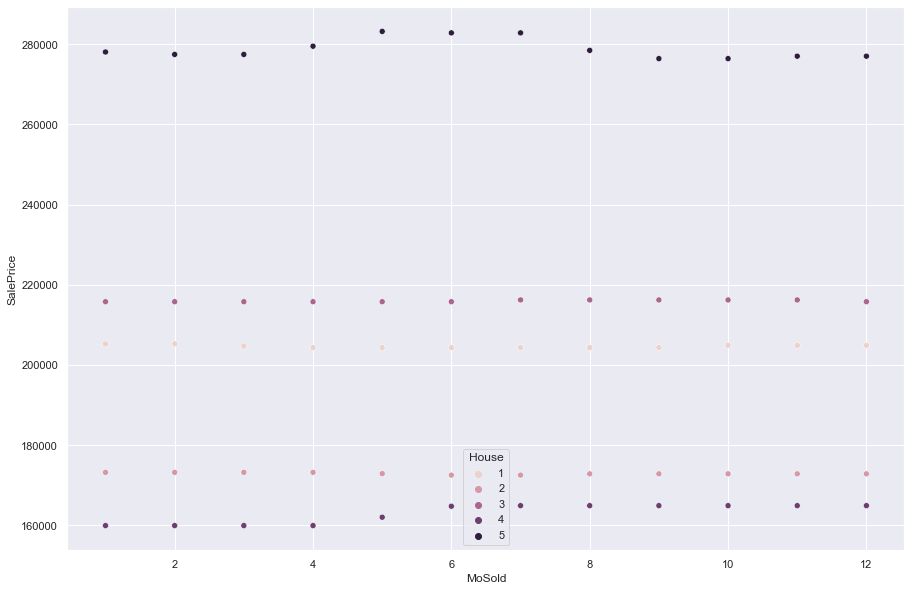

In [72]:
# Plot figure for price of first 5 houses
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_houses, x="MoSold", y ="SalePrice", hue="House")